<a href="https://colab.research.google.com/github/yogesh0027/Climate-Disaster-Analysis-and-Prediction-for-India/blob/main/Disaster_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To get indian Cities

In [ ]:
from google.colab import files
uploaded = files.upload()


In [1]:
import pandas as pd

# Load the uploaded file (use actual filename if it's different)
df = pd.read_csv('worldcities.csv')

# Show header/column names
print("Headers:\n", df.columns)


Headers: Index(['city', 'city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3',
       'admin_name', 'capital', 'population', 'id'],
      dtype='object')


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('worldcities.csv')

# Filter rows where country is India
india_df = df[df['country'] == 'India']

# Select only required columns
indian_cities = india_df[['city', 'lat', 'lng', 'country']]

# Save to a new CSV file
indian_cities.to_csv('indian_major_cities.csv', index=False)

# Optional: Show the first few rows
indian_cities.head()


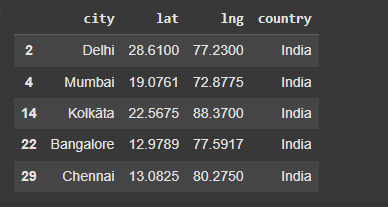

In [2]:
# Load the saved CSV
df_india = pd.read_csv('indian_major_cities.csv')

# Show the headers
print("Headers:\n", df_india.columns)


Headers: Index(['city', 'lat', 'lng', 'country'], dtype='object')


**Till this step we collected extracted only indian cities from the global major cities with their lat and lng  **

In [3]:
import pandas as pd

# Load the CSV
df = pd.read_csv('indian_major_cities.csv')

# Drop the 'country' column
df = df.drop(columns=['country'])

# Save it back (overwrite or save with new name)
df.to_csv('indian_major_cities.csv', index=False)

# Optional: Preview
print(df.head())


        city      lat      lng
0      Delhi  28.6100  77.2300
1     Mumbai  19.0761  72.8775
2    KolkƒÅta  22.5675  88.3700
3  Bangalore  12.9789  77.5917
4    Chennai  13.0825  80.2750


# ** Collecting the 2024 weather data for this major Indian Cites from NASA API**

In [ ]:
import pandas as pd
import aiohttp
import asyncio
import time

# Load city data from CSV
cities_df = pd.read_csv("indian_major_cities.csv")

# List to hold all data rows
weather_data = []

# Set the number of cities to process (5000 for now)
max_cities_to_process = 5000  # Process first 5000 cities

# Async function to fetch weather data
async def fetch_weather_data(session, city, lat, lon):
    print(f"Fetching data for {city}...")

    url = "https://power.larc.nasa.gov/api/temporal/daily/point"
    params = {
        "parameters": "T2M,T2M_MAX,T2M_MIN,WS2M,RH2M,PRECTOTCORR,PS",
        "community": "RE",
        "longitude": lon,
        "latitude": lat,
        "start": "20240101",
        "end": "20241220",
        "format": "JSON"
    }

    async with session.get(url, params=params) as response:
        if response.status == 200:  # Change from status_code to status
            data = await response.json()
            parameters = data['properties']['parameter']

            # Reformat data to rows
            for date in parameters['T2M'].keys():
                weather_data.append({
                    "City": city,
                    "Date": date,
                    "T2M": parameters['T2M'][date],
                    "T2M_MAX": parameters['T2M_MAX'][date],
                    "T2M_MIN": parameters['T2M_MIN'][date],
                    "WS2M": parameters['WS2M'][date],
                    "RH2M": parameters['RH2M'][date],
                    "PRECTOTCORR": parameters['PRECTOTCORR'][date],
                    "PS": parameters['PS'][date]
                })
            print(f"‚úÖ {city} done.")
        else:
            print(f"‚ùå Failed to fetch {city}, status code: {response.status}")

# Function to manage all requests
async def fetch_all_weather_data():
    async with aiohttp.ClientSession() as session:
        tasks = []
        for index, row in cities_df.iterrows():
            if index >= max_cities_to_process:  # Stop after processing 5000 cities
                break

            city = row['city']
            lat = row['lat']
            lon = row['lng']

            # Fetch only the first 5000 cities
            tasks.append(fetch_weather_data(session, city, lat, lon))

        await asyncio.gather(*tasks)

# Start the asynchronous requests
start_time = time.time()
await fetch_all_weather_data()
end_time = time.time()

print(f"Data fetched in {end_time - start_time:.2f} seconds")

# Save the data in chunks after every 1000 rows
def save_chunk(data, chunk_number):
    df = pd.DataFrame(data)
    df.to_csv(f"india_city_weather_data_chunk_{chunk_number}.csv", index=False)
    print(f"Saved chunk {chunk_number}")

# Save in chunks of 1000
def save_data_in_chunks():
    chunk_size = 1000
    chunk_number = 1
    current_chunk = []

    for data_row in weather_data:
        current_chunk.append(data_row)

        if len(current_chunk) >= chunk_size:
            save_chunk(current_chunk, chunk_number)
            chunk_number += 1
            current_chunk = []

    # Save any remaining data after loop
    if current_chunk:
        save_chunk(current_chunk, chunk_number)

save_data_in_chunks()


Streaming output truncated to the last 5000 lines.
‚úÖ Nandurbar done.
‚úÖ Purwa Utar done.
‚úÖ Kovilpatti done.
‚úÖ TitƒÅgarh done.
‚úÖ ShujƒÅlpur done.
‚úÖ JalpƒÅiguri done.
‚úÖ SuriƒÅpet done.
‚úÖ Sehore done.
‚úÖ KaliƒÅnpur done.
‚úÖ MancherƒÅl done.
‚úÖ Muktsar done.
‚úÖ IslƒÅmƒÅbƒÅd done.
‚úÖ BƒÅgalkot done.
‚úÖ MakrƒÅna done.
‚úÖ GangƒÅwati done.
‚úÖ Dam Dam done.
‚úÖ TƒÅdpatri done.
‚úÖ Gharbara done.
‚úÖ Sundarnagar done.
‚úÖ Kurichchi done.
‚úÖ Kheda done.
‚úÖ ShikohƒÅbƒÅd done.
‚úÖ Sheopur done.
‚úÖ Nautanwa done.
‚úÖ Khardah done.
‚úÖ SultƒÅnpur done.
‚úÖ SemƒÅri done.
‚úÖ Hindaun done.
‚úÖ Bhilai Karanja done.
‚úÖ JamƒÅlpur done.
‚úÖ AmarƒÅvati done.
‚úÖ TƒÅdepalleg≈´dem done.
‚úÖ BrƒÅjarƒÅjnagar done.
‚úÖ Negapatam done.
‚úÖ BƒÅnsbƒÅria done.
‚úÖ B≈´ndi done.
‚úÖ Bhadreswar done.
‚úÖ Kishanganj done.
‚úÖ Dhamtari done.
‚úÖ Ballia done.
‚úÖ Rishƒ´kesh done.
‚úÖ Buxar done.
‚úÖ Sƒ´tƒÅmarhi done.
‚úÖ Tezpur done.
‚úÖ KƒÅranja done.
‚úÖ Kalyani done.
‚úÖ Kap≈´rthala done.
‚úÖ AurangƒÅbƒÅd done.
‚úÖ S≈´jƒÅngarh done.
‚úÖ Madhavaram done.
‚úÖ Datia done.
‚úÖ Gangtok done.
‚úÖ Barod done.
‚úÖ Jeypore done.
‚úÖ Kundli done.
‚úÖ RƒÅneswar done.
‚úÖ Port Blair done.
‚úÖ VƒÅsco Da GƒÅma done.
‚úÖ Abbigeri done.
‚úÖ Seoni done.
‚úÖ KhambhƒÅliya done.
‚úÖ Chilakal≈´rupet done.
‚úÖ Amalner done.
‚úÖ Tellicherry done.
‚úÖ ItƒÅrsi done.
‚úÖ Navalyal done.
‚úÖ DhuliƒÅn done.
‚úÖ Luckeesarai done.
‚úÖ KhambhƒÅt done.
‚úÖ Kohƒ´ma done.
‚úÖ Tiruchengodu done.
‚úÖ Kadaiyanall≈´r done.
‚úÖ Chanwari done.
‚úÖ Zerakpur done.
‚úÖ KƒÅrwƒÅr done.
‚úÖ Harihar done.
‚úÖ Kall≈´ru done.
‚úÖ Yalamak≈´ru done.
‚úÖ Tinsukia done.
‚úÖ Bachhraon done.
‚úÖ BodinƒÅyakkan≈´r done.
‚úÖ Deoni Buzurg done.
‚úÖ Kot Kap≈´ra done.
‚úÖ SuramƒÅla done.
‚úÖ SardƒÅrshahr done.
‚úÖ Paramagudi done.
‚úÖ Closepet done.
‚úÖ Emmigan≈´r done.
‚úÖ ChƒÅkdaha done.
‚úÖ Silvassa done.
‚úÖ Allinagaram done.
‚úÖ RƒÅmnagar done.
‚úÖ RƒÅyachoti done.
‚úÖ DhƒÅr done.
‚úÖ Marmagao done.
‚úÖ Bhadohi done.
‚úÖ MƒÅndvi done.
‚úÖ Tandwa done.
‚úÖ Nagƒ´na done.
‚úÖ PedagƒÅdi done.
‚úÖ Akot done.
‚úÖ Lachhmangarh Sƒ´kar done.
‚úÖ Jam≈´ƒ´ done.
‚úÖ Nirmal done.
‚úÖ Madgaon done.
‚úÖ VƒÅniyambƒÅdi done.
‚úÖ Nƒ´mbƒÅhera done.
‚úÖ PollƒÅchi done.
‚úÖ Najƒ´bƒÅbƒÅd done.
‚úÖ Jumri TilaiyƒÅ done.
‚úÖ RƒÅsipuram done.
‚úÖ Kangan done.
‚úÖ JƒÅmtƒÅra done.
‚úÖ Sangr≈´r done.
‚úÖ Tiruttani done.
‚úÖ Contai done.
‚úÖ Sankeshwar done.
‚úÖ Chinnachauku done.
‚úÖ Shahdol done.
‚úÖ KƒÅvali done.
‚úÖ Jangipur done.
‚úÖ KumƒÅrapƒÅlaiyam done.
‚úÖ PonnƒÅni done.
‚úÖ PƒÅloncha done.
‚úÖ SƒÅrni done.
‚úÖ BƒÅsoda done.
‚úÖ Palangotu AdwƒÅr done.
‚úÖ Mhow done.
‚úÖ KairƒÅna done.
‚úÖ Aruppukkottai done.
‚úÖ NachchƒÅndupatti done.
‚úÖ Seoni MƒÅlwa done.
‚úÖ Saundatti done.
‚úÖ NirƒÅla done.
‚úÖ Kadiri done.
‚úÖ HƒÅnsi done.
‚úÖ KarƒÅd done.
‚úÖ Diphu done.
‚úÖ BhawƒÅnipatna done.
‚úÖ RƒÅmagiri Udayagiri done.
‚úÖ Pilkhua done.
‚úÖ Krishnagiri done.
‚úÖ Ootacamund done.
‚úÖ Phusro done.
‚úÖ AnakƒÅpalle done.
‚úÖ Farƒ´dkot done.
‚úÖ Maratturai done.
‚úÖ MettupƒÅlaiyam done.
‚úÖ Arni done.
‚úÖ DhorƒÅji done.
‚úÖ Channapatna done.
‚úÖ GumlƒÅ done.
‚úÖ Tiruppatt≈´r done.
‚úÖ Garulia done.
‚úÖ SamadiƒÅla done.
‚úÖ Dobni Para done.
‚úÖ Simdega done.
‚úÖ Kadi done.
‚úÖ Saunda done.
‚úÖ ArƒÅria done.
‚úÖ Kottag≈´dem done.
‚úÖ Chingleput done.
‚úÖ Kuniyamutt≈´r done.
‚úÖ Ashoknagar done.
‚úÖ Arkonam done.
‚úÖ BalrƒÅmpur done.
‚úÖ LƒÅharpur done.
‚úÖ MƒÅnsa done.
‚úÖ Tƒ´kamgarh done.
‚úÖ Harda KhƒÅs done.
‚úÖ Vƒ´rappanchathiram done.
‚úÖ DahegƒÅm done.
‚úÖ KhamƒÅnon KalƒÅn done.
‚úÖ Peruvancha done.
‚úÖ MannƒÅrgudi done.
‚úÖ Baj Baj done.
‚úÖ TirkƒÅkara done.
‚úÖ Bargarh done.
‚úÖ KƒÅmƒÅreddipet done.
‚úÖ Gokulgarh done.
‚úÖ NipƒÅni done.
‚úÖ KƒÅtoya done.
‚úÖ Sirsilla done.
‚úÖ Bolpur done.
‚úÖ ShƒÅjƒÅpur done.
‚úÖ Yanam done.
‚úÖ Kambam done.
‚úÖ Koch BihƒÅr done.
‚úÖ Surendranagar done.
‚úÖ ManmƒÅd done.
‚úÖ Keshod done.
‚úÖ Pattukkottai done.
‚úÖ Bodhan done.
‚úÖ RƒÅnƒÅghƒÅt done.
‚úÖ ChintƒÅmani done.
‚úÖ FƒÅzilka done.
‚úÖ AmbƒÅjogƒÅi done.
‚úÖ Piro done.
‚úÖ DhrƒÅngadhra done.
‚úÖ Malappuram done.
‚úÖ Tanuku done.
‚úÖ GokƒÅk done.
‚úÖ Gangammapeta done.
‚úÖ Tindivanam done.
‚úÖ Tirumangalam done.
‚úÖ ChaklƒÅsi done.
‚úÖ Kallakkurichchi done.
‚úÖ Garhi done.
‚úÖ BhadarwƒÅh done.
‚úÖ Tarn TƒÅran done.
‚úÖ MandlƒÅ done.
‚úÖ RƒÅyadrug done.
‚úÖ Gobindgarh done.
‚úÖ SangƒÅreddi done.
‚úÖ Tura done.
‚úÖ Nilanga done.
‚úÖ Siruguppa done.
‚úÖ VriddhƒÅchalam done.
‚úÖ Mangalagiri done.
‚úÖ HƒÅveri done.
‚úÖ JaorƒÅ done.
‚úÖ WandiwƒÅsh done.
‚úÖ Virudunagar done.
‚úÖ FatehƒÅbƒÅd done.
‚úÖ Malaut done.
‚úÖ Khejroli done.
‚úÖ Dabra done.
‚úÖ ParappanangƒÅdi done.
‚úÖ G≈´d≈´r done.
‚úÖ Gaura done.
‚úÖ Pardig≈´da done.
‚úÖ Srƒ´villiputt≈´r done.
‚úÖ KƒÅsipƒÅlaiyam done.
‚úÖ BilƒÅra done.
‚úÖ TƒÅnd≈´r done.
‚úÖ Warora done.
‚úÖ Kodungall≈´r done.
‚úÖ Badvel done.
‚úÖ MƒÅrkƒÅpur done.
‚úÖ S≈´ratgarh done.
‚úÖ ParƒÅdƒ´p Garh done.
‚úÖ SankaranayinƒÅr Kovil done.
‚úÖ RƒÅyagada done.
‚úÖ Ratangarh done.
‚úÖ QuilƒÅndi done.
‚úÖ Tripunittura done.
‚úÖ NƒÅnd≈´ra Buzurg done.
‚úÖ DhƒÅrƒÅpuram done.
‚úÖ ModƒÅsa done.
‚úÖ RƒÅjsamand done.
‚úÖ Satyamangalam done.
‚úÖ DhenkƒÅnƒÅl done.
‚úÖ Bijaynagar done.
‚úÖ BasavakalyƒÅn done.
‚úÖ NeyyƒÅttinkara done.
‚úÖ Nowrangapur done.
‚úÖ Varisshiyakuni done.
‚úÖ BƒÅpatla done.
‚úÖ Ilkal done.
‚úÖ PƒÅlghar done.
‚úÖ Mƒ´rpeta done.
‚úÖ PakribarawƒÅn done.
‚úÖ Farƒ´dpur done.
‚úÖ Anjangaon done.
‚úÖ Nihtaur done.
‚úÖ Kalamasseri done.
‚úÖ Bishnupur done.
‚úÖ Dandeli done.
‚úÖ Gauravaram done.
‚úÖ Puliyankudi done.
‚úÖ VƒÅlpƒÅrai done.
‚úÖ Urun-IslƒÅmpur done.
‚úÖ AvaniyƒÅpuram done.
‚úÖ Jagoniguda done.
‚úÖ Jaisalmer done.
‚úÖ Beypore done.
‚úÖ GopƒÅlganj done.
‚úÖ DharmasƒÅgaram done.
‚úÖ Kodoli done.
‚úÖ Siuri done.
‚úÖ Koratla done.
‚úÖ Hasanpur done.
‚úÖ Siddipet done.
‚úÖ Gohna done.
‚úÖ KƒÅyankulam done.
‚úÖ VaijƒÅpur done.
‚úÖ Madhipura done.
‚úÖ GuruvƒÅy≈´r done.
‚úÖ Pulivendla done.
‚úÖ Phalodi done.
‚úÖ SahaswƒÅn done.
‚úÖ Renuk≈´t done.
‚úÖ Sausar done.
‚úÖ Dh≈´ri done.
‚úÖ Sirsi done.
‚úÖ ArƒÅmbƒÅgh done.
‚úÖ Alƒ´pur DuƒÅr done.
‚úÖ NƒÅbha done.
‚úÖ KƒÅnhangƒÅd done.
‚úÖ Chakpi Karong done.
‚úÖ Narapalli done.
‚úÖ Taml≈´k done.
‚úÖ PidugurƒÅlla done.
‚úÖ Dharmapuri done.
‚úÖ Sangamner done.
‚úÖ RƒÅth done.
‚úÖ Kurab≈´r done.
‚úÖ Keitumkawn done.
‚úÖ Sinnar done.
‚úÖ Jagraon done.
‚úÖ IdappƒÅdi done.
‚úÖ Hiriy≈´r done.
‚úÖ TohƒÅna done.
‚úÖ GiddarbƒÅha done.
‚úÖ Bankra done.
‚úÖ Visnagar done.
‚úÖ Sheikhpura done.
‚úÖ WƒÅshƒ´m done.
‚úÖ Athni done.
‚úÖ Arm≈´r done.
‚úÖ KodƒÅd done.
‚úÖ TƒÅdepalle done.
‚úÖ Halvad done.
‚úÖ Nawalgarh done.
‚úÖ Jatani done.
‚úÖ Bhabhua done.
‚úÖ GadwƒÅl done.
‚úÖ Khagaul done.
‚úÖ SundapƒÅlaiyam done.
‚úÖ Chidambaram done.
‚úÖ Chik BallƒÅpur done.
‚úÖ Okha done.
‚úÖ Dhuburi done.
‚úÖ PƒÅm≈´ru done.
‚úÖ NarwƒÅna done.
‚úÖ JhƒÅrgrƒÅm done.
‚úÖ Wanparti done.
‚úÖ RƒÅmanƒÅthapuram done.
‚úÖ Kathua done.
‚úÖ BƒÅri done.
‚úÖ Udamalpet done.
‚úÖ Trikonavattam done.
‚úÖ Sirsi done.
‚úÖ Nanjang≈´d done.
‚úÖ NƒÅnpƒÅra done.
‚úÖ Sherkot done.
‚úÖ Siddhapur done.
‚úÖ Kukarmunda done.
‚úÖ RƒÅzampeta done.
‚úÖ ZahirƒÅbƒÅd done.
‚úÖ VelampƒÅlaiyam done.
‚úÖ Kesamudram done.
‚úÖ PƒÅlitƒÅna done.
‚úÖ RƒÅnipet done.
‚úÖ Nagari done.
‚úÖ RƒÅghogarh done.
‚úÖ NedumangƒÅd done.
‚úÖ Tirukkoyil≈´r done.
‚úÖ Thatri done.
‚úÖ ChandralapƒÅdu done.
‚úÖ Gunupur done.
‚úÖ Khagaria done.
‚úÖ Huns≈´r done.
‚úÖ PƒÅchora done.
‚úÖ Tipt≈´r done.
‚úÖ North Lakhimpur done.
‚úÖ Vinukonda done.
‚úÖ Una done.
‚úÖ Panruti done.
‚úÖ Upleta done.
‚úÖ ChƒÅmrƒÅjnagar done.
‚úÖ Panna done.
‚úÖ Sillod done.
‚úÖ Narasapur done.
‚úÖ BinnƒÅguri done.
‚úÖ PipariƒÅ done.
‚úÖ RƒÅjgarh done.
‚úÖ Gohadi done.
‚úÖ TiruvƒÅl≈´r done.
‚úÖ Dumraon done.
‚úÖ MulbƒÅgal done.
‚úÖ NanjakkƒÅd done.
‚úÖ Wani done.
‚úÖ GopichettipƒÅlaiyam done.
‚úÖ Dhone done.
‚úÖ MehnƒÅjpur done.
‚úÖ HastinƒÅpur done.
‚úÖ PƒÅnskura done.
‚úÖ ItƒÅnagar done.
‚úÖ Unjha done.
‚úÖ Bƒ´mgal done.
‚úÖ PalƒÅsa done.
‚úÖ Sandƒ´la done.
‚úÖ Ponn≈´ru done.
‚úÖ VrindƒÅvan done.
‚úÖ Bail-Hongal done.
‚úÖ MƒÅcherla done.
‚úÖ KollegƒÅl done.
‚úÖ Bilimora done.
‚úÖ Sonabedha done.
‚úÖ KothƒÅpet done.
‚úÖ Sardhana done.
‚úÖ Keonjhargarh done.
‚úÖ LohƒÅrdagƒÅ done.
‚úÖ RƒÅmpur Hat done.
‚úÖ Maduraivayal done.
‚úÖ Bobbili done.
‚úÖ LonƒÅvale done.
‚úÖ Poonamallee done.
‚úÖ Naugaon SƒÅdƒÅt done.
‚úÖ Karƒ´mganj done.
‚úÖ Kanduk≈´r done.
‚úÖ G≈´dalur done.
‚úÖ KhandƒÅla done.
‚úÖ Diglipur done.
‚úÖ SƒÅmalkot done.
‚úÖ Sendhwa done.
‚úÖ Nasƒ´rabƒÅd done.
‚úÖ Sattenapalle done.
‚úÖ Chintalapalli done.
‚úÖ Sƒ´ra done.
‚úÖ Talegaon DƒÅbhƒÅde done.
‚úÖ GangƒÅrƒÅmpur done.
‚úÖ Mandapeta done.
‚úÖ KƒÅlna done.
‚úÖ PithorƒÅgarh done.
‚úÖ PuthiyangƒÅdi done.
‚úÖ Tirur done.
‚úÖ BarwƒÅni done.
‚úÖ MƒÅngrol done.
‚úÖ Lunglei done.
‚úÖ ChƒÅlil done.
‚úÖ Kengri done.
‚úÖ Ropar done.
‚úÖ Belampalli done.
‚úÖ Ajodhya done.
‚úÖ Kharar done.
‚úÖ BiswƒÅn done.
‚úÖ Pungan≈´ru done.
‚úÖ KƒÅndi done.
‚úÖ Tiruvall≈´r done.
‚úÖ Raxaul done.
‚úÖ ViramgƒÅm done.
‚úÖ Harpanahalli done.
‚úÖ Atchampeta done.
‚úÖ Erumaippatti done.
‚úÖ Madhupur done.
‚úÖ Bhƒ´munipatnam done.
‚úÖ Putt≈´r done.
‚úÖ Challakere done.
‚úÖ TƒÅsgaon done.
‚úÖ Chonthrhu done.
‚úÖ Palmaner done.
‚úÖ Umred done.
‚úÖ FƒÅlƒÅkƒÅta done.
‚úÖ Pol≈´r done.
‚úÖ Kannamangalam done.
‚úÖ Khurai done.
‚úÖ PithƒÅpuram done.
‚úÖ GhƒÅtƒÅl done.
‚úÖ SƒÅgar done.
‚úÖ DeolƒÅli done.
‚úÖ Jalor done.
‚úÖ Jaggayyapeta done.
‚úÖ NƒÅmakkal done.
‚úÖ NƒÅndod done.
‚úÖ Bhongƒ´r done.
‚úÖ Periya Sem≈´r done.
‚úÖ KƒÅliyƒÅganj done.
‚úÖ Dholka done.
‚úÖ IslƒÅmpur done.
‚úÖ Ashta done.
‚úÖ MansƒÅla done.
‚úÖ OttappƒÅlam done.
‚úÖ Tilhar done.
‚úÖ M≈´ndka done.
‚úÖ RƒÅhuri done.
‚úÖ SamƒÅna done.
‚úÖ KƒÅsaragod done.
‚úÖ Sidhi done.
‚úÖ AmalƒÅpuram done.
‚úÖ Arsikere done.
‚úÖ Sohna done.
‚úÖ BakhtiyƒÅrpur done.
‚úÖ VaisampƒÅkkal done.
‚úÖ PƒÅrvatipuram done.
‚úÖ Ilindu Kothi done.
‚úÖ Manjeri done.
‚úÖ Putt≈´r done.
‚úÖ ShƒÅhpur done.
‚úÖ Sihor done.
‚úÖ Phaltan done.
‚úÖ GoƒÅlpƒÅra done.
‚úÖ Daudnagar done.
‚úÖ Arwal done.
‚úÖ Jangaon done.
‚úÖ Manglaur done.
‚úÖ Nerkunram done.
‚úÖ Mandi DabwƒÅli done.
‚úÖ Kumarankari done.
‚úÖ Kunnamkulam done.
‚úÖ Khattan done.
‚úÖ Bad≈´ria done.
‚úÖ Mudhol done.
‚úÖ UllƒÅl done.
‚úÖ Lakhminia done.
‚úÖ Sironj done.
‚úÖ Venkatagiri done.
‚úÖ Diu done.
‚úÖ Jiyyammavalasa done.
‚úÖ Todupulai done.
‚úÖ KorƒÅput done.
‚úÖ BƒÅruipur done.
‚úÖ AurangƒÅbƒÅd done.
‚úÖ BhavƒÅni done.
‚úÖ Tiruvalla done.
‚úÖ VikƒÅrƒÅbƒÅd done.
‚úÖ SultƒÅnganj done.
‚úÖ Tirupparangunram done.
‚úÖ IrinjƒÅlakuda done.
‚úÖ MahmudƒÅbƒÅd done.
‚úÖ Bikramganj done.
‚úÖ Repalle done.
‚úÖ ZangƒÅreddig≈´dem done.
‚úÖ MandamƒÅri done.
‚úÖ Hodal done.
‚úÖ Dabhoi done.
‚úÖ Jaspur done.
‚úÖ ƒÄnaiy≈´r done.
‚úÖ PeranƒÅmpattu done.
‚úÖ PuthuppariyƒÅram done.
‚úÖ Bowringpet done.
‚úÖ Forbesganj done.
‚úÖ Patancheruvu done.
‚úÖ Fatwa done.
‚úÖ PardwƒÅl done.
‚úÖ KƒÅlpi done.
‚úÖ BhadrƒÅchalam done.
‚úÖ GƒÅdarwƒÅra done.
‚úÖ Metpalli done.
‚úÖ Kuchaiburi done.
‚úÖ SujƒÅnpur done.
‚úÖ SibsƒÅgar done.
‚úÖ Kosamba done.
‚úÖ T≈´ndla done.
‚úÖ Rongat done.
‚úÖ Burla done.
‚úÖ Shiv done.
‚úÖ Sidlaghatta done.
‚úÖ VyƒÅra done.
‚úÖ Marpalli done.
‚úÖ Laksar done.
‚úÖ Nohar done.
‚úÖ Kizhake ChƒÅlakudi done.
‚úÖ Biaora done.
‚úÖ PeddƒÅpuram done.
‚úÖ Bhattu KolƒÅn done.
‚úÖ Tammampatti done.
‚úÖ BhawƒÅnƒ´pur RƒÅjdhƒÅm done.
‚úÖ Sojat done.
‚úÖ ChatrƒÅ done.
‚úÖ Perambal≈´r done.
‚úÖ SihorƒÅ done.
‚úÖ Bar Bigha done.
‚úÖ Naugachhia done.
‚úÖ ParƒÅsia done.
‚úÖ Kapadvanj done.
‚úÖ Perintalmanna done.
‚úÖ Bhainsa done.
‚úÖ Padrauna done.
‚úÖ Guntakal Junction done.
‚úÖ Gooty done.
‚úÖ Jaggisettig≈´dem done.
‚úÖ BantvƒÅl done.
‚úÖ NizƒÅmpur done.
‚úÖ RƒÅmnagar done.
‚úÖ Koduvalli done.
‚úÖ Chinnaman≈´r done.
‚úÖ BƒÅghpat done.
‚úÖ Payyoli done.
‚úÖ Tennala done.
‚úÖ Kƒ´lvishƒÅram done.
‚úÖ Joshƒ´math done.
‚úÖ Upperu done.
‚úÖ BokƒÅro done.
‚úÖ Hoskote done.
‚úÖ Sulleru done.
‚úÖ PrattipƒÅdu done.
‚úÖ Hilsa done.
‚úÖ Vikramasingapuram done.
‚úÖ KhairƒÅbƒÅd done.
‚úÖ HomnƒÅbƒÅd done.
‚úÖ JiƒÅganj done.
‚úÖ Azhikk≈çd done.
‚úÖ NƒÅngal Township done.
‚úÖ MƒÅjalgaon done.
‚úÖ BƒÅdurpalle done.
‚úÖ Bhatkal done.
‚úÖ D≈´ngarpur done.
‚úÖ PallipƒÅlaiyam done.
‚úÖ Nellikkuppam done.
‚úÖ Godda done.
‚úÖ Aland done.
‚úÖ SadƒÅseopet done.
‚úÖ Jammalamadugu done.
‚úÖ Gumia done.
‚úÖ Vite done.
‚úÖ Atarra done.
‚úÖ Dumka done.
‚úÖ Sikandra Rao done.
‚úÖ Azhikkal done.
‚úÖ ManappƒÅrai done.
‚úÖ Nilamb≈´r done.
‚úÖ Hagaribommanahalli done.
‚úÖ Mƒìla G≈´dal≈´r done.
‚úÖ Jasdan done.
‚úÖ Kampli done.
‚úÖ MangalapƒÅdi done.
‚úÖ Padra done.
‚úÖ Warud done.
‚úÖ Dharmaragar done.
‚úÖ Obra done.
‚úÖ Vuyy≈´ru done.
‚úÖ Garhwa done.
‚úÖ PƒÅkaur done.
‚úÖ ChandrƒÅwƒÅda done.
‚úÖ Nandikotk≈´r done.
‚úÖ Mattan≈´r done.
‚úÖ Selu done.
‚úÖ Jalandhar Cantonment done.
‚úÖ RƒÅnƒÅvƒÅv done.
‚úÖ Umarkhed done.
‚úÖ BhƒÅlki done.
‚úÖ NawƒÅshahr done.
‚úÖ Coonoor done.
‚úÖ ThoubƒÅl done.
‚úÖ BihƒÅt done.
‚úÖ Kumta done.
‚úÖ ChanganƒÅcheri done.
‚úÖ Anandpur done.
‚úÖ RƒÅjgarh done.
‚úÖ Nawai done.
‚úÖ Punal≈´r done.
‚úÖ Gollalagunta done.
‚úÖ Shertallai done.
‚úÖ Chattamangalam done.
‚úÖ Farrukhnagar done.
‚úÖ MahƒÅlingpur done.
‚úÖ ChalungalpƒÅdam done.
‚úÖ Kadinamkulam done.
‚úÖ Ganapathivattam done.
‚úÖ Guledagudda done.
‚úÖ ArantƒÅngi done.
‚úÖ BhƒÅyala done.
‚úÖ ƒÄlam≈´ru done.
‚úÖ Sundargarh done.
‚úÖ Kedgaon done.
‚úÖ DhupgƒÅri done.
‚úÖ MƒÅnvi done.
‚úÖ MuddebihƒÅl done.
‚úÖ Charkhi DƒÅdri done.
‚úÖ Sachƒ´n done.
‚úÖ GobƒÅrdƒÅnga done.
‚úÖ Sainthia done.
‚úÖ Nalegaon done.
‚úÖ Majurwa done.
‚úÖ RƒÅmeswaram done.
‚úÖ NandigƒÅma done.
‚úÖ KarvƒÅrakundu done.
‚úÖ RƒÅp≈´r done.
‚úÖ Mel≈´r done.
‚úÖ Talipparamba done.
‚úÖ Dowlaiswaram done.
‚úÖ RƒÅjaldesar done.
‚úÖ Shekhupur done.
‚úÖ Barnagar done.
‚úÖ Jora done.
‚úÖ Ahmadpur done.
‚úÖ NƒÅyudupet done.
‚úÖ MurshidƒÅbƒÅd done.
‚úÖ Jangamguda done.
‚úÖ Dƒ´g done.
‚úÖ Angul done.
‚úÖ Dalli RƒÅjhara done.
‚úÖ Medak done.
‚úÖ Raisen done.
‚úÖ Ellenabad done.
‚úÖ SiyƒÅna done.
‚úÖ WƒÅnkƒÅner done.
‚úÖ Rudauli done.
‚úÖ BodupƒÅl done.
‚úÖ BarwƒÅh done.
‚úÖ Porsa done.
‚úÖ JƒÅnakammapeta done.
‚úÖ Sihora done.
‚úÖ Jambusar done.
‚úÖ Ananipalle done.
‚úÖ Saoner done.
‚úÖ Bhatpalli done.
‚úÖ SeohƒÅra done.
‚úÖ Chembra done.
‚úÖ KƒÅyalpattanam done.
‚úÖ PratƒÅpgarh done.
‚úÖ Addanki done.
‚úÖ Barauli done.
‚úÖ Kottangara done.
‚úÖ DildƒÅrnagar done.
‚úÖ Sh≈çran≈´r done.
‚úÖ Periyakulam done.
‚úÖ Nidadavole done.
‚úÖ Anekal done.
‚úÖ Nilothi done.
‚úÖ All≈´ru done.
‚úÖ JƒÅjpur done.
‚úÖ Mahb≈´bƒÅbƒÅd done.
‚úÖ MuttayyƒÅpuram done.
‚úÖ K≈çtt≈çppƒÅdam done.
‚úÖ Yeola done.
‚úÖ RƒÅmachandrapuram done.
‚úÖ DhƒÅka done.
‚úÖ KattivƒÅkkam done.
‚úÖ Pirthƒ´pur done.
‚úÖ Kadalur done.
‚úÖ Kharik done.
‚úÖ Barhiya done.
‚úÖ AmbƒÅsamudram done.
‚úÖ Thol done.
‚úÖ SƒÅnand done.
‚úÖ Kodƒ´nar done.
‚úÖ Palladam done.
‚úÖ KƒÅrmegh done.
‚úÖ NƒÅrƒÅyanpet done.
‚úÖ KƒÅlol done.
‚úÖ Indi done.
‚úÖ Barpeta done.
‚úÖ BairƒÅgnia done.
‚úÖ Jambughoda done.
‚úÖ Limbdi done.
‚úÖ KendrƒÅparha done.
‚úÖ LaungowƒÅl done.
‚úÖ KƒÅrsiyƒÅng done.
‚úÖ ThƒÅn done.
‚úÖ SƒÅlƒÅr done.
‚úÖ Akbarpur done.
‚úÖ Anakaputtur done.
‚úÖ NƒÅikankudi done.
‚úÖ NƒÅthdwƒÅra done.
‚úÖ Rajaori done.
‚úÖ HƒÅlol done.
‚úÖ Agar done.
‚úÖ Jayamkondacholapuram done.
‚úÖ Peddapalli done.
‚úÖ S≈´rampatti done.
‚úÖ Saidpur Dabra done.
‚úÖ Sagauli done.
‚úÖ Naini Tal done.
‚úÖ GolƒÅghƒÅt done.
‚úÖ BerubƒÅri done.
‚úÖ TƒÅlcher done.
‚úÖ Shutayil done.
‚úÖ PaliƒÅ KalƒÅn done.
‚úÖ ErramvƒÅripƒÅlem done.
‚úÖ Diamond Harbour done.
‚úÖ Pƒ´leru done.
‚úÖ PƒÅmban done.
‚úÖ KallƒÅr done.
‚úÖ MemƒÅri done.
‚úÖ DhamdƒÅha done.
‚úÖ Cherupulasshƒìri done.
‚úÖ RƒÅmganj Mandi done.
‚úÖ Talukkara done.
‚úÖ Buddh Gaya done.
‚úÖ NalhƒÅti done.
‚úÖ Kad≈´r done.
‚úÖ Trikarp≈´r North done.
‚úÖ RƒÅjgƒ´r done.
‚úÖ QƒÅdiƒÅn done.
‚úÖ SherghƒÅti done.
‚úÖ MƒÅrƒÅkkara done.
‚úÖ PƒÅlampur done.
‚úÖ ChannarƒÅyapatna done.
‚úÖ BilƒÅsipƒÅra done.
‚úÖ Patti done.
‚úÖ JhƒÅbua done.
‚úÖ MurtajƒÅpur done.
‚úÖ JƒÅnjgƒ´r done.
‚úÖ PilƒÅni done.
‚úÖ Vavveru done.
‚úÖ KrishnarƒÅjƒÅsƒÅgara done.
‚úÖ Peringalam done.
‚úÖ Vellakkovil done.
‚úÖ Mundakkal done.
‚úÖ Kunigal done.
‚úÖ Erattukulakkada done.
‚úÖ PhulwƒÅria done.
‚úÖ Merta done.
‚úÖ BƒÅsudebpur done.
‚úÖ Nowgong done.
‚úÖ Junnar done.
‚úÖ KƒÅlimpong done.
‚úÖ Mailapur done.
‚úÖ Sabalgarh done.
‚úÖ Jogbani done.
‚úÖ Kƒ´lakkarai done.
‚úÖ Panaji done.
‚úÖ Varkkallai done.
‚úÖ Kovv≈´r done.
‚úÖ Atmak≈´r done.
‚úÖ KakrƒÅla done.
‚úÖ AmudƒÅlavalasa done.
‚úÖ UttarkƒÅshi done.
‚úÖ PartƒÅpnagar done.
‚úÖ VƒÅdƒÅsinor done.
‚úÖ MayyanƒÅd done.
‚úÖ Solan done.
‚úÖ Tiruchend≈´r done.
‚úÖ Begamganj done.
‚úÖ Maihar done.
‚úÖ RƒÅjgarh done.
‚úÖ Pachr≈´kha done.
‚úÖ Pehowa done.
‚úÖ SamƒÅlkha done.
‚úÖ Sardulgarh done.
‚úÖ Seram done.
‚úÖ WƒÅdegaon done.
‚úÖ BƒÅdepalli done.
‚úÖ WƒÅlƒÅjƒÅpet done.
‚úÖ Revelganj done.
‚úÖ Mehidpur done.
‚úÖ Sijua done.
‚úÖ VetapƒÅlem done.
‚úÖ Tinnan≈´r done.
‚úÖ Sindgi done.
‚úÖ KhƒÅchrod done.
‚úÖ RƒÅjula done.
‚úÖ IdangansƒÅlai done.
‚úÖ Salaiya done.
‚úÖ Penum≈´r done.
‚úÖ LƒÅlganj done.
‚úÖ Chittaranjan done.
‚úÖ NawƒÅbganj done.
‚úÖ Birmitrapur done.
‚úÖ Melmadai done.
‚úÖ Chikodi done.
‚úÖ IslƒÅmpur done.
‚úÖ HailƒÅkƒÅndi done.
‚úÖ RƒÅmdurg done.
‚úÖ Vengat done.
‚úÖ MahƒÅdeopur done.
‚úÖ AyirƒÅpuram done.
‚úÖ CheyyƒÅr done.
‚úÖ Nall≈´r done.
‚úÖ Dhanera done.
‚úÖ Amla done.
‚úÖ BuchireddipƒÅlem done.
‚úÖ TuvƒÅgudi done.
‚úÖ Betamcherla done.
‚úÖ Parav≈´rkambolam done.
‚úÖ DwƒÅrka done.
‚úÖ Huz≈´rƒÅbƒÅd done.
‚úÖ Gurais done.
‚úÖ N≈´rpur done.
‚úÖ Shankarpur KhawƒÅs done.
‚úÖ PathanƒÅmthitta done.
‚úÖ Pallipram done.
‚úÖ Pen done.
‚úÖ Srƒ´nagar done.
‚úÖ Mamun done.
‚úÖ Porur done.
‚úÖ Thakraha done.
‚úÖ RƒÅni done.
‚úÖ Sand≈´r done.
‚úÖ Khairtal done.
‚úÖ Gomoh done.
‚úÖ Charaut done.
‚úÖ Goribidn≈´r done.
‚úÖ Karuvambram done.
‚úÖ JƒÅle done.
‚úÖ RƒÅwatbhƒÅta done.
‚úÖ TƒÅki done.
‚úÖ Coondapoor done.
‚úÖ SatƒÅnƒÅ done.
‚úÖ Aklera done.
‚úÖ DubrƒÅjpur done.
‚ùå Failed to fetch Giddal≈´r, status code: 429
‚ùå Failed to fetch PƒÅppinisshƒìri, status code: 429
‚ùå Failed to fetch TƒÅzhakara, status code: 429
‚ùå Failed to fetch Pandaul, status code: 429
‚ùå Failed to fetch Bibhutpur, status code: 429
‚ùå Failed to fetch RƒÅwatsƒÅr, status code: 429
‚ùå Failed to fetch Pulppatta, status code: 429
‚ùå Failed to fetch Yellandu, status code: 429
‚ùå Failed to fetch MƒÅranchƒìri, status code: 429
‚ùå Failed to fetch Wokha, status code: 429
‚ùå Failed to fetch BƒÅpaura, status code: 429
‚ùå Failed to fetch Chipl≈´n, status code: 429
‚ùå Failed to fetch Harra, status code: 429
‚úÖ Jaito done.
‚ùå Failed to fetch Mel NƒÅriyappan≈´r, status code: 429
‚ùå Failed to fetch Dulhanganj, status code: 429
‚ùå Failed to fetch Karumattampatti, status code: 429
‚ùå Failed to fetch Lingsug≈´r, status code: 429
‚ùå Failed to fetch Shƒ´yƒÅli, status code: 429
‚ùå Failed to fetch Madukkarai, status code: 429
‚ùå Failed to fetch Alandatte, status code: 429
‚ùå Failed to fetch Vadigenhalli, status code: 429
‚ùå Failed to fetch Hƒ´rƒÅkud, status code: 429
‚ùå Failed to fetch Munnark≈çd, status code: 429
‚ùå Failed to fetch MannƒÅrakkƒÅt, status code: 429
‚ùå Failed to fetch ƒÄllagadda, status code: 429
‚ùå Failed to fetch Khajamahalpur, status code: 429
‚úÖ PhulbƒÅni done.
‚ùå Failed to fetch Safidon, status code: 429
‚ùå Failed to fetch Kolattupuzha, status code: 429
‚ùå Failed to fetch DhƒÅmnod, status code: 429
‚ùå Failed to fetch MƒÅnƒÅmadurai, status code: 429
‚úÖ Hatta done.
‚ùå Failed to fetch Maruthar≈çd, status code: 429
‚ùå Failed to fetch Banda, status code: 429
‚ùå Failed to fetch Paithan, status code: 429
‚ùå Failed to fetch DƒÅpoli, status code: 429
‚ùå Failed to fetch Kulittalai, status code: 429
‚ùå Failed to fetch Ankola, status code: 429
‚ùå Failed to fetch MadakalavƒÅripalli, status code: 429
‚ùå Failed to fetch Zaidpur, status code: 429
‚ùå Failed to fetch Kita ChauhƒÅttar, status code: 429
‚ùå Failed to fetch DegƒÅna, status code: 429
‚ùå Failed to fetch Kalar≈´ch, status code: 429
‚ùå Failed to fetch Aiyappan K≈çvil, status code: 429
‚ùå Failed to fetch VedƒÅranniyam, status code: 429
‚ùå Failed to fetch Baraidih, status code: 429
‚ùå Failed to fetch Badiadka, status code: 429
‚ùå Failed to fetch Tiruv≈´r, status code: 429
‚ùå Failed to fetch Kokrajhar, status code: 429
‚ùå Failed to fetch Risod, status code: 429
‚ùå Failed to fetch Almora, status code: 429
‚ùå Failed to fetch BalarƒÅmpur, status code: 429
‚ùå Failed to fetch TitlƒÅgarh, status code: 429
‚ùå Failed to fetch WƒÅris Alƒ´ganj, status code: 429
‚ùå Failed to fetch JƒÅmkhed, status code: 429
‚ùå Failed to fetch R≈´darpur, status code: 429
‚ùå Failed to fetch Kallidaikurichi, status code: 429
‚ùå Failed to fetch Annigeri, status code: 429
‚ùå Failed to fetch Pulgaon, status code: 429
‚ùå Failed to fetch Mulav≈´r, status code: 429
‚ùå Failed to fetch Toda Bhƒ´m, status code: 429
‚ùå Failed to fetch ByƒÅdgi, status code: 429
‚ùå Failed to fetch Kadungapuram, status code: 429
‚úÖ Manali done.
‚ùå Failed to fetch Bangaon, status code: 429
‚ùå Failed to fetch Narsƒ´patnam, status code: 429
‚ùå Failed to fetch Kaippakanchƒìri, status code: 429
‚ùå Failed to fetch VemalwƒÅda, status code: 429
‚ùå Failed to fetch ChƒÅvakkƒÅd, status code: 429
‚ùå Failed to fetch Kasba, status code: 429
‚ùå Failed to fetch Manganam, status code: 429
‚ùå Failed to fetch Chempalli, status code: 429
‚ùå Failed to fetch Dhekiajuli, status code: 429
‚ùå Failed to fetch Mangalam, status code: 429
‚ùå Failed to fetch Vettam, status code: 429
‚úÖ Pilibangan done.
‚ùå Failed to fetch Madhubani, status code: 429
‚ùå Failed to fetch Darsi, status code: 429
‚ùå Failed to fetch AngamƒÅli, status code: 429
‚ùå Failed to fetch Sirƒ´pur, status code: 429
‚úÖ Basavana BƒÅgevƒÅdi done.
‚ùå Failed to fetch Madikeri, status code: 429
‚ùå Failed to fetch BƒÅmaur, status code: 429
‚ùå Failed to fetch Kondapalle, status code: 429
‚ùå Failed to fetch HisuƒÅ, status code: 429
‚ùå Failed to fetch Churi, status code: 429
‚ùå Failed to fetch Kidamangalam, status code: 429
‚ùå Failed to fetch ZamƒÅnia, status code: 429
‚ùå Failed to fetch KavundappƒÅdi, status code: 429
‚ùå Failed to fetch ShamsƒÅbƒÅd, status code: 429
‚ùå Failed to fetch KartƒÅrpur, status code: 429
‚ùå Failed to fetch ShikƒÅrp≈´r, status code: 429
‚ùå Failed to fetch Borne, status code: 429
‚ùå Failed to fetch Umaria, status code: 429
‚ùå Failed to fetch TekkebhƒÅgam, status code: 429
‚ùå Failed to fetch Chanderi, status code: 429
‚ùå Failed to fetch Kareli, status code: 429
‚ùå Failed to fetch HƒÅngal, status code: 429
‚ùå Failed to fetch TurkauliyƒÅ, status code: 429
‚ùå Failed to fetch Elesvaram, status code: 429
‚ùå Failed to fetch Fatehpur Sƒ´kri, status code: 429
‚ùå Failed to fetch PatrƒÅtu, status code: 429
‚ùå Failed to fetch SƒÅnchor, status code: 429
‚úÖ Ratia done.
‚ùå Failed to fetch Lohagaon, status code: 429
‚ùå Failed to fetch ƒÄrumuganeri, status code: 429
‚ùå Failed to fetch Umarkot, status code: 429
‚ùå Failed to fetch Parambil, status code: 429
‚ùå Failed to fetch Udaipur, status code: 429
‚ùå Failed to fetch Chand Chaur, status code: 429
‚ùå Failed to fetch Mankada, status code: 429
‚ùå Failed to fetch Kall≈´r, status code: 429
‚ùå Failed to fetch DebagrƒÅm, status code: 429
‚ùå Failed to fetch Vadavalli, status code: 429
‚ùå Failed to fetch Vilakkudi, status code: 429
‚ùå Failed to fetch NƒÅnjikkottai, status code: 429
‚ùå Failed to fetch Jamikunta, status code: 429
‚ùå Failed to fetch TƒÅrƒÅnagar, status code: 429
‚ùå Failed to fetch Belhi, status code: 429
‚ùå Failed to fetch ShamsƒÅbƒÅd, status code: 429
‚ùå Failed to fetch Erraguntla, status code: 429
‚ùå Failed to fetch Chƒìmanchƒìri, status code: 429
‚ùå Failed to fetch MƒÅnwat, status code: 429
‚ùå Failed to fetch Ketti, status code: 429
‚ùå Failed to fetch Turaiy≈´r, status code: 429
‚ùå Failed to fetch Chemmaruthi, status code: 429
‚ùå Failed to fetch Chamtha, status code: 429
‚ùå Failed to fetch Pattanapuram, status code: 429
‚ùå Failed to fetch Narsinghgarh, status code: 429
‚ùå Failed to fetch SƒÅsthƒÅnkotta, status code: 429
‚ùå Failed to fetch Kalyandrug, status code: 429
‚ùå Failed to fetch Tattamangalam, status code: 429
‚ùå Failed to fetch ErƒÅmala, status code: 429
‚ùå Failed to fetch Utraula, status code: 429
‚ùå Failed to fetch KƒÅngayam, status code: 429
‚ùå Failed to fetch Kukshi, status code: 429
‚ùå Failed to fetch Mang≈´r, status code: 429
‚ùå Failed to fetch RƒÅdhanpur, status code: 429
‚ùå Failed to fetch Kov≈´r, status code: 429
‚ùå Failed to fetch Munnar, status code: 429
‚ùå Failed to fetch Akivƒ´du, status code: 429
‚ùå Failed to fetch Makhdumpur, status code: 429
‚ùå Failed to fetch PurƒÅini, status code: 429
‚ùå Failed to fetch Tholikuzhi, status code: 429
‚ùå Failed to fetch Palamel, status code: 429
‚ùå Failed to fetch Puratt≈´r, status code: 429
‚ùå Failed to fetch AlengƒÅd, status code: 429
‚ùå Failed to fetch Maur KalƒÅn, status code: 429
‚ùå Failed to fetch Sherpur, status code: 429
‚ùå Failed to fetch JhanjhƒÅrpur, status code: 429
‚ùå Failed to fetch Alamnagar, status code: 429
‚ùå Failed to fetch Bagasra, status code: 429
‚ùå Failed to fetch Kottaikuppam, status code: 429
‚ùå Failed to fetch Velliy≈çd, status code: 429
‚ùå Failed to fetch Singia, status code: 429
‚ùå Failed to fetch Tekkƒìkara Kizhakku, status code: 429
‚ùå Failed to fetch SadƒÅbƒÅd, status code: 429
‚ùå Failed to fetch Kochugaon, status code: 429
‚ùå Failed to fetch TuljƒÅpur, status code: 429
‚ùå Failed to fetch LƒÅlgola, status code: 429
‚ùå Failed to fetch Masur, status code: 429
‚ùå Failed to fetch Nautan Dube, status code: 429
‚ùå Failed to fetch Thazhamel, status code: 429
‚ùå Failed to fetch RƒÅhatgarh, status code: 429
‚ùå Failed to fetch ShikƒÅrpur, status code: 429
‚ùå Failed to fetch Kurivikod, status code: 429
‚ùå Failed to fetch CharthƒÅwal, status code: 429
‚ùå Failed to fetch Samdhin, status code: 429
‚ùå Failed to fetch NauƒÅgarhi, status code: 429
‚ùå Failed to fetch Deori KhƒÅs, status code: 429
‚ùå Failed to fetch KunnatnƒÅd, status code: 429
‚ùå Failed to fetch Kolachel, status code: 429
‚ùå Failed to fetch Sanha, status code: 429
‚ùå Failed to fetch VellanƒÅd, status code: 429
‚ùå Failed to fetch Sri MƒÅdhopur, status code: 429
‚ùå Failed to fetch Lumding, status code: 429
‚ùå Failed to fetch Sherpur Khurd, status code: 429
‚ùå Failed to fetch Vadakakarai, status code: 429
‚ùå Failed to fetch NƒÅspur, status code: 429
‚ùå Failed to fetch Unchagao, status code: 429
‚ùå Failed to fetch Rusera, status code: 429
‚ùå Failed to fetch Bramhapuri, status code: 429
‚ùå Failed to fetch Podili, status code: 429
‚ùå Failed to fetch Shrƒ´gonda, status code: 429
‚ùå Failed to fetch Kalliyasshƒìri, status code: 429
‚ùå Failed to fetch Malaikkal, status code: 429
‚ùå Failed to fetch TummapƒÅla, status code: 429
‚ùå Failed to fetch MushƒÅbani, status code: 429
‚ùå Failed to fetch Karera, status code: 429
‚ùå Failed to fetch Malakanagiri, status code: 429
‚ùå Failed to fetch Tarakeswar, status code: 429
‚ùå Failed to fetch BƒÅdƒÅmi, status code: 429
‚ùå Failed to fetch HusainƒÅbƒÅd, status code: 429
‚ùå Failed to fetch Bairi Chak, status code: 429
‚ùå Failed to fetch Leh, status code: 429
‚ùå Failed to fetch PattanakkƒÅd, status code: 429
‚ùå Failed to fetch Sholinghur, status code: 429
‚ùå Failed to fetch Dharampur, status code: 429
‚ùå Failed to fetch MƒÅnƒÅvadar, status code: 429
‚ùå Failed to fetch Palaiya ƒÄyakkudi, status code: 429
‚ùå Failed to fetch ChinnƒÅlapatti, status code: 429
‚ùå Failed to fetch Pattittara, status code: 429
‚ùå Failed to fetch MahemdƒÅvƒÅd, status code: 429
‚ùå Failed to fetch Gadarpur, status code: 429
‚ùå Failed to fetch Ulliyeri, status code: 429
‚ùå Failed to fetch Tekkali, status code: 429
‚ùå Failed to fetch Pedana, status code: 429
‚ùå Failed to fetch Mattath≈´r, status code: 429
‚ùå Failed to fetch Pandua, status code: 429
‚ùå Failed to fetch BƒÅbura, status code: 429
‚ùå Failed to fetch Bann≈´r, status code: 429
‚ùå Failed to fetch Chengam, status code: 429
‚ùå Failed to fetch Devarshola, status code: 429
‚ùå Failed to fetch TalakkƒÅd, status code: 429
‚ùå Failed to fetch Sankaramangalam, status code: 429
‚ùå Failed to fetch NƒÅgƒÅwaram, status code: 429
‚ùå Failed to fetch Gariadhar, status code: 429
‚ùå Failed to fetch MainƒÅguri, status code: 429
‚ùå Failed to fetch Karuvakulam, status code: 429
‚ùå Failed to fetch Uran, status code: 429
‚ùå Failed to fetch Karjan, status code: 429
‚ùå Failed to fetch M≈´vattupula, status code: 429
‚ùå Failed to fetch ManƒÅwar, status code: 429
‚ùå Failed to fetch K≈´ttƒÅnall≈´r, status code: 429
‚ùå Failed to fetch DhƒÅri, status code: 429
‚ùå Failed to fetch MƒÅnsa, status code: 429
‚ùå Failed to fetch Rehli, status code: 429
‚úÖ Gajendragarh done.
‚ùå Failed to fetch ShƒÅhpura, status code: 429
‚ùå Failed to fetch Sallimedu, status code: 429
‚ùå Failed to fetch Koni, status code: 429
‚ùå Failed to fetch ChimƒÅkurti, status code: 429
‚ùå Failed to fetch TƒÅramangalam, status code: 429
‚ùå Failed to fetch Kaipram, status code: 429
‚úÖ Vett≈´r done.
‚ùå Failed to fetch Anjad, status code: 429
‚ùå Failed to fetch PeriyanƒÅyakkanpƒÅlaiyam, status code: 429
‚ùå Failed to fetch Egra, status code: 429
‚ùå Failed to fetch Kanniparamba, status code: 429
‚ùå Failed to fetch Mussoorie, status code: 429
‚ùå Failed to fetch Saktƒ´, status code: 429
‚ùå Failed to fetch Rahƒ´mpur, status code: 429
‚ùå Failed to fetch El≈´r, status code: 429
‚ùå Failed to fetch Kondarangi Kƒ´ran≈´r, status code: 429
‚ùå Failed to fetch Nethirimangalam, status code: 429
‚ùå Failed to fetch Mahugaon, status code: 429
‚ùå Failed to fetch MƒÅrgrƒÅm, status code: 429
‚ùå Failed to fetch JamƒÅlpur, status code: 429
‚ùå Failed to fetch ƒÄrda, status code: 429
‚ùå Failed to fetch MundƒÅhal Khurd, status code: 429
‚ùå Failed to fetch Hasanparti, status code: 429
‚ùå Failed to fetch RƒÅnpur, status code: 429
‚ùå Failed to fetch PƒÅtri, status code: 429
‚ùå Failed to fetch SalƒÅya, status code: 429
‚ùå Failed to fetch Edasshƒìri, status code: 429
‚ùå Failed to fetch Mundi, status code: 429
‚ùå Failed to fetch Padappakara, status code: 429
‚ùå Failed to fetch SƒÅgwƒÅra, status code: 429
‚ùå Failed to fetch Tirwa, status code: 429
‚ùå Failed to fetch KaluvƒÅya, status code: 429
‚ùå Failed to fetch Masabdisa, status code: 429
‚ùå Failed to fetch MƒÅgadi, status code: 429
‚ùå Failed to fetch BƒÅghmƒÅri, status code: 429
‚ùå Failed to fetch Sarpavaram, status code: 429
‚ùå Failed to fetch Dhandhuka, status code: 429
‚ùå Failed to fetch SaundhonwƒÅli, status code: 429
‚ùå Failed to fetch Koratgi, status code: 429
‚ùå Failed to fetch PƒÅrakadavu, status code: 429
‚ùå Failed to fetch NavƒÅpur, status code: 429
‚ùå Failed to fetch Riga, status code: 429
‚ùå Failed to fetch Kott≈´ru, status code: 429
‚ùå Failed to fetch Bir≈´r, status code: 429
‚ùå Failed to fetch Marhaura, status code: 429
‚ùå Failed to fetch Triprang≈çtt≈´r, status code: 429
‚ùå Failed to fetch Ozh≈´r, status code: 429
‚ùå Failed to fetch PƒÅnakkudi, status code: 429
‚ùå Failed to fetch Kodayatt≈´r, status code: 429
‚ùå Failed to fetch KrishnarƒÅjpet, status code: 429
‚ùå Failed to fetch Tiruvƒìgapra, status code: 429
‚ùå Failed to fetch TalwƒÅra, status code: 429
‚ùå Failed to fetch Madavur, status code: 429
‚ùå Failed to fetch Puthupalli, status code: 429
‚ùå Failed to fetch Devarkonda, status code: 429
‚ùå Failed to fetch Nattam, status code: 429
‚ùå Failed to fetch Sursand, status code: 429
‚ùå Failed to fetch Hosdurga, status code: 429
‚ùå Failed to fetch NepƒÅnagar, status code: 429
‚ùå Failed to fetch Idar, status code: 429
‚ùå Failed to fetch JƒÅmai, status code: 429
‚ùå Failed to fetch MannƒÅrgudi, status code: 429
‚ùå Failed to fetch Veliyang≈çd, status code: 429
‚ùå Failed to fetch Kalpatta, status code: 429
‚ùå Failed to fetch Kollengode, status code: 429
‚ùå Failed to fetch RƒÅr≈çtt, status code: 429
‚ùå Failed to fetch LƒÅkheri, status code: 429
‚ùå Failed to fetch ChiknƒÅyakanhalli, status code: 429
‚ùå Failed to fetch Maranga, status code: 429
‚ùå Failed to fetch Behror, status code: 429
‚ùå Failed to fetch Mƒ´nƒÅd, status code: 429
‚ùå Failed to fetch Sankaridrug, status code: 429
‚ùå Failed to fetch PirakkƒÅd, status code: 429
‚ùå Failed to fetch IbrƒÅhƒ´mpatnam, status code: 429
‚ùå Failed to fetch M≈´dbidri, status code: 429
‚ùå Failed to fetch ƒÄtmak≈´r, status code: 429
‚ùå Failed to fetch Vadakku Valliy≈´r, status code: 429
‚ùå Failed to fetch Pilachikare, status code: 429
‚ùå Failed to fetch Marar, status code: 429
‚ùå Failed to fetch Pattikonda, status code: 429
‚ùå Failed to fetch Nalakadoddi, status code: 429
‚ùå Failed to fetch Aralam, status code: 429
‚ùå Failed to fetch Khunti, status code: 429
‚ùå Failed to fetch RasrƒÅ, status code: 429
‚ùå Failed to fetch GaraimƒÅri, status code: 429
‚ùå Failed to fetch Udaipur, status code: 429
‚úÖ ChunƒÅr done.
‚ùå Failed to fetch Maddagiri, status code: 429
‚ùå Failed to fetch BeldƒÅnga, status code: 429
‚ùå Failed to fetch RƒÅghopur, status code: 429
‚ùå Failed to fetch Pallijkarani, status code: 429
‚ùå Failed to fetch Mahendragarh, status code: 429
‚ùå Failed to fetch Nakrekal, status code: 429
‚ùå Failed to fetch SƒÅnkrƒÅil, status code: 429
‚ùå Failed to fetch Colgong, status code: 429
‚ùå Failed to fetch SonƒÅmukhi, status code: 429
‚ùå Failed to fetch KƒÅlappatti, status code: 429
‚ùå Failed to fetch Deodrug, status code: 429
‚ùå Failed to fetch UttamapƒÅlaiyam, status code: 429
‚ùå Failed to fetch Vandiy≈´r, status code: 429
‚ùå Failed to fetch Vallikunnam, status code: 429
‚ùå Failed to fetch Ponmana, status code: 429
‚ùå Failed to fetch G≈´dal≈´r, status code: 429
‚ùå Failed to fetch Plachƒìri, status code: 429
‚ùå Failed to fetch KailƒÅras, status code: 429
‚ùå Failed to fetch Kuttuparamba, status code: 429
‚ùå Failed to fetch Ariyal≈´r, status code: 429
‚ùå Failed to fetch LƒÅdwa, status code: 429
‚ùå Failed to fetch NƒÅhan, status code: 429
‚ùå Failed to fetch Karippira, status code: 429
‚ùå Failed to fetch K≈´dligi, status code: 429
‚ùå Failed to fetch Gidri, status code: 429
‚ùå Failed to fetch PokhrƒÅm, status code: 429
‚ùå Failed to fetch Vƒ´rapƒÅndi, status code: 429
‚ùå Failed to fetch Tiruvambadi, status code: 429
‚ùå Failed to fetch NarsimlƒÅpet, status code: 429
‚ùå Failed to fetch KamalƒÅpuram, status code: 429
‚ùå Failed to fetch Ponmala, status code: 429
‚ùå Failed to fetch Landhaura, status code: 429
‚ùå Failed to fetch Umrat, status code: 429
‚ùå Failed to fetch KozhinjampƒÅra, status code: 429
‚ùå Failed to fetch Nongstoin, status code: 429
‚ùå Failed to fetch Murlƒ´ganj, status code: 429
‚ùå Failed to fetch RƒÅikot, status code: 429
‚ùå Failed to fetch Nauhata, status code: 429
‚ùå Failed to fetch PattƒÅmbi, status code: 429
‚ùå Failed to fetch PawƒÅyan, status code: 429
‚ùå Failed to fetch Neduvann≈´r, status code: 429
‚ùå Failed to fetch Edayikunnam, status code: 429
‚ùå Failed to fetch Akkattettar, status code: 429
‚ùå Failed to fetch SottaiyampƒÅlaiyam, status code: 429
‚ùå Failed to fetch Simri BakhriƒÅrpur, status code: 429
‚úÖ Mulavana done.
‚ùå Failed to fetch Manampizha, status code: 429
‚ùå Failed to fetch BƒÅgha PurƒÅna, status code: 429
‚ùå Failed to fetch Rajpur, status code: 429
‚ùå Failed to fetch Munnalam, status code: 429
‚ùå Failed to fetch Losal, status code: 429
‚ùå Failed to fetch Vattalkundu, status code: 429
‚ùå Failed to fetch PƒÅrdi, status code: 429
‚ùå Failed to fetch PƒÅvugada, status code: 429
‚ùå Failed to fetch Nenmem, status code: 429
‚ùå Failed to fetch Har≈´r, status code: 429
‚ùå Failed to fetch Elanjivaliseri, status code: 429
‚ùå Failed to fetch BƒÅnswƒÅda, status code: 429
‚úÖ Kanigiri done.
‚ùå Failed to fetch RƒÅmanayyapeta, status code: 429
‚ùå Failed to fetch MahƒÅrƒÅjpur, status code: 429
‚ùå Failed to fetch Mannanch≈çri, status code: 429
‚ùå Failed to fetch Puvali, status code: 429
‚ùå Failed to fetch Kizhakk≈çtt, status code: 429
‚ùå Failed to fetch BrƒÅhmana Periya AgrahƒÅram, status code: 429
‚úÖ Attingal done.
‚ùå Failed to fetch Puttankulam, status code: 429
‚ùå Failed to fetch SƒÅho, status code: 429
‚ùå Failed to fetch Srungavarapukota, status code: 429
‚ùå Failed to fetch KaranjiƒÅ, status code: 429
‚ùå Failed to fetch HƒÅjipur, status code: 429
‚úÖ Pujali done.
‚ùå Failed to fetch Antur, status code: 429
‚ùå Failed to fetch SirsƒÅganj, status code: 429
‚ùå Failed to fetch ShƒÅhpura, status code: 429
‚ùå Failed to fetch Chennamangalam, status code: 429
‚ùå Failed to fetch Bhambia Bhai, status code: 429
‚ùå Failed to fetch SƒÅngola, status code: 429
‚ùå Failed to fetch Sheohar, status code: 429
‚ùå Failed to fetch Kotagiri, status code: 429
‚ùå Failed to fetch Kuli, status code: 429
‚ùå Failed to fetch KalwƒÅkurti, status code: 429
‚ùå Failed to fetch Devanhalli, status code: 429
‚ùå Failed to fetch Gingee, status code: 429
‚ùå Failed to fetch SƒÅila, status code: 429
‚ùå Failed to fetch KƒÅrƒÅkurisshi, status code: 429
‚ùå Failed to fetch Kushtagi, status code: 429
‚ùå Failed to fetch KanavƒÅikuli, status code: 429
‚ùå Failed to fetch ƒÄron, status code: 429
‚ùå Failed to fetch Dhabauli, status code: 429
‚ùå Failed to fetch Goriar, status code: 429
‚ùå Failed to fetch VilƒÅngudi, status code: 429
‚ùå Failed to fetch Malmal, status code: 429
‚ùå Failed to fetch UmargƒÅm, status code: 429
‚ùå Failed to fetch BƒÅrughutu, status code: 429
‚ùå Failed to fetch Nibria, status code: 429
‚ùå Failed to fetch WƒÅsi, status code: 429
‚ùå Failed to fetch MƒÅtt≈´l, status code: 429
‚ùå Failed to fetch Vadnagar, status code: 429
‚ùå Failed to fetch CharkhƒÅri, status code: 429
‚ùå Failed to fetch Paivalike, status code: 429
‚ùå Failed to fetch KhƒÅtegaon, status code: 429
‚ùå Failed to fetch Tudiyal≈´r, status code: 429
‚ùå Failed to fetch Poruvakara, status code: 429
‚ùå Failed to fetch TarƒÅna, status code: 429
‚ùå Failed to fetch Amarpur, status code: 429
‚ùå Failed to fetch Tangut≈´ru, status code: 429
‚ùå Failed to fetch Mukher, status code: 429
‚ùå Failed to fetch Pachor, status code: 429
‚ùå Failed to fetch PƒÅdiyanall≈´r, status code: 429
‚ùå Failed to fetch Parsa, status code: 429
‚ùå Failed to fetch Kantai, status code: 429
‚ùå Failed to fetch Rardhu, status code: 429
‚ùå Failed to fetch RƒÅyamangalam, status code: 429
‚ùå Failed to fetch Patjirwa, status code: 429
‚ùå Failed to fetch NƒÅsriganj, status code: 429
‚ùå Failed to fetch S≈´l≈´ru, status code: 429
‚ùå Failed to fetch Bandipura, status code: 429
‚ùå Failed to fetch Edappalli, status code: 429
‚ùå Failed to fetch Vandikarai, status code: 429
‚ùå Failed to fetch NalbƒÅri, status code: 429
‚ùå Failed to fetch SƒÅdri, status code: 429
‚ùå Failed to fetch Ayyagarpet, status code: 429
‚ùå Failed to fetch Penukonda, status code: 429
‚ùå Failed to fetch Balussheri, status code: 429
‚ùå Failed to fetch Varandarapilli, status code: 429
‚ùå Failed to fetch Bihpur, status code: 429
‚ùå Failed to fetch Pallippurattusƒìri, status code: 429
‚ùå Failed to fetch BhƒÅnder, status code: 429
‚ùå Failed to fetch Nokha, status code: 429
‚ùå Failed to fetch HaliyƒÅl, status code: 429
‚ùå Failed to fetch DebiƒÅpur, status code: 429
‚ùå Failed to fetch Digboi, status code: 429
‚ùå Failed to fetch Parimp≈´di, status code: 429
‚ùå Failed to fetch Afzalpur, status code: 429
‚ùå Failed to fetch Irimbiliyam, status code: 429
‚ùå Failed to fetch Kuzhittura, status code: 429
‚ùå Failed to fetch RƒÅver, status code: 429
‚ùå Failed to fetch MƒÅdhura, status code: 429
‚ùå Failed to fetch ƒÄmangal, status code: 429
‚ùå Failed to fetch Basi, status code: 429
‚ùå Failed to fetch Malebenn≈´r, status code: 429
‚ùå Failed to fetch Kadappuram, status code: 429
‚ùå Failed to fetch PƒÅyakarƒÅopeta, status code: 429
‚ùå Failed to fetch Nainijor, status code: 429
‚ùå Failed to fetch BƒÅgepalli, status code: 429
‚ùå Failed to fetch Nelliyalam, status code: 429
‚ùå Failed to fetch Margherita, status code: 429
‚ùå Failed to fetch Maner, status code: 429
‚ùå Failed to fetch PƒÅmidi, status code: 429
‚ùå Failed to fetch PƒÅppƒÅkurichchi, status code: 429
‚ùå Failed to fetch KadambanƒÅd, status code: 429
‚ùå Failed to fetch Kulasekharapuram, status code: 429
‚ùå Failed to fetch KararƒÅn, status code: 429
‚ùå Failed to fetch Madattukkulam, status code: 429
‚ùå Failed to fetch P≈´nch, status code: 429
‚ùå Failed to fetch KƒÅlikƒÅvu, status code: 429
‚ùå Failed to fetch GursarƒÅi, status code: 429
‚ùå Failed to fetch ArerƒÅj, status code: 429
‚ùå Failed to fetch VƒÅdippatti, status code: 429
‚ùå Failed to fetch BankƒÅpur, status code: 429
‚ùå Failed to fetch Magilampupuram, status code: 429
‚ùå Failed to fetch T≈´v≈´r, status code: 429
‚ùå Failed to fetch Shencottah, status code: 429
‚ùå Failed to fetch Srƒ´nivƒÅspur, status code: 429
‚ùå Failed to fetch ThƒÅtha, status code: 429
‚ùå Failed to fetch Trikkunnapuzha, status code: 429
‚ùå Failed to fetch Konn≈´r, status code: 429
‚ùå Failed to fetch Gadhada, status code: 429
‚ùå Failed to fetch Soron, status code: 429
‚ùå Failed to fetch Alatt≈´r, status code: 429
‚ùå Failed to fetch MeppƒÅyy≈´r, status code: 429
‚ùå Failed to fetch MƒÅmidƒÅlapƒÅdu, status code: 429
‚ùå Failed to fetch Bhuban, status code: 429
‚ùå Failed to fetch Wellington, status code: 429
‚ùå Failed to fetch Nediyanad, status code: 429
‚ùå Failed to fetch Nannamukku, status code: 429
‚ùå Failed to fetch TalƒÅja, status code: 429
‚ùå Failed to fetch KuppƒÅdi, status code: 429
‚ùå Failed to fetch Ezhipram, status code: 429
‚ùå Failed to fetch Dalsingh Sarai, status code: 429
‚ùå Failed to fetch ChettipƒÅlaiyam, status code: 429
‚ùå Failed to fetch RƒÅjgarh, status code: 429
‚ùå Failed to fetch GhatƒÅro Chaturbhuj, status code: 429
‚ùå Failed to fetch Lauri, status code: 429
‚ùå Failed to fetch ManihƒÅri, status code: 429
‚ùå Failed to fetch ShƒÅhganj, status code: 429
‚ùå Failed to fetch ManƒÅsa, status code: 429
‚ùå Failed to fetch Das≈´ya, status code: 429
‚ùå Failed to fetch NyƒÅmti, status code: 429
‚ùå Failed to fetch Deogarh, status code: 429
‚ùå Failed to fetch Perumbalam, status code: 429
‚ùå Failed to fetch KantƒÅbƒÅnji, status code: 429
‚ùå Failed to fetch Maski, status code: 429
‚ùå Failed to fetch PƒÅnchla, status code: 429
‚ùå Failed to fetch MƒÅvelikara, status code: 429
‚ùå Failed to fetch KarumƒÅndi ChellipƒÅlaiyam, status code: 429
‚ùå Failed to fetch Mauganj, status code: 429
‚ùå Failed to fetch Mandi, status code: 429
‚ùå Failed to fetch BeohƒÅri, status code: 429
‚ùå Failed to fetch TƒÅmarakulam, status code: 429
‚ùå Failed to fetch NƒÅdbai, status code: 429
‚ùå Failed to fetch Dƒ´nƒÅnagar, status code: 429
‚ùå Failed to fetch Vƒ´rakeralam, status code: 429
‚ùå Failed to fetch Rangia, status code: 429
‚ùå Failed to fetch Gundlupƒìt, status code: 429
‚ùå Failed to fetch Reoti, status code: 429
‚ùå Failed to fetch ElakƒÅdu, status code: 429
‚ùå Failed to fetch Cheranall≈´r, status code: 429
‚ùå Failed to fetch UbaidullƒÅhganj, status code: 429
‚ùå Failed to fetch KoelwƒÅr, status code: 429
‚ùå Failed to fetch Narasannapeta, status code: 429
‚ùå Failed to fetch RasiƒÅri, status code: 429
‚ùå Failed to fetch PanchƒÅnandapur, status code: 429
‚ùå Failed to fetch Mirganj, status code: 429
‚úÖ L≈´nƒÅvƒÅda done.
‚ùå Failed to fetch Mel Bhuvanagiri, status code: 429
‚ùå Failed to fetch Tekkalakote, status code: 429
‚ùå Failed to fetch TƒÅlƒ´kota, status code: 429
‚ùå Failed to fetch K≈´dlu, status code: 429
‚ùå Failed to fetch SogrƒÅha, status code: 429
‚ùå Failed to fetch Vadakkanandal, status code: 429
‚ùå Failed to fetch Kottakota, status code: 429
‚ùå Failed to fetch Buddayyakota, status code: 429
‚ùå Failed to fetch GuruzƒÅla, status code: 429
‚ùå Failed to fetch Jirwa, status code: 429
‚ùå Failed to fetch MankƒÅchar, status code: 429
‚ùå Failed to fetch Dum Duma, status code: 429
‚ùå Failed to fetch BudhlƒÅda, status code: 429
‚ùå Failed to fetch Silao, status code: 429
‚ùå Failed to fetch SuƒÅr, status code: 429
‚ùå Failed to fetch BƒÅruni, status code: 429
‚ùå Failed to fetch BijbiƒÅra, status code: 429
‚ùå Failed to fetch G≈´d≈´ru, status code: 429
‚ùå Failed to fetch Rƒ´ngas, status code: 429
‚ùå Failed to fetch Phulera, status code: 429
‚ùå Failed to fetch Elangunnapuzha, status code: 429
‚ùå Failed to fetch TerdƒÅl, status code: 429
‚ùå Failed to fetch Vadakku Viravanallur, status code: 429
‚ùå Failed to fetch Renigunta, status code: 429
‚ùå Failed to fetch SƒÅndi, status code: 429
‚ùå Failed to fetch Gahmar, status code: 429
‚ùå Failed to fetch Dharmapuram, status code: 429
‚ùå Failed to fetch Mangaldai, status code: 429
‚ùå Failed to fetch AhmadƒÅbƒÅd, status code: 429
‚ùå Failed to fetch RƒÅmpur, status code: 429
‚ùå Failed to fetch Chintalap≈´di, status code: 429
‚ùå Failed to fetch Masrakh, status code: 429
‚úÖ Malavalli done.
‚ùå Failed to fetch KrishnƒÅpuram, status code: 429
‚ùå Failed to fetch Jaynagar-Majilpur, status code: 429
‚ùå Failed to fetch Mannachchanell≈´r, status code: 429
‚ùå Failed to fetch Jodhpur, status code: 429
‚ùå Failed to fetch GilarchƒÅt, status code: 429
‚ùå Failed to fetch Dhrol, status code: 429
‚ùå Failed to fetch Chevella, status code: 429
‚ùå Failed to fetch Perunkalattu, status code: 429
‚ùå Failed to fetch Jharka, status code: 429
‚ùå Failed to fetch Kotal, status code: 429
‚ùå Failed to fetch Vesala, status code: 429
‚ùå Failed to fetch Polasara, status code: 429
‚ùå Failed to fetch KƒÅrkala, status code: 429
‚ùå Failed to fetch Vayakkalattu, status code: 429
‚ùå Failed to fetch RƒÅman, status code: 429
‚ùå Failed to fetch Mungaoli, status code: 429
‚ùå Failed to fetch Kadamalaikkundu, status code: 429
‚ùå Failed to fetch Koba, status code: 429
‚ùå Failed to fetch Seondha, status code: 429
‚ùå Failed to fetch LƒÅdkhed, status code: 429
‚ùå Failed to fetch Bishunpur Sundar, status code: 429
‚ùå Failed to fetch Cherukolattur, status code: 429
‚ùå Failed to fetch Karavaram, status code: 429
‚ùå Failed to fetch Chhota Udepur, status code: 429
‚ùå Failed to fetch Safƒ´pur, status code: 429
‚ùå Failed to fetch NƒÅgod, status code: 429
‚ùå Failed to fetch Chinna Salem, status code: 429
‚ùå Failed to fetch NetƒÅpur TƒÅnda, status code: 429
‚ùå Failed to fetch VorkƒÅdi, status code: 429
‚ùå Failed to fetch Nanminda, status code: 429
‚ùå Failed to fetch KƒÅko, status code: 429
‚ùå Failed to fetch Tarkeshwar, status code: 429
‚úÖ Dargot done.
‚ùå Failed to fetch Nagar, status code: 429
‚ùå Failed to fetch Sirumugai, status code: 429
‚ùå Failed to fetch Chainpura, status code: 429
‚ùå Failed to fetch VijƒÅpur, status code: 429
‚ùå Failed to fetch RaghunƒÅthpur, status code: 429
‚ùå Failed to fetch Niramaruth≈´r, status code: 429
‚ùå Failed to fetch NettappƒÅkkam, status code: 429
‚ùå Failed to fetch Poranki, status code: 429
‚ùå Failed to fetch Mannadipattu, status code: 429
‚ùå Failed to fetch Pauri, status code: 429
‚ùå Failed to fetch Chengann≈´r, status code: 429
‚ùå Failed to fetch BathnƒÅha, status code: 429
‚ùå Failed to fetch Kƒ´ran≈´r, status code: 429
‚ùå Failed to fetch NonƒÅhi, status code: 429
‚ùå Failed to fetch KarunƒÅgapalli, status code: 429
‚ùå Failed to fetch Tiruppatt≈´r, status code: 429
‚ùå Failed to fetch Timurni, status code: 429
‚ùå Failed to fetch MerkƒÅnam, status code: 429
‚ùå Failed to fetch BƒÅbra, status code: 429
‚ùå Failed to fetch WƒÅdi, status code: 429
‚ùå Failed to fetch Jevargi, status code: 429
‚ùå Failed to fetch IlaiyƒÅnkudi, status code: 429
‚ùå Failed to fetch Uttaramer≈´r, status code: 429
‚ùå Failed to fetch Saranga, status code: 429
‚ùå Failed to fetch Mudgal, status code: 429
‚ùå Failed to fetch PƒÅonta SƒÅhib, status code: 429
‚ùå Failed to fetch Kola, status code: 429
‚ùå Failed to fetch LƒÅtehƒÅr, status code: 429
‚ùå Failed to fetch Banhatti, status code: 429
‚ùå Failed to fetch TirorƒÅ, status code: 429
‚ùå Failed to fetch VƒÅsudevanall≈´r, status code: 429
‚ùå Failed to fetch GulƒÅm, status code: 429
‚ùå Failed to fetch Gokarn, status code: 429
‚ùå Failed to fetch PanƒÅgar, status code: 429
‚ùå Failed to fetch Sohwal, status code: 429
‚ùå Failed to fetch Pallappatti, status code: 429
‚ùå Failed to fetch SƒÅhibpur KamƒÅl, status code: 429
‚ùå Failed to fetch NƒÅmrup, status code: 429
‚ùå Failed to fetch Saiha, status code: 429
‚ùå Failed to fetch RajƒÅkheri, status code: 429
‚ùå Failed to fetch RƒÅnia, status code: 429
‚ùå Failed to fetch Kadav≈´r, status code: 429
‚ùå Failed to fetch Sahjanwa, status code: 429
‚ùå Failed to fetch JƒÅfarƒÅbƒÅd, status code: 429
‚ùå Failed to fetch Shrƒ´rangapattana, status code: 429
‚ùå Failed to fetch Nabƒ´nagar, status code: 429
‚ùå Failed to fetch Barwa SƒÅgar, status code: 429
‚ùå Failed to fetch SohƒÅgpur, status code: 429
‚ùå Failed to fetch Barki Ballia, status code: 429
‚ùå Failed to fetch Trikodi, status code: 429
‚ùå Failed to fetch Naubatpur, status code: 429
‚ùå Failed to fetch Hukeri, status code: 429
‚ùå Failed to fetch Pathiyanikunnu, status code: 429
‚ùå Failed to fetch Attili, status code: 429
‚ùå Failed to fetch Ayir≈´rpƒÅra, status code: 429
‚ùå Failed to fetch Khed Brahma, status code: 429
‚ùå Failed to fetch PƒÅrner, status code: 429
‚ùå Failed to fetch LƒÅlru, status code: 429
‚ùå Failed to fetch SinghƒÅna, status code: 429
‚ùå Failed to fetch MƒÅdha, status code: 429
‚ùå Failed to fetch Sojƒ´tra, status code: 429
‚ùå Failed to fetch ChƒÅnasma, status code: 429
‚ùå Failed to fetch Kalamner, status code: 429
‚ùå Failed to fetch Khiria JhƒÅnsi, status code: 429
‚ùå Failed to fetch LƒÅdol, status code: 429
‚ùå Failed to fetch Kali, status code: 429
‚ùå Failed to fetch VodurivƒÅndlag≈´dem, status code: 429
‚ùå Failed to fetch Data, status code: 429
‚ùå Failed to fetch MalanvƒÅdi, status code: 429
‚ùå Failed to fetch Sidhaulƒ´, status code: 429
‚ùå Failed to fetch Simaria, status code: 429
‚ùå Failed to fetch Tapa, status code: 429
‚ùå Failed to fetch Paduvari, status code: 429
‚ùå Failed to fetch Gajwel, status code: 429
‚ùå Failed to fetch KasrƒÅwad, status code: 429
‚ùå Failed to fetch Mundargi, status code: 429
‚ùå Failed to fetch Nainpur, status code: 429
‚ùå Failed to fetch Baind≈´r, status code: 429
‚ùå Failed to fetch Dugda, status code: 429
‚ùå Failed to fetch Karukurti, status code: 429
‚ùå Failed to fetch KƒÅlƒÅvad, status code: 429
‚ùå Failed to fetch Edavanakad, status code: 429
‚ùå Failed to fetch RangƒÅpƒÅra, status code: 429
‚ùå Failed to fetch Cherukara, status code: 429
‚ùå Failed to fetch RƒÅghopur, status code: 429
‚ùå Failed to fetch Mad≈´ru, status code: 429
‚ùå Failed to fetch Valambur, status code: 429
‚ùå Failed to fetch Ghoti Budrukh, status code: 429
‚ùå Failed to fetch Sirmatpur, status code: 429
‚ùå Failed to fetch Banga, status code: 429
‚ùå Failed to fetch Turuttikkara, status code: 429
‚ùå Failed to fetch BƒÅsopatti, status code: 429
‚ùå Failed to fetch Kuttampuzha, status code: 429
‚ùå Failed to fetch Shivganj, status code: 429
‚ùå Failed to fetch Podat≈´rpeta, status code: 429
‚ùå Failed to fetch KhalƒÅri, status code: 429
‚ùå Failed to fetch PatnƒÅgarh, status code: 429
‚ùå Failed to fetch PƒÅnapur, status code: 429
‚ùå Failed to fetch Mairwa, status code: 429
‚ùå Failed to fetch Narasingapuram, status code: 429
‚ùå Failed to fetch Chandili, status code: 429
‚ùå Failed to fetch PƒÅlakodu, status code: 429
‚ùå Failed to fetch PƒÅsighƒÅt, status code: 429
‚ùå Failed to fetch Navalgund, status code: 429
‚ùå Failed to fetch Simria, status code: 429
‚ùå Failed to fetch Naduvannur, status code: 429
‚ùå Failed to fetch Shamgarh, status code: 429
‚ùå Failed to fetch PƒÅta Kalidindi, status code: 429
‚ùå Failed to fetch RƒÅmdiri, status code: 429
‚ùå Failed to fetch Gorantla, status code: 429
‚ùå Failed to fetch Kottapeta, status code: 429
‚ùå Failed to fetch Irug≈´r, status code: 429
‚ùå Failed to fetch CheruvƒÅranam, status code: 429
‚ùå Failed to fetch Sirkhandi Bhitha, status code: 429
‚ùå Failed to fetch Andhra ThƒÅrhi, status code: 429
‚ùå Failed to fetch Dungra Chhota, status code: 429
‚ùå Failed to fetch Aklvidu, status code: 429
‚ùå Failed to fetch Nij Khari, status code: 429
‚ùå Failed to fetch Tirumuruganp≈´ndi, status code: 429
‚ùå Failed to fetch Parambatt Kavu, status code: 429
‚ùå Failed to fetch KhajurƒÅho, status code: 429
‚ùå Failed to fetch DhƒÅmnagar, status code: 429
‚ùå Failed to fetch Tulsƒ´pur, status code: 429
‚ùå Failed to fetch Sahaspur, status code: 429
‚ùå Failed to fetch PurwƒÅ, status code: 429
‚ùå Failed to fetch SahƒÅwar, status code: 429
‚ùå Failed to fetch B≈´ndu, status code: 429
‚ùå Failed to fetch VinnamƒÅla, status code: 429
‚ùå Failed to fetch Channagiri, status code: 429
‚ùå Failed to fetch BalarƒÅmpur, status code: 429
‚ùå Failed to fetch AshwarƒÅopeta, status code: 429
‚ùå Failed to fetch Tirutturaipp≈´ndi, status code: 429
‚ùå Failed to fetch Panmana, status code: 429
‚ùå Failed to fetch Garhara, status code: 429
‚ùå Failed to fetch Asan, status code: 429
‚ùå Failed to fetch NagarpƒÅra, status code: 429
‚ùå Failed to fetch Paruth≈´r, status code: 429
‚ùå Failed to fetch SingarƒÅyakonda, status code: 429
‚ùå Failed to fetch Saidpur, status code: 429
‚ùå Failed to fetch Pallapatti, status code: 429
‚ùå Failed to fetch Iringal, status code: 429
‚ùå Failed to fetch BijƒÅwar, status code: 429
‚ùå Failed to fetch Vel≈´r, status code: 429
‚ùå Failed to fetch KoloriƒÅng, status code: 429
‚ùå Failed to fetch Baheri, status code: 429
‚ùå Failed to fetch MahƒÅrƒÅjgani, status code: 429
‚ùå Failed to fetch Ayanavelikulangara Tekku, status code: 429
‚ùå Failed to fetch Mau, status code: 429
‚ùå Failed to fetch Umga, status code: 429
‚ùå Failed to fetch MayƒÅng ImphƒÅl, status code: 429
‚ùå Failed to fetch VƒìttakkƒÅranpud≈´r, status code: 429
‚ùå Failed to fetch NƒÅravƒÅrikuppam, status code: 429
‚ùå Failed to fetch Ponneri, status code: 429
‚ùå Failed to fetch Halikner, status code: 429
‚ùå Failed to fetch Nazareth, status code: 429
‚ùå Failed to fetch Maksi, status code: 429
‚ùå Failed to fetch Mogalturru, status code: 429
‚ùå Failed to fetch UkkƒÅyapalle, status code: 429
‚ùå Failed to fetch Kosigi, status code: 429
‚ùå Failed to fetch Loha, status code: 429
‚ùå Failed to fetch Sundararaopeta, status code: 429
‚ùå Failed to fetch TiruvattƒÅr, status code: 429
‚ùå Failed to fetch Alwaye, status code: 429
‚ùå Failed to fetch SangrƒÅmpur, status code: 429
‚ùå Failed to fetch Jaisinghpur, status code: 429
‚ùå Failed to fetch ArttuvƒÅttala, status code: 429
‚ùå Failed to fetch Siswa, status code: 429
‚ùå Failed to fetch S≈´leswaranpatti, status code: 429
‚ùå Failed to fetch YƒÅdiki, status code: 429
‚ùå Failed to fetch Tehri, status code: 429
‚ùå Failed to fetch Maheshwar, status code: 429
‚ùå Failed to fetch Sikandarpur, status code: 429
‚ùå Failed to fetch PennƒÅdam, status code: 429
‚ùå Failed to fetch ShƒÅhpur, status code: 429
‚ùå Failed to fetch Puyappalli, status code: 429
‚úÖ P≈´rna done.
‚ùå Failed to fetch Sendamangalam, status code: 429
‚ùå Failed to fetch MƒÅtƒÅbhƒÅnga, status code: 429
‚ùå Failed to fetch Usia, status code: 429
‚ùå Failed to fetch Mulgund, status code: 429
‚ùå Failed to fetch Peringuzha, status code: 429
‚ùå Failed to fetch Neduvatt≈´r, status code: 429
‚ùå Failed to fetch Karian, status code: 429
‚ùå Failed to fetch Koilkuntla, status code: 429
‚ùå Failed to fetch Herohalli, status code: 429
‚ùå Failed to fetch PindwƒÅra, status code: 429
‚ùå Failed to fetch Mulakum≈´d, status code: 429
‚ùå Failed to fetch Kuju, status code: 429
‚ùå Failed to fetch Ann≈´r, status code: 429
‚ùå Failed to fetch Hungund, status code: 429
‚ùå Failed to fetch Kumar Khad, status code: 429
‚ùå Failed to fetch Sulya, status code: 429
‚ùå Failed to fetch Bithar, status code: 429
‚ùå Failed to fetch DƒÅkor, status code: 429
‚ùå Failed to fetch Vallabh Vidyanagar, status code: 429
‚ùå Failed to fetch Tirumala, status code: 429
‚ùå Failed to fetch Elukone, status code: 429
‚ùå Failed to fetch Verukulambu, status code: 429
‚ùå Failed to fetch LƒÅlgudi, status code: 429
‚ùå Failed to fetch Avanigadda, status code: 429
‚ùå Failed to fetch Bƒ´rpur, status code: 429
‚ùå Failed to fetch Mummidivaram, status code: 429
‚ùå Failed to fetch Puduva, status code: 429
‚ùå Failed to fetch Karaval≈´r, status code: 429
‚ùå Failed to fetch Sƒ´lappƒÅdi, status code: 429
‚ùå Failed to fetch An≈´pshahr, status code: 429
‚ùå Failed to fetch Tirukkalikkunram, status code: 429
‚ùå Failed to fetch Sanaur, status code: 429
‚ùå Failed to fetch ƒÄlangulam, status code: 429
‚ùå Failed to fetch YellƒÅpur, status code: 429
‚ùå Failed to fetch Rajpur, status code: 429
‚ùå Failed to fetch Chandrakona, status code: 429
‚úÖ SƒÅrangpur done.
‚ùå Failed to fetch Kulgam, status code: 429
‚ùå Failed to fetch Mannamturuttu, status code: 429
‚ùå Failed to fetch ShamsƒÅbƒÅd, status code: 429
‚ùå Failed to fetch Kott≈´ru, status code: 429
‚ùå Failed to fetch Toda Rai Singh, status code: 429
‚ùå Failed to fetch Perungudi, status code: 429
‚ùå Failed to fetch Pƒìrav≈´r, status code: 429
‚ùå Failed to fetch Dhing, status code: 429
‚ùå Failed to fetch Gollap≈´di, status code: 429
‚ùå Failed to fetch Belsand, status code: 429
‚ùå Failed to fetch HonƒÅvar, status code: 429
‚ùå Failed to fetch NƒÅyanakulam, status code: 429
‚ùå Failed to fetch Arukutti, status code: 429
‚ùå Failed to fetch Koili Simra, status code: 429
‚ùå Failed to fetch Chanaur, status code: 429
‚ùå Failed to fetch Gauripur, status code: 429
‚ùå Failed to fetch KhƒÅrupatia, status code: 429
‚ùå Failed to fetch Madangir, status code: 429
‚ùå Failed to fetch Payipira, status code: 429
‚ùå Failed to fetch RƒÅmpura, status code: 429
‚ùå Failed to fetch BadnƒÅwar, status code: 429
‚ùå Failed to fetch Srvanampatti, status code: 429
‚ùå Failed to fetch Burhar, status code: 429
‚ùå Failed to fetch Vanimƒìl, status code: 429
‚ùå Failed to fetch Ponda, status code: 429
‚ùå Failed to fetch KailƒÅshahar, status code: 429
‚ùå Failed to fetch Dighwa, status code: 429
‚ùå Failed to fetch Sakleshpur, status code: 429
‚ùå Failed to fetch SƒÅndwa, status code: 429
‚ùå Failed to fetch Madappalli, status code: 429
‚ùå Failed to fetch Piravanth≈´r, status code: 429
‚ùå Failed to fetch Minja, status code: 429
‚ùå Failed to fetch MandƒÅwa, status code: 429
‚ùå Failed to fetch Tazhava, status code: 429
‚ùå Failed to fetch Ron, status code: 429
‚ùå Failed to fetch Kedav≈´r, status code: 429
‚ùå Failed to fetch M≈´lampilli, status code: 429
‚ùå Failed to fetch Vaikam, status code: 429
‚ùå Failed to fetch K≈´n PuhƒÅl, status code: 429
‚ùå Failed to fetch SamrƒÅla, status code: 429
‚ùå Failed to fetch PƒÅtakƒÅkƒÅni, status code: 429
‚ùå Failed to fetch Kedia, status code: 429
‚ùå Failed to fetch Manamb≈´r, status code: 429
‚ùå Failed to fetch Tranquebar, status code: 429
‚úÖ Tuensang done.
‚ùå Failed to fetch Kazhukambalam, status code: 429
‚ùå Failed to fetch Ponmundam, status code: 429
‚ùå Failed to fetch Kannamangalam Tekku, status code: 429
‚ùå Failed to fetch Lalganj, status code: 429
‚ùå Failed to fetch Ravulapalem, status code: 429
‚ùå Failed to fetch SinghƒÅra Buzurg, status code: 429
‚ùå Failed to fetch Mahthi, status code: 429
‚ùå Failed to fetch Sonepur, status code: 429
‚ùå Failed to fetch KhirkiyƒÅn, status code: 429
‚ùå Failed to fetch Engandiy≈´r, status code: 429
‚ùå Failed to fetch Devikolam, status code: 429
‚ùå Failed to fetch SonƒÅri, status code: 429
‚ùå Failed to fetch Vuliyattara, status code: 429
‚ùå Failed to fetch VilƒÅchcheri, status code: 429
‚ùå Failed to fetch Pallikondai, status code: 429
‚ùå Failed to fetch AsafƒÅbƒÅd, status code: 429
‚ùå Failed to fetch Velugodu, status code: 429
‚ùå Failed to fetch Koiri Bigha, status code: 429
‚ùå Failed to fetch Anjarkandi, status code: 429
‚ùå Failed to fetch KulattuppƒÅlaiyam, status code: 429
‚ùå Failed to fetch KhairƒÅ TolƒÅ, status code: 429
‚ùå Failed to fetch Dindori, status code: 429
‚ùå Failed to fetch VandiperiyƒÅr, status code: 429
‚ùå Failed to fetch Latauna, status code: 429
‚ùå Failed to fetch Vellal≈´r, status code: 429
‚ùå Failed to fetch Muttupet, status code: 429
‚ùå Failed to fetch Abu, status code: 429
‚ùå Failed to fetch MahƒÅdebnagar, status code: 429
‚ùå Failed to fetch BhirƒÅha, status code: 429
‚ùå Failed to fetch Vadakarai Kƒ´l PidƒÅgai, status code: 429
‚ùå Failed to fetch NayƒÅgaon, status code: 429
‚ùå Failed to fetch Chitarpur, status code: 429
‚ùå Failed to fetch Ahwa, status code: 429
‚ùå Failed to fetch Pawni, status code: 429
‚ùå Failed to fetch Zunheboto, status code: 429
‚ùå Failed to fetch CheriƒÅl, status code: 429
‚ùå Failed to fetch PulimƒÅthu, status code: 429
‚ùå Failed to fetch Achhnera, status code: 429
‚ùå Failed to fetch Gormi, status code: 429
‚ùå Failed to fetch PariyƒÅpuram, status code: 429
‚ùå Failed to fetch KavallemmƒÅvu, status code: 429
‚ùå Failed to fetch KodarmƒÅ, status code: 429
‚ùå Failed to fetch Kaler, status code: 429
‚ùå Failed to fetch Kanchika, status code: 429
‚ùå Failed to fetch VernƒÅg, status code: 429
‚ùå Failed to fetch Vayan≈´r, status code: 429
‚ùå Failed to fetch NasrullƒÅhganj, status code: 429
‚ùå Failed to fetch Curchorem, status code: 429
‚ùå Failed to fetch Chunakara Vadakku, status code: 429
‚ùå Failed to fetch Madira, status code: 429
‚ùå Failed to fetch Kittanapalli, status code: 429
‚ùå Failed to fetch Ker≈´r, status code: 429
‚ùå Failed to fetch TekƒÅri, status code: 429
‚ùå Failed to fetch MurƒÅdpur, status code: 429
‚ùå Failed to fetch Nak≈´r, status code: 429
‚úÖ Bindki done.
‚ùå Failed to fetch DalƒÅn, status code: 429
‚ùå Failed to fetch Dip, status code: 429
‚ùå Failed to fetch MoirƒÅng, status code: 429
‚ùå Failed to fetch Patharia, status code: 429
‚ùå Failed to fetch Mallasamudram, status code: 429
‚ùå Failed to fetch BagulƒÅ, status code: 429
‚ùå Failed to fetch Pullappalli, status code: 429
‚ùå Failed to fetch Chincholi, status code: 429
‚ùå Failed to fetch Manimala, status code: 429
‚úÖ KƒÅnkuria done.
‚ùå Failed to fetch TimmƒÅpur, status code: 429
‚ùå Failed to fetch Hirpardangal, status code: 429
‚ùå Failed to fetch Manki, status code: 429
‚ùå Failed to fetch CholavandƒÅn, status code: 429
‚ùå Failed to fetch Talayolaparambu, status code: 429
‚ùå Failed to fetch RƒÅman Mandi, status code: 429
‚ùå Failed to fetch Vengatt≈´r, status code: 429
‚ùå Failed to fetch Pokhuria, status code: 429
‚ùå Failed to fetch Jogipet, status code: 429
‚ùå Failed to fetch Katangi, status code: 429
‚ùå Failed to fetch Chavasshƒìri, status code: 429
‚ùå Failed to fetch Chatayamangalam, status code: 429
‚ùå Failed to fetch Hulikal, status code: 429
‚ùå Failed to fetch KondƒÅzhi, status code: 429
‚ùå Failed to fetch Pullanpallikonam, status code: 429
‚ùå Failed to fetch Aymangala, status code: 429
‚ùå Failed to fetch Bobleshwar, status code: 429
‚ùå Failed to fetch Bermo, status code: 429
‚ùå Failed to fetch Sarea KhƒÅs, status code: 429
‚ùå Failed to fetch JunnƒÅrdev, status code: 429
‚ùå Failed to fetch Perundurai, status code: 429
‚ùå Failed to fetch BhadƒÅs, status code: 429
‚ùå Failed to fetch SƒÅmbhar, status code: 429
‚ùå Failed to fetch GurmatkƒÅl, status code: 429
‚ùå Failed to fetch BhawƒÅnƒ´garh, status code: 429
‚ùå Failed to fetch TaulahƒÅ, status code: 429
‚ùå Failed to fetch Panniyann≈´r, status code: 429
‚ùå Failed to fetch Nagla, status code: 429
‚ùå Failed to fetch PrƒÅntij, status code: 429
‚ùå Failed to fetch Bhatpurƒ´, status code: 429
‚ùå Failed to fetch AnkireddikuntapƒÅlem, status code: 429
‚ùå Failed to fetch Tiruttangal, status code: 429
‚ùå Failed to fetch Singampunari, status code: 429
‚ùå Failed to fetch AlangƒÅyam, status code: 429
‚ùå Failed to fetch Athiringal, status code: 429
‚ùå Failed to fetch Chausa, status code: 429
‚ùå Failed to fetch Metekora, status code: 429
‚ùå Failed to fetch Kundgol, status code: 429
‚ùå Failed to fetch DasnƒÅpur, status code: 429
‚ùå Failed to fetch Khorabar, status code: 429
‚ùå Failed to fetch Tiruverumb≈´r, status code: 429
‚ùå Failed to fetch ZirƒÅpur, status code: 429
‚ùå Failed to fetch Simaria, status code: 429
‚ùå Failed to fetch KondalƒÅmpatti, status code: 429
‚ùå Failed to fetch Gubbi, status code: 429
‚ùå Failed to fetch Pattiy≈´rgrƒÅmam, status code: 429
‚ùå Failed to fetch Bakhri, status code: 429
‚ùå Failed to fetch Vellithiruthi, status code: 429
‚ùå Failed to fetch VayalƒÅr, status code: 429
‚ùå Failed to fetch BhƒÅnvad, status code: 429
‚ùå Failed to fetch Katkol, status code: 429
‚ùå Failed to fetch Pƒ´rmed, status code: 429
‚ùå Failed to fetch Howli, status code: 429
‚ùå Failed to fetch Talwandi SƒÅbo, status code: 429
‚ùå Failed to fetch SarapƒÅka, status code: 429
‚ùå Failed to fetch HusnƒÅbƒÅd, status code: 429
‚ùå Failed to fetch PerƒÅv≈´rani, status code: 429
‚ùå Failed to fetch KƒÅlchƒ´ni, status code: 429
‚ùå Failed to fetch ƒÄdampur, status code: 429
‚ùå Failed to fetch ParsƒÅgarhi, status code: 429
‚ùå Failed to fetch Madhupur, status code: 429
‚ùå Failed to fetch Chhanera, status code: 429
‚ùå Failed to fetch AswƒÅpuram, status code: 429
‚ùå Failed to fetch JƒÅwad, status code: 429
‚ùå Failed to fetch Khandela, status code: 429
‚ùå Failed to fetch Naregal, status code: 429
‚ùå Failed to fetch JugiƒÅl, status code: 429
‚ùå Failed to fetch BukkarƒÅyasamudram, status code: 429
‚ùå Failed to fetch Unchahra, status code: 429
‚ùå Failed to fetch DrƒÅs, status code: 429
‚ùå Failed to fetch ChƒÅkia, status code: 429
‚ùå Failed to fetch Kuppam, status code: 429
‚ùå Failed to fetch Melila, status code: 429
‚ùå Failed to fetch PochƒÅram, status code: 429
‚ùå Failed to fetch RƒÅmantali, status code: 429
‚ùå Failed to fetch KƒÅchhƒÅri, status code: 429
‚ùå Failed to fetch Vanthli, status code: 429
‚ùå Failed to fetch Rajauli, status code: 429
‚ùå Failed to fetch MƒÅngrol, status code: 429
‚ùå Failed to fetch DanwƒÅn, status code: 429
‚ùå Failed to fetch Mangalvedha, status code: 429
‚ùå Failed to fetch SoyƒÅgaon, status code: 429
‚ùå Failed to fetch Puttige, status code: 429
‚ùå Failed to fetch KizhakkemanƒÅd, status code: 429
‚ùå Failed to fetch Muzhakkunnu, status code: 429
‚ùå Failed to fetch Pallippuram, status code: 429
‚ùå Failed to fetch T≈´nƒìri, status code: 429
‚ùå Failed to fetch Jaynagar, status code: 429
‚ùå Failed to fetch BhƒÅnpura, status code: 429
‚ùå Failed to fetch Surpur, status code: 429
‚ùå Failed to fetch Chatra Gobraura, status code: 429
‚ùå Failed to fetch Shendurjana, status code: 429
‚ùå Failed to fetch Mailavaram, status code: 429
‚ùå Failed to fetch Morinda, status code: 429
‚ùå Failed to fetch KalleribhƒÅgam, status code: 429
‚ùå Failed to fetch BƒÅnapur, status code: 429
‚ùå Failed to fetch Anamalais, status code: 429
‚ùå Failed to fetch VƒÅmanapuram, status code: 429
‚ùå Failed to fetch ChƒÅgallu, status code: 429
‚ùå Failed to fetch Vendram, status code: 429
‚ùå Failed to fetch QƒÅdirganj, status code: 429
‚ùå Failed to fetch Kadiapattanam, status code: 429
‚ùå Failed to fetch Senda, status code: 429
‚ùå Failed to fetch Nangavaram, status code: 429
‚ùå Failed to fetch Idukki, status code: 429
‚ùå Failed to fetch PƒÅpanƒÅsam, status code: 429
‚ùå Failed to fetch Jaipur Chuhar, status code: 429
‚ùå Failed to fetch PƒÅmpur, status code: 429
‚ùå Failed to fetch An≈´ppur, status code: 429
‚ùå Failed to fetch KƒÅnke, status code: 429
‚ùå Failed to fetch Pushkar, status code: 429
‚ùå Failed to fetch RƒÅja PƒÅkar, status code: 429
‚ùå Failed to fetch Nerupperichchal, status code: 429
‚ùå Failed to fetch Tiruvankod, status code: 429
‚ùå Failed to fetch Mandapam, status code: 429
‚ùå Failed to fetch AmarpƒÅtan, status code: 429
‚ùå Failed to fetch PƒÅkƒÅla, status code: 429
‚ùå Failed to fetch Kalpakathukonam, status code: 429
‚ùå Failed to fetch NƒÅranammƒÅlpuram, status code: 429
‚ùå Failed to fetch SermƒÅdevi, status code: 429
‚ùå Failed to fetch AdalhƒÅt, status code: 429
‚ùå Failed to fetch AlnƒÅvar, status code: 429
‚ùå Failed to fetch North GuwƒÅhƒÅti, status code: 429
‚ùå Failed to fetch Muthutala, status code: 429
‚ùå Failed to fetch Madakasƒ´ra, status code: 429
‚ùå Failed to fetch Kodikuthi, status code: 429
‚ùå Failed to fetch Ganapavaram, status code: 429
‚ùå Failed to fetch Paravai, status code: 429
‚ùå Failed to fetch Pendurti, status code: 429
‚ùå Failed to fetch ƒÄndippatti, status code: 429
‚ùå Failed to fetch BariƒÅrpur, status code: 429
‚ùå Failed to fetch NoƒÅmundi, status code: 429
‚ùå Failed to fetch MƒÅrut≈´ru, status code: 429
‚ùå Failed to fetch PƒÅmarru, status code: 429
‚ùå Failed to fetch Shirhatti, status code: 429
‚ùå Failed to fetch Srƒ´vaikuntam, status code: 429
‚ùå Failed to fetch Khowai, status code: 429
‚ùå Failed to fetch Mohiuddƒ´nnagar, status code: 429
‚ùå Failed to fetch Singur, status code: 429
‚ùå Failed to fetch Mundgod, status code: 429
‚ùå Failed to fetch Tiruppuvanam, status code: 429
‚ùå Failed to fetch Gummudip≈´ndi, status code: 429
‚ùå Failed to fetch Srƒ´perumb≈´d≈´r, status code: 429
‚ùå Failed to fetch NirmƒÅli, status code: 429
‚ùå Failed to fetch PƒÅmbƒÅdi, status code: 429
‚ùå Failed to fetch Kaduturutti, status code: 429
‚ùå Failed to fetch Narippatta, status code: 429
‚ùå Failed to fetch PadmanƒÅbhapuram, status code: 429
‚ùå Failed to fetch ChƒÅgalamarri, status code: 429
‚ùå Failed to fetch Kaikal≈´r, status code: 429
‚ùå Failed to fetch Sevilimedu, status code: 429
‚ùå Failed to fetch Iruttarakonam, status code: 429
‚ùå Failed to fetch NƒÅmagiripettai, status code: 429
‚ùå Failed to fetch KoduvilƒÅrpatti, status code: 429
‚ùå Failed to fetch Narkher, status code: 429
‚ùå Failed to fetch Kosgi, status code: 429
‚ùå Failed to fetch TƒÅdikombu, status code: 429
‚ùå Failed to fetch PillaiyƒÅrkuppam, status code: 429
‚ùå Failed to fetch RƒÅtu, status code: 429
‚ùå Failed to fetch ChorwƒÅd, status code: 429
‚ùå Failed to fetch Rupauli, status code: 429
‚ùå Failed to fetch NƒÅgamangala, status code: 429
‚ùå Failed to fetch Parasi, status code: 429
‚ùå Failed to fetch LƒÅthi, status code: 429
‚ùå Failed to fetch Belonia, status code: 429
‚ùå Failed to fetch SarƒÅri, status code: 429
‚ùå Failed to fetch KannƒÅnendal, status code: 429
‚ùå Failed to fetch MorƒÅsar, status code: 429
‚ùå Failed to fetch Raksaha, status code: 429
‚ùå Failed to fetch Irukanni, status code: 429
‚ùå Failed to fetch Adigaratti, status code: 429
‚ùå Failed to fetch BƒÅnki, status code: 429
‚ùå Failed to fetch Tehata, status code: 429
‚ùå Failed to fetch ƒÄmodei, status code: 429
‚ùå Failed to fetch Sarai Ranjan, status code: 429
‚ùå Failed to fetch Saurh, status code: 429
‚ùå Failed to fetch Phulpur, status code: 429
‚ùå Failed to fetch Paiganapalli, status code: 429
‚ùå Failed to fetch Behat, status code: 429
‚ùå Failed to fetch Chinchali, status code: 429
‚ùå Failed to fetch PatpƒÅra, status code: 429
‚ùå Failed to fetch TimmarƒÅsanƒÅyakkan≈´r, status code: 429
‚ùå Failed to fetch Fatehgarh Ch≈´riƒÅn, status code: 429
‚ùå Failed to fetch Daddi, status code: 429
‚ùå Failed to fetch MƒÅnjhi, status code: 429
‚ùå Failed to fetch SƒÅmba, status code: 429
‚ùå Failed to fetch Sancoale, status code: 429
‚ùå Failed to fetch KudƒÅl, status code: 429
‚ùå Failed to fetch TufƒÅnganj, status code: 429
‚ùå Failed to fetch Vadakkum, status code: 429
‚ùå Failed to fetch Daboh, status code: 429
‚ùå Failed to fetch NizƒÅmpatam, status code: 429
‚ùå Failed to fetch Cuncolim, status code: 429
‚ùå Failed to fetch Hireker≈´r, status code: 429
‚ùå Failed to fetch Damua, status code: 429
‚ùå Failed to fetch Nambiy≈´r, status code: 429
‚ùå Failed to fetch BƒÅlugƒÅn, status code: 429
‚ùå Failed to fetch Pudupattanam, status code: 429
‚ùå Failed to fetch KoƒÅth, status code: 429
‚ùå Failed to fetch Palav≈´r, status code: 429
‚ùå Failed to fetch AurƒÅd, status code: 429
‚úÖ Kadiyam done.
‚ùå Failed to fetch MudƒÅkkal, status code: 429
‚ùå Failed to fetch Gaura, status code: 429
‚ùå Failed to fetch Bhainsdehi, status code: 429
‚ùå Failed to fetch HƒÅrohalli, status code: 429
‚ùå Failed to fetch Devirammanahalli, status code: 429
‚ùå Failed to fetch MariƒÅni, status code: 429
‚ùå Failed to fetch Alta, status code: 429
‚ùå Failed to fetch Barhampur, status code: 429
‚ùå Failed to fetch Yermal, status code: 429
‚ùå Failed to fetch Puduppalli Kunnam, status code: 429
‚ùå Failed to fetch Valljkkod, status code: 429
‚ùå Failed to fetch PeringanƒÅd, status code: 429
‚ùå Failed to fetch PƒÅlkonda, status code: 429
‚ùå Failed to fetch Banganapalle, status code: 429
‚ùå Failed to fetch Supaul, status code: 429
‚úÖ Parappur done.
‚ùå Failed to fetch Narwar, status code: 429
‚ùå Failed to fetch Kukn≈´r, status code: 429
‚ùå Failed to fetch Mathukumnel, status code: 429
‚ùå Failed to fetch Sonbarsa, status code: 429
‚ùå Failed to fetch Tittagudi, status code: 429
‚ùå Failed to fetch Kasumpti, status code: 429
‚ùå Failed to fetch Achampet, status code: 429
‚ùå Failed to fetch Gannavaram, status code: 429
‚ùå Failed to fetch Baroda, status code: 429
‚ùå Failed to fetch Chithara, status code: 429
‚ùå Failed to fetch Muttat≈çdi, status code: 429
‚ùå Failed to fetch KƒÅmalƒÅpuram, status code: 429
‚ùå Failed to fetch KolƒÅras, status code: 429
‚ùå Failed to fetch Hardi, status code: 429
‚ùå Failed to fetch Vinjam≈´r, status code: 429
‚ùå Failed to fetch Chintalapalle, status code: 429
‚ùå Failed to fetch PatuvilƒÅyi, status code: 429
‚ùå Failed to fetch JatƒÅra, status code: 429
‚ùå Failed to fetch SƒÅvda, status code: 429
‚ùå Failed to fetch Sultanpur, status code: 429
‚ùå Failed to fetch HonnƒÅli, status code: 429
‚ùå Failed to fetch Maniyamturuttu, status code: 429
‚ùå Failed to fetch Madipakkam, status code: 429
‚ùå Failed to fetch Sonkach, status code: 429
‚ùå Failed to fetch Vadamadurai, status code: 429
‚ùå Failed to fetch Chennimalai, status code: 429
‚ùå Failed to fetch MuhammadƒÅbƒÅd, status code: 429
‚ùå Failed to fetch Nellimarla, status code: 429
‚ùå Failed to fetch Nahorkatiya, status code: 429
‚ùå Failed to fetch Nadik≈´de, status code: 429
‚ùå Failed to fetch KizhƒÅtt≈´r, status code: 429
‚ùå Failed to fetch Keevallur, status code: 429
‚ùå Failed to fetch Baud, status code: 429
‚ùå Failed to fetch KoipƒÅdi, status code: 429
‚ùå Failed to fetch Naraura, status code: 429
‚ùå Failed to fetch PariyƒÅram, status code: 429
‚ùå Failed to fetch RƒÅmnagar FarsƒÅhi, status code: 429
‚ùå Failed to fetch KaraiyƒÅmpud≈´r, status code: 429
‚ùå Failed to fetch K≈´ttampala, status code: 429
‚ùå Failed to fetch Chokkampatti, status code: 429
‚ùå Failed to fetch HarpƒÅlpur, status code: 429
‚ùå Failed to fetch Barki Saria, status code: 429
‚ùå Failed to fetch Makhtal, status code: 429
‚ùå Failed to fetch Mundra, status code: 429
‚ùå Failed to fetch Baihar, status code: 429
‚ùå Failed to fetch KatƒÅkos, status code: 429
‚ùå Failed to fetch Dharmkot, status code: 429
‚ùå Failed to fetch Chandragiri, status code: 429
‚ùå Failed to fetch Bƒ´rpur, status code: 429
‚ùå Failed to fetch ShƒÅmgarh, status code: 429
‚ùå Failed to fetch Pulicat, status code: 429
‚ùå Failed to fetch Devrukh, status code: 429
‚ùå Failed to fetch Vakkam, status code: 429
‚ùå Failed to fetch Gopavaram, status code: 429
‚ùå Failed to fetch ParkƒÅl, status code: 429
‚ùå Failed to fetch Husainpur, status code: 429
‚ùå Failed to fetch Chodavaram, status code: 429
‚ùå Failed to fetch RƒÅipura, status code: 429
‚ùå Failed to fetch Edakkunnam, status code: 429
‚ùå Failed to fetch Bel≈´r, status code: 429
‚ùå Failed to fetch Samthar, status code: 429
‚ùå Failed to fetch Khilchipur, status code: 429
‚ùå Failed to fetch Tondi, status code: 429
‚ùå Failed to fetch PennƒÅgaram, status code: 429
‚ùå Failed to fetch ChƒÅndpur, status code: 429
‚ùå Failed to fetch TalayƒÅzham, status code: 429
‚ùå Failed to fetch Pargi, status code: 429
‚ùå Failed to fetch Sivagiri, status code: 429
‚ùå Failed to fetch Nelkattumseval, status code: 429
‚ùå Failed to fetch ErragondapƒÅlem, status code: 429
‚ùå Failed to fetch BhitarwƒÅr, status code: 429
‚ùå Failed to fetch AurƒÅd ShƒÅhjahƒÅni, status code: 429
‚ùå Failed to fetch KherƒÅlu, status code: 429
‚ùå Failed to fetch ƒÄlampƒÅlaiyam, status code: 429
‚ùå Failed to fetch Mattigiri, status code: 429
‚ùå Failed to fetch Teonthar, status code: 429
‚ùå Failed to fetch Farakka, status code: 429
‚ùå Failed to fetch KulpahƒÅr, status code: 429
‚ùå Failed to fetch Vettikkavala, status code: 429
‚ùå Failed to fetch LonƒÅr, status code: 429
‚ùå Failed to fetch Vƒ´rarƒÅjendrapet, status code: 429
‚ùå Failed to fetch DepƒÅlpur, status code: 429
‚ùå Failed to fetch Dhorƒ´manna, status code: 429
‚ùå Failed to fetch Sidhapa, status code: 429
‚ùå Failed to fetch KƒÅrtikapalli, status code: 429
‚ùå Failed to fetch Kannod, status code: 429
‚ùå Failed to fetch Kandakkadava, status code: 429
‚ùå Failed to fetch Bhopatpur, status code: 429
‚ùå Failed to fetch Shri MahƒÅvƒ´rji, status code: 429
‚ùå Failed to fetch Asarganj, status code: 429
‚ùå Failed to fetch Tadas, status code: 429
‚ùå Failed to fetch GorƒÅya, status code: 429
‚ùå Failed to fetch Rankhandi, status code: 429
‚ùå Failed to fetch BhaluhƒÅr, status code: 429
‚ùå Failed to fetch Mandi Bamora, status code: 429
‚ùå Failed to fetch Sikka, status code: 429
‚ùå Failed to fetch Bareja, status code: 429
‚ùå Failed to fetch Pƒ´rbahora, status code: 429
‚ùå Failed to fetch BƒÅzidpur Madhaul, status code: 429
‚ùå Failed to fetch Sujnipur, status code: 429
‚ùå Failed to fetch M≈´nak, status code: 429
‚ùå Failed to fetch Hudli, status code: 429
‚ùå Failed to fetch Suroth, status code: 429
‚ùå Failed to fetch SohƒÅna, status code: 429
‚ùå Failed to fetch MarjampƒÅd, status code: 429
‚ùå Failed to fetch ChimthƒÅna, status code: 429
‚ùå Failed to fetch Mangapet, status code: 429
‚ùå Failed to fetch Kothan≈´ru, status code: 429
‚ùå Failed to fetch Tuminkatti, status code: 429
‚ùå Failed to fetch Ankalgi, status code: 429
‚ùå Failed to fetch SonƒÅimukh, status code: 429
‚ùå Failed to fetch NƒÅranda, status code: 429
‚ùå Failed to fetch Shƒ´r≈´ru, status code: 429
‚ùå Failed to fetch Bhojpur Kadƒ´m, status code: 429
‚ùå Failed to fetch Garhshankar, status code: 429
‚ùå Failed to fetch PalƒÅshi, status code: 429
‚ùå Failed to fetch Kumƒ´l, status code: 429
‚ùå Failed to fetch Kadakola, status code: 429
‚ùå Failed to fetch ValiyakumƒÅramangalam, status code: 429
‚ùå Failed to fetch BhasƒÅwar, status code: 429
‚ùå Failed to fetch Dharampur, status code: 429
‚ùå Failed to fetch Venmani, status code: 429
‚ùå Failed to fetch Sanrh Majhgawan, status code: 429
‚ùå Failed to fetch KoskƒÅpur, status code: 429
‚ùå Failed to fetch Palliman, status code: 429
‚ùå Failed to fetch ChatiƒÅ, status code: 429
‚ùå Failed to fetch Dhanaula, status code: 429
‚ùå Failed to fetch PukhrƒÅyƒÅn, status code: 429
‚ùå Failed to fetch AndƒÅl, status code: 429
‚ùå Failed to fetch Gil, status code: 429
‚ùå Failed to fetch Senapparetti, status code: 429
‚ùå Failed to fetch KarlapƒÅlem, status code: 429
‚ùå Failed to fetch Bara Malehra, status code: 429
‚ùå Failed to fetch UmrƒÅpur, status code: 429
‚ùå Failed to fetch Ratanpur, status code: 429
‚ùå Failed to fetch Ellamanda, status code: 429
‚ùå Failed to fetch JƒÅmbai, status code: 429
‚ùå Failed to fetch Khizrpur, status code: 429
‚ùå Failed to fetch Mann≈´r, status code: 429
‚ùå Failed to fetch Anghad, status code: 429
‚ùå Failed to fetch Kochas, status code: 429
‚ùå Failed to fetch KƒÅmƒÅkhyƒÅnagar, status code: 429
‚ùå Failed to fetch Pattamadai, status code: 429
‚ùå Failed to fetch Bishunpur, status code: 429
‚ùå Failed to fetch Kattanam, status code: 429
‚ùå Failed to fetch Ghatkesar, status code: 429
‚ùå Failed to fetch Putt≈´r, status code: 429
‚ùå Failed to fetch KannƒÅnkurichchi, status code: 429
‚ùå Failed to fetch Thimiri, status code: 429
‚ùå Failed to fetch Cherakhera, status code: 429
‚ùå Failed to fetch Kanekallu, status code: 429
‚ùå Failed to fetch LehƒÅra, status code: 429
‚ùå Failed to fetch Beldaur, status code: 429
‚ùå Failed to fetch Payimattam, status code: 429
‚ùå Failed to fetch Mokƒìri, status code: 429
‚ùå Failed to fetch Dicholi, status code: 429
‚ùå Failed to fetch KƒÅtpƒÅdi, status code: 429
‚ùå Failed to fetch Karukachal, status code: 429
‚ùå Failed to fetch KanniyƒÅkumƒÅri, status code: 429
‚ùå Failed to fetch Namb≈´ru, status code: 429
‚ùå Failed to fetch Udalguri, status code: 429
‚ùå Failed to fetch B≈´dipuram, status code: 429
‚ùå Failed to fetch Pichor, status code: 429
‚ùå Failed to fetch Nilakkottai, status code: 429
‚ùå Failed to fetch Kond≈´r, status code: 429
‚ùå Failed to fetch RƒÅmjƒ´banpur, status code: 429
‚ùå Failed to fetch Hanumana, status code: 429
‚ùå Failed to fetch Mayahaura, status code: 429
‚ùå Failed to fetch SƒÅdpur, status code: 429
‚ùå Failed to fetch Vallam, status code: 429
‚ùå Failed to fetch Punjai Puliyampatti, status code: 429
‚ùå Failed to fetch Morwa, status code: 429
‚ùå Failed to fetch Pathrajolhania, status code: 429
‚ùå Failed to fetch Huseni, status code: 429
‚ùå Failed to fetch Tƒ´rthahalli, status code: 429
‚ùå Failed to fetch JhalidƒÅ, status code: 429
‚ùå Failed to fetch Mihona, status code: 429
‚ùå Failed to fetch Rajaudha, status code: 429
‚ùå Failed to fetch MƒÅrahra, status code: 429
‚ùå Failed to fetch ParsƒÅhi Sirsia, status code: 429
‚ùå Failed to fetch MahinƒÅwƒÅn, status code: 429
‚ùå Failed to fetch Kalayapuram, status code: 429
‚ùå Failed to fetch Tibba, status code: 429
‚ùå Failed to fetch AkanavƒÅritota, status code: 429
‚ùå Failed to fetch Jagal≈´r, status code: 429
‚ùå Failed to fetch Nƒ´lgiri, status code: 429
‚ùå Failed to fetch Katangi, status code: 429
‚ùå Failed to fetch Krishnapur, status code: 429
‚ùå Failed to fetch Sondiha, status code: 429
‚ùå Failed to fetch Teghra English, status code: 429
‚ùå Failed to fetch RƒÅmchandrapur, status code: 429
‚ùå Failed to fetch NarsƒÅpur, status code: 429
‚ùå Failed to fetch KƒÅrttigappalli, status code: 429
‚ùå Failed to fetch SƒÅmalƒÅpuram, status code: 429
‚ùå Failed to fetch SalangaippƒÅlaiyam, status code: 429
‚ùå Failed to fetch Yandrapalle, status code: 429
‚ùå Failed to fetch Pahsara, status code: 429
‚ùå Failed to fetch Kalghatgi, status code: 429
‚ùå Failed to fetch Kolavall√∫r, status code: 429
‚ùå Failed to fetch AbhayƒÅpuri, status code: 429
‚ùå Failed to fetch Manjathala, status code: 429
‚ùå Failed to fetch RifƒÅdpur, status code: 429
‚ùå Failed to fetch KƒÅkdwƒ´p, status code: 429
‚ùå Failed to fetch Shikrapur, status code: 429
‚ùå Failed to fetch KuttyƒÅdi, status code: 429
‚ùå Failed to fetch OruvadƒÅlkotta, status code: 429
‚ùå Failed to fetch Bholsar, status code: 429
‚ùå Failed to fetch Per≈´ru, status code: 429
‚ùå Failed to fetch Sorada, status code: 429
‚ùå Failed to fetch Palera, status code: 429
‚ùå Failed to fetch Panniperumthalai, status code: 429
‚ùå Failed to fetch Assamannur, status code: 429
‚ùå Failed to fetch TevƒÅram, status code: 429
‚ùå Failed to fetch PohƒÅdi, status code: 429
‚ùå Failed to fetch PottanikƒÅd, status code: 429
‚ùå Failed to fetch Bhojpur Jadƒ´d, status code: 429
‚ùå Failed to fetch Indargarh, status code: 429
‚ùå Failed to fetch Kudra, status code: 429
‚ùå Failed to fetch SirvƒÅr, status code: 429
‚ùå Failed to fetch Sirnia, status code: 429
‚ùå Failed to fetch BƒÅbai, status code: 429
‚ùå Failed to fetch Holalkere, status code: 429
‚ùå Failed to fetch Eruvatti, status code: 429
‚ùå Failed to fetch GhosƒÅi, status code: 429
‚ùå Failed to fetch Rangra, status code: 429
‚ùå Failed to fetch Dumra, status code: 429
‚úÖ DighwƒÅra done.
‚ùå Failed to fetch Chetichƒìri, status code: 429
‚ùå Failed to fetch Khamaria, status code: 429
‚ùå Failed to fetch Binka, status code: 429
‚ùå Failed to fetch Devgadh BƒÅriya, status code: 429
‚ùå Failed to fetch Pokaran, status code: 429
‚ùå Failed to fetch Sirpur, status code: 429
‚ùå Failed to fetch Raita, status code: 429
‚ùå Failed to fetch Maghar, status code: 429
‚ùå Failed to fetch Ghogardƒ´ha, status code: 429
‚ùå Failed to fetch TiruvƒÅdi, status code: 429
‚ùå Failed to fetch Biswanath Chariali, status code: 429
‚ùå Failed to fetch SirƒÅlkoppa, status code: 429
‚ùå Failed to fetch Kodumba, status code: 429
‚ùå Failed to fetch Iramala, status code: 429
‚ùå Failed to fetch Chennƒ´rkara, status code: 429
‚ùå Failed to fetch MƒÅvinpalli, status code: 429
‚ùå Failed to fetch Morauna, status code: 429
‚ùå Failed to fetch ShƒÅhgarh, status code: 429
‚ùå Failed to fetch ShƒÅhpur, status code: 429
‚úÖ Vempalle done.
‚ùå Failed to fetch Harpur, status code: 429
‚ùå Failed to fetch Nƒ´lamb≈´r, status code: 429
‚ùå Failed to fetch ƒÄmta, status code: 429
‚ùå Failed to fetch ChautƒÅpal, status code: 429
‚ùå Failed to fetch Mahisi, status code: 429
‚ùå Failed to fetch Simri, status code: 429
‚ùå Failed to fetch Nalua, status code: 429
‚ùå Failed to fetch MurugampƒÅlaiyam, status code: 429
‚ùå Failed to fetch Chinna GanjƒÅm, status code: 429
‚ùå Failed to fetch Hindoria, status code: 429
‚ùå Failed to fetch P≈´ranpur, status code: 429
‚ùå Failed to fetch DharmsƒÅla, status code: 429
‚ùå Failed to fetch Kov≈´r, status code: 429
‚ùå Failed to fetch Rahata, status code: 429
‚ùå Failed to fetch SƒÅrangpur, status code: 429
‚ùå Failed to fetch MƒÅnjha, status code: 429
‚ùå Failed to fetch Sarauli, status code: 429
‚ùå Failed to fetch Bƒ´rpur, status code: 429
‚ùå Failed to fetch D≈´rpalli, status code: 429
‚ùå Failed to fetch NƒÅrapala, status code: 429
‚ùå Failed to fetch SukhƒÅsan, status code: 429
‚ùå Failed to fetch Koliakkod, status code: 429
‚ùå Failed to fetch Siripur, status code: 429
‚ùå Failed to fetch KƒÅveripatnam, status code: 429
‚ùå Failed to fetch Sarso, status code: 429
‚ùå Failed to fetch SarsƒÅwa, status code: 429
‚ùå Failed to fetch Varidhanam, status code: 429
‚ùå Failed to fetch Chilk≈´ru, status code: 429
‚ùå Failed to fetch Ismailpur, status code: 429
‚ùå Failed to fetch Guru Har SahƒÅi, status code: 429
‚ùå Failed to fetch LakhnƒÅdon, status code: 429
‚ùå Failed to fetch Aikaranad, status code: 429
‚ùå Failed to fetch Desavilakku, status code: 429
‚ùå Failed to fetch ElamƒÅtt≈´r, status code: 429
‚ùå Failed to fetch Ranbƒ´rsinghpura, status code: 429
‚ùå Failed to fetch K≈çtekƒÅra, status code: 429
‚ùå Failed to fetch NanjanƒÅd, status code: 429
‚ùå Failed to fetch Somandepalle, status code: 429
‚ùå Failed to fetch NayƒÅgarh, status code: 429
‚ùå Failed to fetch Ezhamkulam, status code: 429
‚ùå Failed to fetch Sugaon, status code: 429
‚ùå Failed to fetch GƒÅtƒÅda, status code: 429
‚ùå Failed to fetch Jaggampeta, status code: 429
‚ùå Failed to fetch Kabb≈´r, status code: 429
‚ùå Failed to fetch Vƒ´rapƒÅndi, status code: 429
‚ùå Failed to fetch VƒÅrapatti, status code: 429
‚ùå Failed to fetch Kottakota, status code: 429
‚ùå Failed to fetch Dukli, status code: 429
‚ùå Failed to fetch Purushottampur, status code: 429
‚ùå Failed to fetch Khetia, status code: 429
‚ùå Failed to fetch Udumanthala, status code: 429
‚ùå Failed to fetch Sabalpur, status code: 429
‚ùå Failed to fetch Garot, status code: 429
‚ùå Failed to fetch Sompeta, status code: 429
‚ùå Failed to fetch MarƒÅnchi, status code: 429
‚ùå Failed to fetch AyyƒÅmpettai, status code: 429
‚ùå Failed to fetch Nanthankulam, status code: 429
‚ùå Failed to fetch Birnagar, status code: 429
‚ùå Failed to fetch KurumbapƒÅlaiyam, status code: 429
‚ùå Failed to fetch Harihans, status code: 429
‚ùå Failed to fetch Melmuri, status code: 429
‚ùå Failed to fetch Sendamaram, status code: 429
‚ùå Failed to fetch Gunri, status code: 429
‚ùå Failed to fetch DhƒÅriwƒÅl, status code: 429
‚ùå Failed to fetch Vadakkangara, status code: 429
‚ùå Failed to fetch Sonhauli, status code: 429
‚ùå Failed to fetch Perunturuttu, status code: 429
‚ùå Failed to fetch Almel, status code: 429
‚ùå Failed to fetch Lakhna, status code: 429
‚ùå Failed to fetch Rishivandiyam, status code: 429
‚ùå Failed to fetch MolakƒÅlumuru, status code: 429
‚ùå Failed to fetch Soalkuchi, status code: 429
‚ùå Failed to fetch Jasidih, status code: 429
‚ùå Failed to fetch Elumalai, status code: 429
‚ùå Failed to fetch LauƒÅlƒÅgaon, status code: 429
‚ùå Failed to fetch Telwa, status code: 429
‚ùå Failed to fetch Kangazha, status code: 429
‚ùå Failed to fetch M≈´kkan≈´r, status code: 429
‚ùå Failed to fetch Kƒ´lmangalam, status code: 429
‚ùå Failed to fetch MƒÅnikkal, status code: 429
‚ùå Failed to fetch ChƒÅk≈´r, status code: 429
‚ùå Failed to fetch Kalugumalai, status code: 429
‚ùå Failed to fetch Manakayi, status code: 429
‚ùå Failed to fetch AjnƒÅla, status code: 429
‚ùå Failed to fetch Majhua, status code: 429
‚ùå Failed to fetch Valavan≈´r, status code: 429
‚ùå Failed to fetch JalakandƒÅpuram, status code: 429
‚ùå Failed to fetch Perumkulam, status code: 429
‚ùå Failed to fetch Bhadaur, status code: 429
‚ùå Failed to fetch Erumakkuzhi, status code: 429
‚ùå Failed to fetch Mohana, status code: 429
‚ùå Failed to fetch KumbhrƒÅj, status code: 429
‚ùå Failed to fetch Leteri, status code: 429
‚ùå Failed to fetch Mellacheruvu, status code: 429
‚ùå Failed to fetch Kothia, status code: 429
‚ùå Failed to fetch RohƒÅr, status code: 429
‚ùå Failed to fetch Lodhwe, status code: 429
‚ùå Failed to fetch Kulu, status code: 429
‚ùå Failed to fetch PƒÅlaiyampatti, status code: 429
‚ùå Failed to fetch TƒÅdikonda, status code: 429
‚ùå Failed to fetch Tirmalgiri, status code: 429
‚ùå Failed to fetch Kotanchƒìri, status code: 429
‚ùå Failed to fetch Sirvel, status code: 429
‚ùå Failed to fetch Ajaigarh, status code: 429
‚ùå Failed to fetch Kannapuram, status code: 429
‚ùå Failed to fetch KƒÅriyƒÅpatti, status code: 429
‚ùå Failed to fetch Dumjor, status code: 429
‚ùå Failed to fetch Od, status code: 429
‚ùå Failed to fetch Mukk≈´dal, status code: 429
‚ùå Failed to fetch DevadƒÅnappatti, status code: 429
‚ùå Failed to fetch Tilothu, status code: 429
‚ùå Failed to fetch Unhel, status code: 429
‚ùå Failed to fetch HƒÅrij, status code: 429
‚ùå Failed to fetch BhawƒÅnƒ´pur, status code: 429
‚ùå Failed to fetch Makronia, status code: 429
‚ùå Failed to fetch Srikhanda, status code: 429
‚ùå Failed to fetch Qatl≈´pur, status code: 429
‚ùå Failed to fetch Agarpur, status code: 429
‚ùå Failed to fetch Chhoti SƒÅdri, status code: 429
‚ùå Failed to fetch AmmƒÅpettai, status code: 429
‚ùå Failed to fetch DaryƒÅbƒÅd, status code: 429
‚ùå Failed to fetch SendƒÅrappatti, status code: 429
‚ùå Failed to fetch NƒÅri Bhadaun, status code: 429
‚ùå Failed to fetch Anandpur, status code: 429
‚ùå Failed to fetch Karuppur, status code: 429
‚ùå Failed to fetch RƒÅmpur, status code: 429
‚ùå Failed to fetch Mannara, status code: 429
‚ùå Failed to fetch Kasba Maker, status code: 429
‚ùå Failed to fetch Asakapalle, status code: 429
‚ùå Failed to fetch Sivandipuram, status code: 429
‚ùå Failed to fetch NƒÅrƒÅyankher, status code: 429
‚ùå Failed to fetch MathurƒÅpur, status code: 429
‚ùå Failed to fetch M≈´lan≈´r, status code: 429
‚ùå Failed to fetch KƒÅnp, status code: 429
‚ùå Failed to fetch Kottukal, status code: 429
‚ùå Failed to fetch TirunƒÅgeswaram, status code: 429
‚ùå Failed to fetch SƒÅhna, status code: 429
‚ùå Failed to fetch Mahiari, status code: 429
‚ùå Failed to fetch Kudatini, status code: 429
‚ùå Failed to fetch Udaipura, status code: 429
‚ùå Failed to fetch Mohiuddinnagar, status code: 429
‚ùå Failed to fetch Tummalapenta, status code: 429
‚ùå Failed to fetch Kottapalle, status code: 429
‚ùå Failed to fetch Dumri, status code: 429
‚ùå Failed to fetch Barhampur, status code: 429
‚ùå Failed to fetch Jora Khurd, status code: 429
‚ùå Failed to fetch Pottan≈´r, status code: 429
‚ùå Failed to fetch GƒÅndarbal, status code: 429
‚ùå Failed to fetch RƒÅmpur, status code: 429
‚ùå Failed to fetch MƒÅnikpur, status code: 429
‚ùå Failed to fetch RaisƒÅri, status code: 429
‚ùå Failed to fetch PahƒÅrpur, status code: 429
‚ùå Failed to fetch Tora, status code: 429
‚ùå Failed to fetch Kopa, status code: 429
‚ùå Failed to fetch ArƒÅjpur, status code: 429
‚ùå Failed to fetch Tottiyam, status code: 429
‚ùå Failed to fetch Kott√° Kalidindi, status code: 429
‚ùå Failed to fetch AmbƒÅla, status code: 429
‚ùå Failed to fetch Basatpur, status code: 429
‚ùå Failed to fetch Annakunnu, status code: 429
‚ùå Failed to fetch BƒÅdkulla, status code: 429
‚ùå Failed to fetch Timri, status code: 429
‚ùå Failed to fetch Koratagere, status code: 429
‚ùå Failed to fetch Gidi, status code: 429
‚ùå Failed to fetch Vilav≈´r, status code: 429
‚ùå Failed to fetch Lakshmaneswaram, status code: 429
‚ùå Failed to fetch Sakri, status code: 429
‚ùå Failed to fetch Ulao, status code: 429
‚ùå Failed to fetch Gondar, status code: 429
‚ùå Failed to fetch AthƒÅr, status code: 429
‚ùå Failed to fetch TankƒÅra, status code: 429
‚ùå Failed to fetch Mahraurh, status code: 429
‚ùå Failed to fetch Sivagiri, status code: 429
‚ùå Failed to fetch Ghogaon, status code: 429
‚ùå Failed to fetch TyƒÅgadurgam, status code: 429
‚ùå Failed to fetch RƒÅmpur Tilak, status code: 429
‚ùå Failed to fetch Sukhsena, status code: 429
‚ùå Failed to fetch RƒÅjmahal, status code: 429
‚ùå Failed to fetch Chaita, status code: 429
‚ùå Failed to fetch Jadcherla, status code: 429
‚ùå Failed to fetch Payyann≈´r, status code: 429
‚ùå Failed to fetch ErumƒÅpƒÅlaiyam, status code: 429
‚ùå Failed to fetch BarvƒÅla, status code: 429
‚ùå Failed to fetch YeddumailƒÅram, status code: 429
‚ùå Failed to fetch Kuchinda, status code: 429
‚ùå Failed to fetch Khokha, status code: 429
‚ùå Failed to fetch Manthani, status code: 429
‚ùå Failed to fetch SilvƒÅni, status code: 429
‚ùå Failed to fetch Sanghera, status code: 429
‚ùå Failed to fetch Pudunagaram, status code: 429
‚ùå Failed to fetch VilƒÅttikulam, status code: 429
‚ùå Failed to fetch Mart≈´ru, status code: 429
‚ùå Failed to fetch Veldurti, status code: 429
‚ùå Failed to fetch Pachmƒ´r, status code: 429
‚ùå Failed to fetch KumƒÅrapuram, status code: 429
‚ùå Failed to fetch Marwa, status code: 429
‚ùå Failed to fetch Vissannapeta, status code: 429
‚ùå Failed to fetch ShirƒÅli, status code: 429
‚ùå Failed to fetch Goshaingaon, status code: 429
‚ùå Failed to fetch Bhƒ´khi, status code: 429
‚ùå Failed to fetch DhƒÅnsƒÅria, status code: 429
‚ùå Failed to fetch Bagahi, status code: 429
‚ùå Failed to fetch Pariharpur, status code: 429
‚ùå Failed to fetch Ponmana, status code: 429
‚ùå Failed to fetch Amƒ´npur, status code: 429
‚ùå Failed to fetch Vennand≈´r, status code: 429
‚ùå Failed to fetch Dhamaun, status code: 429
‚ùå Failed to fetch Mankara, status code: 429
‚ùå Failed to fetch ArakkapƒÅdi, status code: 429
‚ùå Failed to fetch KuttƒÅlam, status code: 429
‚ùå Failed to fetch Dergaon, status code: 429
‚ùå Failed to fetch Kodiyƒìri, status code: 429
‚ùå Failed to fetch LaukƒÅha, status code: 429
‚ùå Failed to fetch Susner, status code: 429
‚ùå Failed to fetch KharhiƒÅl, status code: 429
‚ùå Failed to fetch Vettavalam, status code: 429
‚ùå Failed to fetch KalyƒÅnpur Bamaiya, status code: 429
‚ùå Failed to fetch MaripƒÅd, status code: 429
‚ùå Failed to fetch Dumri, status code: 429
‚ùå Failed to fetch Vandal≈´r, status code: 429
‚ùå Failed to fetch Kappiyara, status code: 429
‚ùå Failed to fetch Valluvandad, status code: 429
‚ùå Failed to fetch Vettikattiri, status code: 429
‚ùå Failed to fetch Budhni, status code: 429
‚ùå Failed to fetch MƒÅnullahpatti, status code: 429
‚úÖ Parav≈´r TekkumbhƒÅgam done.
‚ùå Failed to fetch Pupri, status code: 429
‚ùå Failed to fetch Omall≈´r, status code: 429
‚ùå Failed to fetch Vittal, status code: 429
‚ùå Failed to fetch RaghunƒÅthpur, status code: 429
‚ùå Failed to fetch RaghunƒÅthpur, status code: 429
‚ùå Failed to fetch Inkollu, status code: 429
‚ùå Failed to fetch Manganj, status code: 429
‚ùå Failed to fetch Chakkuvarakal, status code: 429
‚ùå Failed to fetch PeruvanthƒÅnam, status code: 429
‚ùå Failed to fetch RƒÅyappanpatti, status code: 429
‚ùå Failed to fetch Barhampur, status code: 429
‚ùå Failed to fetch Krishnapuram, status code: 429
‚ùå Failed to fetch BistƒÅria, status code: 429
‚ùå Failed to fetch KhutƒÅha, status code: 429
‚ùå Failed to fetch KoriƒÅpatti, status code: 429
‚ùå Failed to fetch PƒÅlaiyam, status code: 429
‚ùå Failed to fetch Punnay≈´r, status code: 429
‚ùå Failed to fetch AliyƒÅbƒÅd, status code: 429
‚úÖ Nakodar done.
‚ùå Failed to fetch Etacheri, status code: 429
‚ùå Failed to fetch Turuvekere, status code: 429
‚ùå Failed to fetch VƒÅyalpƒÅd, status code: 429
‚ùå Failed to fetch Shirva, status code: 429
‚ùå Failed to fetch Elank≈´r, status code: 429
‚ùå Failed to fetch Kambla, status code: 429
‚ùå Failed to fetch Eksambe, status code: 429
‚ùå Failed to fetch Dharampuri, status code: 429
‚ùå Failed to fetch Buguda, status code: 429
‚ùå Failed to fetch KudavƒÅsal, status code: 429
‚ùå Failed to fetch Bhucho Mandi, status code: 429
‚ùå Failed to fetch Gautampura, status code: 429
‚ùå Failed to fetch Nedugula, status code: 429
‚ùå Failed to fetch Abdullahnagar, status code: 429
‚ùå Failed to fetch Karkamb, status code: 429
‚ùå Failed to fetch Lakhnaur, status code: 429
‚ùå Failed to fetch AnantƒÅv≈´r, status code: 429
‚ùå Failed to fetch MƒÅndvi, status code: 429
‚ùå Failed to fetch PƒÅtan, status code: 429
‚ùå Failed to fetch M≈´kondapalli, status code: 429
‚ùå Failed to fetch Nƒ´sang, status code: 429
‚ùå Failed to fetch Seoni ChhapƒÅra, status code: 429
‚ùå Failed to fetch NahƒÅzƒÅri, status code: 429
‚ùå Failed to fetch Ummann≈´r, status code: 429
‚ùå Failed to fetch Reota, status code: 429
‚ùå Failed to fetch Karahia, status code: 429
‚ùå Failed to fetch Fraserpet, status code: 429
‚ùå Failed to fetch Odaipatti, status code: 429
‚ùå Failed to fetch Jhagarua, status code: 429
‚ùå Failed to fetch Namminikara, status code: 429
‚ùå Failed to fetch MƒÅrtahalli, status code: 429
‚ùå Failed to fetch Curti, status code: 429
‚ùå Failed to fetch BhagabƒÅnpur, status code: 429
‚ùå Failed to fetch Kurugodu, status code: 429
‚ùå Failed to fetch Barhan, status code: 429
‚ùå Failed to fetch GunjƒÅpalle, status code: 429
‚ùå Failed to fetch SƒÅnwer, status code: 429
‚ùå Failed to fetch Banni, status code: 429
‚ùå Failed to fetch KembhƒÅvi, status code: 429
‚ùå Failed to fetch IbrƒÅhƒ´mpatan, status code: 429
‚ùå Failed to fetch Kamudi, status code: 429
‚ùå Failed to fetch Mudukulatt≈´r, status code: 429
‚ùå Failed to fetch Gothini, status code: 429
‚ùå Failed to fetch Mau Dhaneshpur, status code: 429
‚ùå Failed to fetch YerrapƒÅlem, status code: 429
‚ùå Failed to fetch Chadchan, status code: 429
‚ùå Failed to fetch ChƒÅripƒÅra, status code: 429
‚ùå Failed to fetch SƒÅram, status code: 429
‚ùå Failed to fetch Keota, status code: 429
‚ùå Failed to fetch Chorhat, status code: 429
‚ùå Failed to fetch JawkatiƒÅ, status code: 429
‚ùå Failed to fetch Kukraun, status code: 429
‚ùå Failed to fetch Talwandi Bhai, status code: 429
‚ùå Failed to fetch P≈´lla, status code: 429
‚ùå Failed to fetch M≈´lki, status code: 429
‚ùå Failed to fetch Kulasegaram, status code: 429
‚ùå Failed to fetch Dehti, status code: 429
‚ùå Failed to fetch KhƒÅnpur, status code: 429
‚ùå Failed to fetch DharmƒÅpuri, status code: 429
‚ùå Failed to fetch BaturbƒÅri, status code: 429
‚ùå Failed to fetch MettuppƒÅlaiyam, status code: 429
‚ùå Failed to fetch Nadugadda, status code: 429
‚ùå Failed to fetch PƒÅvumba, status code: 429
‚ùå Failed to fetch BelƒÅkoba, status code: 429
‚ùå Failed to fetch Badantola, status code: 429
‚ùå Failed to fetch Raiyam, status code: 429
‚ùå Failed to fetch Cherakara, status code: 429
‚ùå Failed to fetch PadugupƒÅdu, status code: 429
‚ùå Failed to fetch Kayaralam, status code: 429
‚ùå Failed to fetch SettiyƒÅrpatti, status code: 429
‚ùå Failed to fetch KutiyƒÅna, status code: 429
‚ùå Failed to fetch Ayinƒ´kkƒÅd, status code: 429
‚ùå Failed to fetch Giria, status code: 429
‚ùå Failed to fetch Majƒ´tha, status code: 429
‚ùå Failed to fetch Pottasshƒìri, status code: 429
‚ùå Failed to fetch Kolaccheri, status code: 429
‚ùå Failed to fetch PƒÅnchgrƒÅm, status code: 429
‚ùå Failed to fetch Chandia, status code: 429
‚ùå Failed to fetch TƒÅdigadapa, status code: 429
‚ùå Failed to fetch Tol≈´prpatti, status code: 429
‚ùå Failed to fetch Sarotar, status code: 429
‚ùå Failed to fetch GudipallipƒÅdu, status code: 429
‚ùå Failed to fetch Peragamanna, status code: 429
‚ùå Failed to fetch Attimarappatti, status code: 429
‚ùå Failed to fetch MƒÅvalli, status code: 429
‚ùå Failed to fetch ƒÄyikudi, status code: 429
‚ùå Failed to fetch Mannukara, status code: 429
‚ùå Failed to fetch Challapalle, status code: 429
‚ùå Failed to fetch Ramnagar, status code: 429
‚úÖ GarhƒÅkota done.
‚ùå Failed to fetch Sƒ´tƒÅmau, status code: 429
‚ùå Failed to fetch Pernamitta, status code: 429
‚ùå Failed to fetch NƒÅyakanhatti, status code: 429
‚ùå Failed to fetch Avitanallur, status code: 429
‚ùå Failed to fetch JƒÅyal, status code: 429
‚úÖ PunƒÅrakh done.
‚ùå Failed to fetch Alauli, status code: 429
‚ùå Failed to fetch Naula, status code: 429
‚ùå Failed to fetch Matauna, status code: 429
‚ùå Failed to fetch Kakraul, status code: 429
‚ùå Failed to fetch Ambalavayal, status code: 429
‚ùå Failed to fetch Shankar SaraiyƒÅ, status code: 429
‚ùå Failed to fetch Sikandra, status code: 429
‚ùå Failed to fetch Srƒ´k≈´rmam, status code: 429
‚ùå Failed to fetch K≈çr≈çth, status code: 429
‚ùå Failed to fetch Ughara, status code: 429
‚ùå Failed to fetch RƒÅmachandrapuran, status code: 429
‚ùå Failed to fetch Meltonakkal, status code: 429
‚ùå Failed to fetch Bishunpura, status code: 429
‚ùå Failed to fetch Dirba, status code: 429
‚ùå Failed to fetch PerupƒÅlem, status code: 429
‚ùå Failed to fetch Kombai, status code: 429
‚ùå Failed to fetch Kottapeta, status code: 429
‚ùå Failed to fetch Baikatpur, status code: 429
‚ùå Failed to fetch Tekanpur, status code: 429
‚ùå Failed to fetch MƒÅlancha, status code: 429
‚ùå Failed to fetch Pallikapuzha, status code: 429
‚ùå Failed to fetch NƒÅranattenvanpatti, status code: 429
‚ùå Failed to fetch Nidgundi, status code: 429
‚ùå Failed to fetch RƒÅmƒÅyampet, status code: 429
‚ùå Failed to fetch Dhulkot, status code: 429
‚ùå Failed to fetch PohƒÅdi, status code: 429
‚ùå Failed to fetch Vƒ´rapƒÅndi, status code: 429
‚ùå Failed to fetch Khed, status code: 429
‚ùå Failed to fetch EttaiyƒÅpuram, status code: 429
‚úÖ LahƒÅr done.
‚ùå Failed to fetch MƒÅjra, status code: 429
‚ùå Failed to fetch SƒÅyarpuram, status code: 429
‚ùå Failed to fetch Agaram, status code: 429
‚ùå Failed to fetch Hosakote, status code: 429
‚ùå Failed to fetch RƒÅmpur JalƒÅlpur, status code: 429
‚ùå Failed to fetch Pulimel, status code: 429
‚ùå Failed to fetch BhawƒÅnƒ´pur, status code: 429
‚ùå Failed to fetch Madanpur, status code: 429
‚ùå Failed to fetch ShƒÅhkot, status code: 429
‚ùå Failed to fetch Meiti, status code: 429
‚ùå Failed to fetch Acharipallam, status code: 429
‚ùå Failed to fetch Vech≈´r, status code: 429
‚ùå Failed to fetch Kodikulam, status code: 429
‚ùå Failed to fetch KadikkƒÅd, status code: 429
‚ùå Failed to fetch AchaljƒÅmu, status code: 429
‚ùå Failed to fetch Puliyankunnu, status code: 429
‚ùå Failed to fetch Bhainsoda, status code: 429
‚ùå Failed to fetch KƒÅmavarapukota, status code: 429
‚ùå Failed to fetch Tsundupalle, status code: 429
‚ùå Failed to fetch Vazhani, status code: 429
‚ùå Failed to fetch Dhobauli, status code: 429
‚ùå Failed to fetch BƒÅuria, status code: 429
‚ùå Failed to fetch Attappampatti, status code: 429
‚ùå Failed to fetch Nandigaon, status code: 429
‚ùå Failed to fetch Kadod, status code: 429
‚ùå Failed to fetch Arakkal, status code: 429
‚ùå Failed to fetch Tengampud≈´r, status code: 429
‚ùå Failed to fetch Livinjipuram, status code: 429
‚ùå Failed to fetch UsmƒÅnpur, status code: 429
‚ùå Failed to fetch Takhatgarh, status code: 429
‚ùå Failed to fetch ChalƒÅla, status code: 429
‚ùå Failed to fetch Sendurai, status code: 429
‚ùå Failed to fetch Kattiyeri, status code: 429
‚ùå Failed to fetch Kodumudi, status code: 429
‚ùå Failed to fetch Balighattam, status code: 429
‚ùå Failed to fetch Iluppur, status code: 429
‚ùå Failed to fetch Gonegandla, status code: 429
‚ùå Failed to fetch ErumƒÅd, status code: 429
‚ùå Failed to fetch Pazhayann≈´r, status code: 429
‚ùå Failed to fetch PiriyƒÅpatna, status code: 429
‚ùå Failed to fetch HƒÅvi BhauƒÅr, status code: 429
‚ùå Failed to fetch Kundal, status code: 429
‚ùå Failed to fetch Podalak≈´r, status code: 429
‚ùå Failed to fetch Kakkalapalle, status code: 429
‚ùå Failed to fetch Arani, status code: 429
‚ùå Failed to fetch Khirhar, status code: 429
‚ùå Failed to fetch Deoria, status code: 429
‚ùå Failed to fetch TƒÅwargeri, status code: 429
‚ùå Failed to fetch Ittiva, status code: 429
‚ùå Failed to fetch BariƒÅrpur, status code: 429
‚ùå Failed to fetch KhaniƒÅdhƒÅna, status code: 429
‚ùå Failed to fetch Barg≈´r, status code: 429
‚ùå Failed to fetch MullƒÅnwƒÅla, status code: 429
‚ùå Failed to fetch Barkot, status code: 429
‚ùå Failed to fetch Mohan Eghu, status code: 429
‚ùå Failed to fetch Paragaticherla, status code: 429
‚ùå Failed to fetch Bijni, status code: 429
‚ùå Failed to fetch Bhai Rupa, status code: 429
‚ùå Failed to fetch Pannaipuram, status code: 429
‚ùå Failed to fetch Chavara GrƒÅmam, status code: 429
‚ùå Failed to fetch DomchƒÅnch, status code: 429
‚ùå Failed to fetch Mangrauni, status code: 429
‚ùå Failed to fetch Parali, status code: 429
‚ùå Failed to fetch Rentachintala, status code: 429
‚ùå Failed to fetch PilƒÅppulli, status code: 429
‚ùå Failed to fetch Amba Icharua, status code: 429
‚ùå Failed to fetch Mudakkiraye, status code: 429
‚ùå Failed to fetch ErvƒÅdi, status code: 429
‚ùå Failed to fetch RƒÅsivarai Tottam, status code: 429
‚ùå Failed to fetch RƒÅjbalhƒÅi, status code: 429
‚ùå Failed to fetch Ujre, status code: 429
‚ùå Failed to fetch Mohan≈´r, status code: 429
‚ùå Failed to fetch Dighaun, status code: 429
‚ùå Failed to fetch Chopadandi, status code: 429
‚ùå Failed to fetch Mann≈´r, status code: 429
‚ùå Failed to fetch Gurh, status code: 429
‚ùå Failed to fetch DahibhƒÅt MƒÅdhopur, status code: 429
‚ùå Failed to fetch RƒÅjnagar, status code: 429
‚ùå Failed to fetch Sakardih, status code: 429
‚ùå Failed to fetch Baro, status code: 429
‚ùå Failed to fetch Nilaiy≈´r, status code: 429
‚ùå Failed to fetch Pudu, status code: 429
‚ùå Failed to fetch RƒÅikal, status code: 429
‚ùå Failed to fetch Hatti, status code: 429
‚ùå Failed to fetch Mahesh Khunt, status code: 429
‚ùå Failed to fetch KhargƒÅpur, status code: 429
‚ùå Failed to fetch Kesath, status code: 429
‚ùå Failed to fetch Gokavaram, status code: 429
‚ùå Failed to fetch Khirpai, status code: 429
‚ùå Failed to fetch Usgao, status code: 429
‚ùå Failed to fetch Nunna, status code: 429
‚ùå Failed to fetch MahƒÅlandi, status code: 429
‚ùå Failed to fetch ChettinƒÅyakkanpatti, status code: 429
‚ùå Failed to fetch GƒÅlivedu, status code: 429
‚ùå Failed to fetch Kakching, status code: 429
‚ùå Failed to fetch BƒÅrnia, status code: 429
‚ùå Failed to fetch NoniyƒÅ, status code: 429
‚ùå Failed to fetch Kargil, status code: 429
‚ùå Failed to fetch Thandla, status code: 429
‚ùå Failed to fetch Vadugappatti, status code: 429
‚ùå Failed to fetch Khunti Dhanaili, status code: 429
‚ùå Failed to fetch Kodala, status code: 429
‚ùå Failed to fetch Sohtha, status code: 429
‚ùå Failed to fetch MƒÅlhƒ´pur, status code: 429
‚ùå Failed to fetch Barharwa KalƒÅn, status code: 429
‚ùå Failed to fetch Madukk≈´r, status code: 429
‚ùå Failed to fetch Omal≈´r, status code: 429
‚ùå Failed to fetch Birsinghpur, status code: 429
‚ùå Failed to fetch Jagdispur, status code: 429
‚ùå Failed to fetch Arachchal≈´r, status code: 429
‚ùå Failed to fetch Simaria, status code: 429
‚ùå Failed to fetch JalƒÅlpur, status code: 429
‚ùå Failed to fetch BƒÅlasamudram, status code: 429
‚ùå Failed to fetch CherƒÅn, status code: 429
‚ùå Failed to fetch MukhtƒÅrpur Salkani, status code: 429
‚ùå Failed to fetch Kota, status code: 429
‚ùå Failed to fetch Manamelkudi, status code: 429
‚ùå Failed to fetch Singhwara, status code: 429
‚ùå Failed to fetch VitthalƒÅpuram, status code: 429
‚ùå Failed to fetch PorumƒÅmilla, status code: 429
‚ùå Failed to fetch Gokarna, status code: 429
‚ùå Failed to fetch Saraikela, status code: 429
‚ùå Failed to fetch Bandora, status code: 429
‚ùå Failed to fetch Att≈´r, status code: 429
‚ùå Failed to fetch Kanhauli Manohar, status code: 429
‚ùå Failed to fetch Khutauna, status code: 429
‚ùå Failed to fetch ItƒÅhri, status code: 429
‚ùå Failed to fetch ChotƒÅla, status code: 429
‚ùå Failed to fetch Baharu, status code: 429
‚ùå Failed to fetch RƒÅmnagar, status code: 429
‚ùå Failed to fetch ƒÄgiripalle, status code: 429
‚ùå Failed to fetch Jaypul, status code: 429
‚ùå Failed to fetch Ganeshpur, status code: 429
‚ùå Failed to fetch Kitt≈´r, status code: 429
‚ùå Failed to fetch JakkampƒÅlaiyam, status code: 429
‚úÖ Kesavapuram done.
‚ùå Failed to fetch Rustampur, status code: 429
‚ùå Failed to fetch KƒÅmayakkavundanpatti, status code: 429
‚ùå Failed to fetch Chenn≈´r, status code: 429
‚úÖ Sitalkuchi done.
‚ùå Failed to fetch Math LohiyƒÅr, status code: 429
‚ùå Failed to fetch Lakhipur, status code: 429
‚ùå Failed to fetch JalƒÅlƒÅbƒÅd, status code: 429
‚ùå Failed to fetch SultƒÅnƒÅbƒÅd, status code: 429
‚ùå Failed to fetch Cherukunnu, status code: 429
‚ùå Failed to fetch Khusropur, status code: 429
‚ùå Failed to fetch Pilkha, status code: 429
‚ùå Failed to fetch Kajur, status code: 429
‚ùå Failed to fetch Tadikalap≈´di, status code: 429
‚ùå Failed to fetch Birhana, status code: 429
‚ùå Failed to fetch Bakarpur Ogairah, status code: 429
‚ùå Failed to fetch Fatipura, status code: 429
‚ùå Failed to fetch Anantapalle, status code: 429
‚ùå Failed to fetch AurƒÅhi, status code: 429
‚ùå Failed to fetch Ott≈´r, status code: 429
‚ùå Failed to fetch S≈´rappalli, status code: 429
‚ùå Failed to fetch Ottakkadai, status code: 429
‚ùå Failed to fetch Koll≈´ru, status code: 429
‚úÖ ThƒÅna Bhawan done.
‚ùå Failed to fetch ShƒÅhpur, status code: 429
‚ùå Failed to fetch Kalanj≈´r, status code: 429
‚ùå Failed to fetch RƒÅmewƒÅdi, status code: 429
‚ùå Failed to fetch Bhiloda, status code: 429
‚ùå Failed to fetch Vontimitta, status code: 429
‚ùå Failed to fetch Makhu, status code: 429
‚ùå Failed to fetch AyyampƒÅlaiyam, status code: 429
‚ùå Failed to fetch Sivapuram, status code: 429
‚ùå Failed to fetch BƒÅdshƒÅhpur, status code: 429
‚ùå Failed to fetch Penugonda, status code: 429
‚ùå Failed to fetch KƒÅyanna, status code: 429
‚ùå Failed to fetch RƒÅhon, status code: 429
‚ùå Failed to fetch Phirangipuram, status code: 429
‚ùå Failed to fetch Utn≈´r, status code: 429
‚ùå Failed to fetch Kumaranall≈´r, status code: 429
‚ùå Failed to fetch RƒÅni Shakarpura, status code: 429
‚ùå Failed to fetch AsƒÅra, status code: 429
‚ùå Failed to fetch WƒÅtrƒÅp, status code: 429
‚ùå Failed to fetch Dandu MailƒÅram, status code: 429
‚ùå Failed to fetch Neriyamangalam, status code: 429
‚ùå Failed to fetch JƒÅwalgeri, status code: 429
‚ùå Failed to fetch Kudali, status code: 429
‚ùå Failed to fetch RƒÅiganj BƒÅzƒÅr, status code: 429
‚ùå Failed to fetch Chittayankottai, status code: 429
‚ùå Failed to fetch NeykkƒÅrappatti, status code: 429
‚ùå Failed to fetch Obra, status code: 429
‚ùå Failed to fetch Kizh≈´r, status code: 429
‚ùå Failed to fetch ValavakƒÅttum≈´la, status code: 429
‚ùå Failed to fetch NanƒÅttupƒÅrai, status code: 429
‚ùå Failed to fetch SughrƒÅin, status code: 429
‚ùå Failed to fetch PƒÅtapatnam, status code: 429
‚ùå Failed to fetch BahutƒÅl, status code: 429
‚ùå Failed to fetch AmarwƒÅra, status code: 429
‚ùå Failed to fetch Tagazhi, status code: 429
‚ùå Failed to fetch Brahmadesam, status code: 429
‚ùå Failed to fetch Karambakkudi, status code: 429
‚ùå Failed to fetch Manatanna, status code: 429
‚ùå Failed to fetch Suchindram, status code: 429
‚ùå Failed to fetch Heggadadevankote, status code: 429
‚ùå Failed to fetch SƒÅyalkudi, status code: 429
‚ùå Failed to fetch Vijayapuri North, status code: 429
‚ùå Failed to fetch Vellikulangara, status code: 429
‚ùå Failed to fetch KishundƒÅspur, status code: 429
‚ùå Failed to fetch Nidiyanga, status code: 429
‚ùå Failed to fetch Udayagiri, status code: 429
‚ùå Failed to fetch AruvƒÅpalam, status code: 429
‚úÖ Jagdƒ´spur done.
‚ùå Failed to fetch Odaiyakulam, status code: 429
‚ùå Failed to fetch Pawai, status code: 429
‚ùå Failed to fetch Chhapra BahƒÅs, status code: 429
‚ùå Failed to fetch Gandevi, status code: 429
‚ùå Failed to fetch Dhusar TikƒÅpatti, status code: 429
‚ùå Failed to fetch Valabhƒ´pur, status code: 429
‚ùå Failed to fetch Kodikkulam, status code: 429
‚ùå Failed to fetch Srƒ´mushnam, status code: 429
‚ùå Failed to fetch Kadamakudi, status code: 429
‚ùå Failed to fetch P≈´luvappatti, status code: 429
‚ùå Failed to fetch Tanakpur, status code: 429
‚ùå Failed to fetch DhƒÅni Sukhan, status code: 429
‚ùå Failed to fetch Cholai, status code: 429
‚ùå Failed to fetch Kall≈´r, status code: 429
‚ùå Failed to fetch Belaur, status code: 429
‚ùå Failed to fetch Kunithala, status code: 429
‚ùå Failed to fetch Dh≈´mnagar, status code: 429
‚ùå Failed to fetch VardannƒÅpet, status code: 429
‚ùå Failed to fetch Fatehpur, status code: 429
‚ùå Failed to fetch ShƒÅhpura, status code: 429
‚ùå Failed to fetch KƒÅndla Port, status code: 429
‚ùå Failed to fetch Mahudha, status code: 429
‚ùå Failed to fetch Chethakal, status code: 429
‚ùå Failed to fetch Mansingha, status code: 429
‚ùå Failed to fetch KannampƒÅlaiyam, status code: 429
‚ùå Failed to fetch AkambƒÅdam, status code: 429
‚ùå Failed to fetch KalanƒÅdu, status code: 429
‚ùå Failed to fetch Kasimkota, status code: 429
‚ùå Failed to fetch R≈´pbƒÅs, status code: 429
‚ùå Failed to fetch Puduppatti, status code: 429
‚ùå Failed to fetch D≈´bacherla, status code: 429
‚ùå Failed to fetch BharanikƒÅvu Tekku, status code: 429
‚ùå Failed to fetch SƒÅhar, status code: 429
‚ùå Failed to fetch Eravatt≈´r, status code: 429
‚ùå Failed to fetch Tar≈´r, status code: 429
‚ùå Failed to fetch Pochampalli, status code: 429
‚ùå Failed to fetch Beko, status code: 429
‚ùå Failed to fetch Mayil≈´r, status code: 429
‚ùå Failed to fetch KƒÅjha, status code: 429
‚ùå Failed to fetch Bhit BhagwƒÅnpur, status code: 429
‚ùå Failed to fetch Turkaguda, status code: 429
‚ùå Failed to fetch RƒÅjƒÅpur, status code: 429
‚ùå Failed to fetch DhemƒÅji, status code: 429
‚ùå Failed to fetch BƒÅlkonda, status code: 429
‚ùå Failed to fetch Cheramkod, status code: 429
‚ùå Failed to fetch Damdama, status code: 429
‚ùå Failed to fetch Puttalam, status code: 429
‚ùå Failed to fetch Narendrapatnam, status code: 429
‚ùå Failed to fetch Solapuram, status code: 429
‚ùå Failed to fetch Pallappatti, status code: 429
‚ùå Failed to fetch JurƒÅwanpur KarƒÅri, status code: 429
‚ùå Failed to fetch Dewangarh, status code: 429
‚ùå Failed to fetch Antarvedi, status code: 429
‚úÖ Kidangazhi done.
‚ùå Failed to fetch Kolakal≈´ru, status code: 429
‚ùå Failed to fetch Sundarpur, status code: 429
‚ùå Failed to fetch Bilpura, status code: 429
‚ùå Failed to fetch ChembagarƒÅmanpud≈´r, status code: 429
‚ùå Failed to fetch Bhagta, status code: 429
‚ùå Failed to fetch Marah≈çm, status code: 429
‚ùå Failed to fetch BaynƒÅla, status code: 429
‚ùå Failed to fetch BhagwƒÅngola, status code: 429
‚ùå Failed to fetch SapatgrƒÅm, status code: 429
‚ùå Failed to fetch MuhammadƒÅbƒÅd, status code: 429
‚ùå Failed to fetch Belo, status code: 429
‚ùå Failed to fetch Kompalle, status code: 429
‚ùå Failed to fetch Kadaiyam, status code: 429
‚ùå Failed to fetch Ernag≈´dem, status code: 429
‚ùå Failed to fetch Vatl≈´ru, status code: 429
‚ùå Failed to fetch Edakkazhiy≈´r, status code: 429
‚ùå Failed to fetch Mohanpur, status code: 429
‚ùå Failed to fetch Chitt≈´r, status code: 429
‚ùå Failed to fetch PonnamarƒÅvati, status code: 429
‚ùå Failed to fetch PalhƒÅlan, status code: 429
‚ùå Failed to fetch Kukkund≈´r, status code: 429
‚ùå Failed to fetch SƒÅligrƒÅma, status code: 429
‚ùå Failed to fetch SƒÅnƒÅtikri, status code: 429
‚ùå Failed to fetch SirƒÅli, status code: 429
‚ùå Failed to fetch Barod, status code: 429
‚ùå Failed to fetch Palanisettipatti, status code: 429
‚ùå Failed to fetch Kumaralingam, status code: 429
‚ùå Failed to fetch Meghauna, status code: 429
‚ùå Failed to fetch PatilƒÅr, status code: 429
‚ùå Failed to fetch Pipra Latƒ´f, status code: 429
‚ùå Failed to fetch AsthƒÅnwƒÅn, status code: 429
‚ùå Failed to fetch KurƒÅwar, status code: 429
‚ùå Failed to fetch DighirpƒÅr, status code: 429
‚ùå Failed to fetch Vemuladƒ´vi, status code: 429
‚ùå Failed to fetch MaurƒÅnwƒÅn, status code: 429
‚ùå Failed to fetch Pichhor, status code: 429
‚ùå Failed to fetch Sarai JattƒÅn, status code: 429
‚ùå Failed to fetch Udala, status code: 429
‚ùå Failed to fetch TurhƒÅpatti, status code: 429
‚ùå Failed to fetch Bilgi, status code: 429
‚ùå Failed to fetch Kambad≈´ru, status code: 429
‚ùå Failed to fetch Mitrapur, status code: 429
‚ùå Failed to fetch ArumbƒÅv≈´r, status code: 429
‚ùå Failed to fetch DilƒÅrpur, status code: 429
‚ùå Failed to fetch Nedumudi, status code: 429
‚ùå Failed to fetch JamƒÅlpur, status code: 429
‚ùå Failed to fetch Vipparla, status code: 429
‚ùå Failed to fetch OdanƒÅvattam, status code: 429
‚ùå Failed to fetch ChokkanƒÅthapuram, status code: 429
‚ùå Failed to fetch Siladon, status code: 429
‚ùå Failed to fetch SodƒÅg, status code: 429
‚ùå Failed to fetch LƒÅl KhatangƒÅ, status code: 429
‚ùå Failed to fetch SamsikƒÅpuram, status code: 429
‚ùå Failed to fetch Khijri, status code: 429
‚ùå Failed to fetch SonƒÅpur, status code: 429
‚ùå Failed to fetch GopƒÅlnagar, status code: 429
‚ùå Failed to fetch Raspur Patasia, status code: 429
‚ùå Failed to fetch Kot BhƒÅi, status code: 429
‚ùå Failed to fetch TalainƒÅyar AgrahƒÅram, status code: 429
‚ùå Failed to fetch IsrƒÅin KalƒÅn, status code: 429
‚ùå Failed to fetch Semra, status code: 429
‚ùå Failed to fetch BasƒÅrh, status code: 429
‚ùå Failed to fetch Kumaramputt≈´r, status code: 429
‚ùå Failed to fetch ChhƒÅjli, status code: 429
‚ùå Failed to fetch Undi, status code: 429
‚ùå Failed to fetch Pihra, status code: 429
‚ùå Failed to fetch Bankheri, status code: 429
‚ùå Failed to fetch Dudhgaon, status code: 429
‚ùå Failed to fetch Trisshilƒìri, status code: 429
‚ùå Failed to fetch AmƒÅnganj, status code: 429
‚ùå Failed to fetch Elandakuttai, status code: 429
‚ùå Failed to fetch BelƒÅri, status code: 429
‚ùå Failed to fetch BhƒÅnumukkala, status code: 429
‚ùå Failed to fetch Tƒìkkampatti, status code: 429
‚ùå Failed to fetch MƒÅtar, status code: 429
‚ùå Failed to fetch KƒÅlikƒÅpur, status code: 429
‚ùå Failed to fetch Shedbal, status code: 429
‚ùå Failed to fetch Peddaboddepalle, status code: 429
‚ùå Failed to fetch BeldƒÅnga, status code: 429
‚ùå Failed to fetch SƒÅhpur, status code: 429
‚ùå Failed to fetch Udayendram, status code: 429
‚ùå Failed to fetch MangawƒÅn, status code: 429
‚ùå Failed to fetch RƒÅtan, status code: 429
‚ùå Failed to fetch Marui, status code: 429
‚ùå Failed to fetch Pimpalgaon RƒÅjƒÅ, status code: 429
‚ùå Failed to fetch Mulakaledu, status code: 429
‚úÖ Nemmara done.
‚ùå Failed to fetch PyƒÅpali, status code: 429
‚ùå Failed to fetch Tondangi, status code: 429
‚ùå Failed to fetch MusƒÅpur, status code: 429
‚ùå Failed to fetch Aravakkurichchi, status code: 429
‚ùå Failed to fetch Jangƒ´d, status code: 429
‚ùå Failed to fetch Hebli, status code: 429
‚ùå Failed to fetch Seven Pagodas, status code: 429
‚ùå Failed to fetch Salua, status code: 429
‚ùå Failed to fetch PetlƒÅwad, status code: 429
‚ùå Failed to fetch Cumbum, status code: 429
‚ùå Failed to fetch Hathƒ´aundha, status code: 429
‚ùå Failed to fetch Puliy≈´r, status code: 429
‚ùå Failed to fetch Lakhaura, status code: 429
‚ùå Failed to fetch Telua, status code: 429
‚ùå Failed to fetch GangƒÅpur, status code: 429
‚ùå Failed to fetch Warni, status code: 429
‚ùå Failed to fetch Koduman, status code: 429
‚ùå Failed to fetch MallƒÅpuram, status code: 429
‚ùå Failed to fetch Srƒ´vardhan, status code: 429
‚ùå Failed to fetch Chautham, status code: 429
‚ùå Failed to fetch Bhoj, status code: 429
‚ùå Failed to fetch Khaira, status code: 429
‚ùå Failed to fetch Bilaua, status code: 429
‚ùå Failed to fetch Babhani Bholwa, status code: 429
‚ùå Failed to fetch Bhatranha, status code: 429
‚ùå Failed to fetch Jasol, status code: 429
‚ùå Failed to fetch Changamkari, status code: 429
‚ùå Failed to fetch Itki ThƒÅkurgaon, status code: 429
‚ùå Failed to fetch Tabhka KhƒÅs, status code: 429
‚ùå Failed to fetch Hasanpur, status code: 429
‚ùå Failed to fetch Putaparti, status code: 429
‚ùå Failed to fetch Jadia, status code: 429
‚ùå Failed to fetch Phulaut, status code: 429
‚ùå Failed to fetch Chilamatt≈´ru, status code: 429
‚ùå Failed to fetch Kohƒ´r, status code: 429
‚ùå Failed to fetch BuggƒÅnipalle, status code: 429
‚ùå Failed to fetch Bina, status code: 429
‚ùå Failed to fetch Hasanganj, status code: 429
‚ùå Failed to fetch Peddapalle, status code: 429
‚ùå Failed to fetch Devendranagar, status code: 429
‚ùå Failed to fetch Maddikera, status code: 429
‚ùå Failed to fetch Ochanthururtha, status code: 429
‚ùå Failed to fetch Ekma, status code: 429
‚ùå Failed to fetch SatyƒÅmangala, status code: 429
‚ùå Failed to fetch Rev≈´r, status code: 429
‚ùå Failed to fetch Kutavett≈´r, status code: 429
‚ùå Failed to fetch IslƒÅmpur, status code: 429
‚ùå Failed to fetch Aruvikkara, status code: 429
‚ùå Failed to fetch Kaintragarh, status code: 429
‚ùå Failed to fetch Rajni, status code: 429
‚ùå Failed to fetch UdiyƒÅvara, status code: 429
‚ùå Failed to fetch KonƒÅrka, status code: 429
‚ùå Failed to fetch Shamsa, status code: 429
‚ùå Failed to fetch Barajor, status code: 429
‚ùå Failed to fetch Naduvattam, status code: 429
‚ùå Failed to fetch Pavannur, status code: 429
‚ùå Failed to fetch Tillor Khurd, status code: 429
‚ùå Failed to fetch Chettikulam, status code: 429
‚ùå Failed to fetch Aivanallur, status code: 429
‚ùå Failed to fetch Shafinagar, status code: 429
‚ùå Failed to fetch Saidpur, status code: 429
‚ùå Failed to fetch Hombal, status code: 429
‚ùå Failed to fetch Bellatti, status code: 429
‚ùå Failed to fetch MajhgawƒÅn, status code: 429
‚ùå Failed to fetch SinghƒÅnwƒÅla, status code: 429
‚ùå Failed to fetch Cortalim, status code: 429
‚ùå Failed to fetch Hullahalli, status code: 429
‚ùå Failed to fetch Valatt≈´r, status code: 429
‚ùå Failed to fetch Turori, status code: 429
‚ùå Failed to fetch KhƒÅndhƒÅr, status code: 429
‚ùå Failed to fetch Shirud, status code: 429
‚ùå Failed to fetch Galatge, status code: 429
‚ùå Failed to fetch BillapƒÅdu, status code: 429
‚ùå Failed to fetch MƒÅndleshwar, status code: 429
‚ùå Failed to fetch Kurichchi, status code: 429
‚ùå Failed to fetch ƒÄndipƒÅlaiyam, status code: 429
‚ùå Failed to fetch HƒÅrohalli, status code: 429
‚ùå Failed to fetch Yelur, status code: 429
‚úÖ Lakshmeshwar done.
‚ùå Failed to fetch Kaguchi, status code: 429
‚ùå Failed to fetch Gurramkonda, status code: 429
‚ùå Failed to fetch ƒÄdra, status code: 429
‚ùå Failed to fetch GoluwƒÅli, status code: 429
‚ùå Failed to fetch Vall≈´r, status code: 429
‚ùå Failed to fetch Majholi, status code: 429
‚ùå Failed to fetch LƒÅnjƒ´, status code: 429
‚ùå Failed to fetch GanjƒÅm, status code: 429
‚ùå Failed to fetch Chemmanam, status code: 429
‚ùå Failed to fetch ChƒÅndi, status code: 429
‚ùå Failed to fetch YellƒÅreddi, status code: 429
‚ùå Failed to fetch Sembedu, status code: 429
‚ùå Failed to fetch Pursa, status code: 429
‚ùå Failed to fetch Lakkundi, status code: 429
‚ùå Failed to fetch Kunnumƒìl, status code: 429
‚ùå Failed to fetch Amm≈´r, status code: 429
‚ùå Failed to fetch Kela Khera, status code: 429
‚ùå Failed to fetch Sindhn≈´r, status code: 429
‚ùå Failed to fetch Aiyampuzha, status code: 429
‚ùå Failed to fetch ValangimƒÅn, status code: 429
‚ùå Failed to fetch Parapatti, status code: 429
‚ùå Failed to fetch JhandƒÅpur, status code: 429
‚ùå Failed to fetch Badarpur, status code: 429
‚ùå Failed to fetch ƒÄlampur, status code: 429
‚ùå Failed to fetch ChampƒÅpur, status code: 429
‚ùå Failed to fetch VellƒÅlƒÅpuram, status code: 429
‚ùå Failed to fetch HanamsƒÅgar, status code: 429
‚ùå Failed to fetch ChƒÅilƒÅha, status code: 429
‚ùå Failed to fetch Nagar≈´r, status code: 429
‚úÖ KƒÅramadai done.
‚ùå Failed to fetch HariharpƒÅra, status code: 429
‚ùå Failed to fetch Chƒ´purupalle, status code: 429
‚ùå Failed to fetch Madhuban, status code: 429
‚ùå Failed to fetch KumƒÅramangalam, status code: 429
‚ùå Failed to fetch Avalp≈´ndurai, status code: 429
‚ùå Failed to fetch Cherrapunji, status code: 429
‚ùå Failed to fetch KumƒÅrƒ´pur, status code: 429
‚ùå Failed to fetch Nenmini, status code: 429
‚ùå Failed to fetch Devarapalle, status code: 429
‚ùå Failed to fetch Benipati, status code: 429
‚ùå Failed to fetch PƒÅlod, status code: 429
‚ùå Failed to fetch Sanquelim, status code: 429
‚ùå Failed to fetch KamrƒÅwƒÅn, status code: 429
‚ùå Failed to fetch Curtorim, status code: 429
‚ùå Failed to fetch Hasanpur Juned, status code: 429
‚ùå Failed to fetch Cherupazhasshi, status code: 429
‚ùå Failed to fetch Perunkolatt≈´r, status code: 429
‚ùå Failed to fetch Damalcheruvu, status code: 429
‚ùå Failed to fetch Ijra, status code: 429
‚ùå Failed to fetch Garhpura, status code: 429
‚ùå Failed to fetch And≈´rkonam, status code: 429
‚ùå Failed to fetch BƒÅladharmƒÅram, status code: 429
‚ùå Failed to fetch SƒÅhit, status code: 429
‚ùå Failed to fetch VaddƒÅpalli, status code: 429
‚ùå Failed to fetch MƒÅnantheri, status code: 429
‚ùå Failed to fetch Paramati, status code: 429
‚ùå Failed to fetch TirumalaiyampƒÅlaiyam, status code: 429
‚ùå Failed to fetch Kurumbal≈´r, status code: 429
‚ùå Failed to fetch ChhƒÅpia, status code: 429
‚ùå Failed to fetch K≈çteshwar, status code: 429
‚ùå Failed to fetch KodƒÅngipatti, status code: 429
‚ùå Failed to fetch Pudur, status code: 429
‚ùå Failed to fetch Muttamtura, status code: 429
‚ùå Failed to fetch Sathamba, status code: 429
‚ùå Failed to fetch Nedumpura, status code: 429
‚ùå Failed to fetch Kamalganj, status code: 429
‚ùå Failed to fetch Vasa, status code: 429
‚ùå Failed to fetch MulakƒÅd, status code: 429
‚ùå Failed to fetch Kaonke, status code: 429
‚ùå Failed to fetch TiruvƒÅsaladi, status code: 429
‚ùå Failed to fetch Vubatalai, status code: 429
‚ùå Failed to fetch AlangƒÅnall≈´r, status code: 429
‚ùå Failed to fetch KankipƒÅdu, status code: 429
‚ùå Failed to fetch Vemul≈´ru, status code: 429
‚ùå Failed to fetch Sinha, status code: 429
‚ùå Failed to fetch Kelamangalam, status code: 429
‚ùå Failed to fetch Paliaturutu, status code: 429
‚ùå Failed to fetch Holalagondi, status code: 429
‚ùå Failed to fetch Thillang√©ri, status code: 429
‚ùå Failed to fetch Balƒ´gaon, status code: 429
‚ùå Failed to fetch DinmƒÅnpur, status code: 429
‚ùå Failed to fetch SƒÅty≈´n, status code: 429
‚ùå Failed to fetch Talya, status code: 429
‚ùå Failed to fetch KƒÅnjikkovil, status code: 429
‚ùå Failed to fetch Lakkampatti, status code: 429
‚ùå Failed to fetch Palayad, status code: 429
‚ùå Failed to fetch Akora, status code: 429
‚ùå Failed to fetch Kottacheruvu, status code: 429
‚ùå Failed to fetch Paniem, status code: 429
‚ùå Failed to fetch BarharwƒÅ, status code: 429
‚ùå Failed to fetch TiruppƒÅch≈´r, status code: 429
‚ùå Failed to fetch Darpa, status code: 429
‚ùå Failed to fetch Relangi, status code: 429
‚ùå Failed to fetch Gundlapelle, status code: 429
‚ùå Failed to fetch Bijaipur, status code: 429
‚ùå Failed to fetch HalwƒÅra, status code: 429
‚úÖ Maur done.
‚ùå Failed to fetch NƒÅgireddipalli, status code: 429
‚ùå Failed to fetch Siswa, status code: 429
‚ùå Failed to fetch SuwƒÅsra, status code: 429
‚ùå Failed to fetch GavinivƒÅripƒÅlem, status code: 429
‚ùå Failed to fetch LƒÅkho, status code: 429
‚ùå Failed to fetch LingƒÅl, status code: 429
‚ùå Failed to fetch KusƒÅha, status code: 429
‚ùå Failed to fetch Barhni, status code: 429
‚ùå Failed to fetch Sadhoa, status code: 429
‚ùå Failed to fetch Surajpura, status code: 429
‚ùå Failed to fetch ChinnavƒÅdampatti, status code: 429
‚ùå Failed to fetch Harduli, status code: 429
‚ùå Failed to fetch BabhangƒÅwƒÅn, status code: 429
‚ùå Failed to fetch Nawada, status code: 429
‚ùå Failed to fetch PƒÅkala, status code: 429
‚ùå Failed to fetch Khallikot, status code: 429
‚ùå Failed to fetch Roh, status code: 429
‚ùå Failed to fetch Markacho, status code: 429
‚ùå Failed to fetch Tend≈´kheda, status code: 429
‚ùå Failed to fetch Lagunia Surajkanth, status code: 429
‚ùå Failed to fetch Tarlapalli, status code: 429
‚ùå Failed to fetch Narahia, status code: 429
‚ùå Failed to fetch Tiruvalanjuli, status code: 429
‚ùå Failed to fetch ShatrƒÅna, status code: 429
‚ùå Failed to fetch Srƒ´nagar, status code: 429
‚ùå Failed to fetch Sirmaur, status code: 429
‚ùå Failed to fetch BƒÅra, status code: 429
‚ùå Failed to fetch BaqiƒÅbƒÅd, status code: 429
‚ùå Failed to fetch Davorlim, status code: 429
‚ùå Failed to fetch Al≈´r, status code: 429
‚ùå Failed to fetch SatwƒÅs, status code: 429
‚ùå Failed to fetch Tirkar≈´r, status code: 429
‚ùå Failed to fetch Barhi, status code: 429
‚ùå Failed to fetch Kharki, status code: 429
‚ùå Failed to fetch Dornakal, status code: 429
‚ùå Failed to fetch Chik BƒÅnavar, status code: 429
‚ùå Failed to fetch Vadugapatti, status code: 429
‚ùå Failed to fetch Paidiipalli, status code: 429
‚úÖ DƒÅchepalle done.
‚ùå Failed to fetch MutyƒÅlapalle, status code: 429
‚ùå Failed to fetch Nagra, status code: 429
‚ùå Failed to fetch T≈´prƒÅn, status code: 429
‚ùå Failed to fetch VƒÅsad, status code: 429
‚ùå Failed to fetch Mohanpur GaughƒÅta, status code: 429
‚ùå Failed to fetch Haldƒ´bƒÅri, status code: 429
‚ùå Failed to fetch KƒÅremp≈´di, status code: 429
‚ùå Failed to fetch HargƒÅwƒÅn, status code: 429
‚ùå Failed to fetch Tezu, status code: 429
‚ùå Failed to fetch Kamatgi, status code: 429
‚ùå Failed to fetch Doria SonƒÅpur, status code: 429
‚ùå Failed to fetch Penuganchiprolu, status code: 429
‚ùå Failed to fetch Barela, status code: 429
‚ùå Failed to fetch SailƒÅna, status code: 429
‚ùå Failed to fetch Thondiamannu, status code: 429
‚ùå Failed to fetch Baulia, status code: 429
‚ùå Failed to fetch BihpuriƒÅgaon, status code: 429
‚ùå Failed to fetch Hindalgi, status code: 429
‚ùå Failed to fetch Muttuk≈´ru, status code: 429
‚ùå Failed to fetch Narhan, status code: 429
‚ùå Failed to fetch Puraini, status code: 429
‚ùå Failed to fetch BhƒÅnukumƒÅri, status code: 429
‚ùå Failed to fetch Lakhsetipet, status code: 429
‚ùå Failed to fetch Rasulpur Dhuria, status code: 429
‚ùå Failed to fetch WƒÅlƒÅjƒÅbƒÅd, status code: 429
‚ùå Failed to fetch Gua, status code: 429
‚ùå Failed to fetch Jori KalƒÅn, status code: 429
‚ùå Failed to fetch PƒÅlda, status code: 429
‚ùå Failed to fetch PolƒÅia KalƒÅn, status code: 429
‚ùå Failed to fetch Chikhli KalƒÅn, status code: 429
‚ùå Failed to fetch Kottavalasa, status code: 429
‚ùå Failed to fetch Kizhariy≈´r, status code: 429
‚ùå Failed to fetch KƒÅrk≈´dalpatti, status code: 429
‚ùå Failed to fetch Salƒ´mpur, status code: 429
‚ùå Failed to fetch MƒÅngoli, status code: 429
‚ùå Failed to fetch Vƒ´raghattam, status code: 429
‚ùå Failed to fetch JitwƒÅrpur NizƒÅmat, status code: 429
‚úÖ Manoli done.
‚ùå Failed to fetch HuliyƒÅr, status code: 429
‚ùå Failed to fetch Korangal, status code: 429
‚ùå Failed to fetch Kambainell≈´r, status code: 429
‚ùå Failed to fetch AnantarƒÅzupeta, status code: 429
‚ùå Failed to fetch Bikkavolu, status code: 429
‚ùå Failed to fetch BariariyƒÅ, status code: 429
‚ùå Failed to fetch Ungut≈´ru, status code: 429
‚ùå Failed to fetch KannamanƒÅyakkan≈´r, status code: 429
‚ùå Failed to fetch PandhƒÅna, status code: 429
‚ùå Failed to fetch PakaryƒÅ Harsidhi, status code: 429
‚ùå Failed to fetch Ghaura, status code: 429
‚ùå Failed to fetch Vedasand≈´r, status code: 429
‚ùå Failed to fetch Manoharpur, status code: 429
‚ùå Failed to fetch NadisƒÅl, status code: 429
‚ùå Failed to fetch Chikitigarh, status code: 429
‚ùå Failed to fetch Mann≈´r, status code: 429
‚ùå Failed to fetch Padavƒìdu, status code: 429
‚ùå Failed to fetch Kukdeshwar, status code: 429
‚ùå Failed to fetch RƒÅje, status code: 429
‚ùå Failed to fetch KƒÅshti, status code: 429
‚ùå Failed to fetch Saren, status code: 429
‚ùå Failed to fetch K≈çdanƒÅd, status code: 429
‚ùå Failed to fetch TerkuvengƒÅnall≈´r, status code: 429
‚ùå Failed to fetch Nagardevla Budrukh, status code: 429
‚ùå Failed to fetch Pannimadai, status code: 429
‚ùå Failed to fetch Barkuhi, status code: 429
‚ùå Failed to fetch SiddƒÅpur, status code: 429
‚ùå Failed to fetch ƒÄlangudi, status code: 429
‚ùå Failed to fetch Tamarakulam, status code: 429
‚ùå Failed to fetch PƒÅnr, status code: 429
‚ùå Failed to fetch OdlƒÅbƒÅri, status code: 429
‚ùå Failed to fetch PƒÅnsemƒÅl, status code: 429
‚ùå Failed to fetch TƒÅlbahat, status code: 429
‚ùå Failed to fetch Nallagunta, status code: 429
‚ùå Failed to fetch BhulwƒÅl, status code: 429
‚ùå Failed to fetch Orumanay≈´r, status code: 429
‚ùå Failed to fetch Pirangut, status code: 429
‚ùå Failed to fetch Raghudebbati, status code: 429
‚ùå Failed to fetch Pul≈´r, status code: 429
‚ùå Failed to fetch Kutav≈´r, status code: 429
‚ùå Failed to fetch JitwƒÅrpur Kumhra, status code: 429
‚ùå Failed to fetch KolwƒÅra, status code: 429
‚ùå Failed to fetch Rambha, status code: 429
‚ùå Failed to fetch Kƒ´lattingal, status code: 429
‚ùå Failed to fetch Sur Singh, status code: 429
‚ùå Failed to fetch ChƒÅprƒÅ, status code: 429
‚ùå Failed to fetch EraurƒÅ, status code: 429
‚ùå Failed to fetch Doranahalli, status code: 429
‚ùå Failed to fetch ByƒÅhatti, status code: 429
‚ùå Failed to fetch RƒÅjim, status code: 429
‚ùå Failed to fetch Ponnampatti, status code: 429
‚ùå Failed to fetch TamƒÅr, status code: 429
‚ùå Failed to fetch SƒÅsan, status code: 429
‚ùå Failed to fetch Sumbal, status code: 429
‚ùå Failed to fetch Vammanal, status code: 429
‚ùå Failed to fetch ≈™ttukkottai, status code: 429
‚ùå Failed to fetch AmƒÅri, status code: 429
‚ùå Failed to fetch Kottaiy≈´r, status code: 429
‚ùå Failed to fetch SuknadƒÅnga, status code: 429
‚ùå Failed to fetch KarugamƒÅd, status code: 429
‚ùå Failed to fetch BarƒÅri, status code: 429
‚ùå Failed to fetch PatiƒÅli, status code: 429
‚ùå Failed to fetch KƒÅrai, status code: 429
‚ùå Failed to fetch Alewah, status code: 429
‚ùå Failed to fetch Barjora, status code: 429
‚ùå Failed to fetch Ilampillai, status code: 429
‚ùå Failed to fetch BrahmƒÅnandapuram, status code: 429
‚ùå Failed to fetch KeƒÅl, status code: 429
‚ùå Failed to fetch Turuttiyad, status code: 429
‚ùå Failed to fetch RƒÅnƒÅpur, status code: 429
‚ùå Failed to fetch AnnƒÅram, status code: 429
‚ùå Failed to fetch RƒÅjƒÅs≈´r, status code: 429
‚ùå Failed to fetch MirzƒÅpur, status code: 429
‚ùå Failed to fetch PƒÅli, status code: 429
‚ùå Failed to fetch GanguvƒÅrpatti, status code: 429
‚ùå Failed to fetch Kongarapalli, status code: 429
‚ùå Failed to fetch SutihƒÅr, status code: 429
‚ùå Failed to fetch Mankal, status code: 429
‚ùå Failed to fetch RƒÅjnagar, status code: 429
‚ùå Failed to fetch ChaugƒÅin, status code: 429
‚ùå Failed to fetch BelwƒÅra, status code: 429
‚ùå Failed to fetch AmƒÅha, status code: 429
‚ùå Failed to fetch Belsandi TƒÅra, status code: 429
‚ùå Failed to fetch Perd≈´r, status code: 429
‚ùå Failed to fetch Attibele, status code: 429
‚ùå Failed to fetch Hunasagi, status code: 429
‚ùå Failed to fetch Narasingapuram, status code: 429
‚ùå Failed to fetch Sukma, status code: 429
‚ùå Failed to fetch Vƒ´ragan≈´r, status code: 429
‚ùå Failed to fetch KhergƒÅm, status code: 429
‚ùå Failed to fetch MuttunƒÅyakkanpatti, status code: 429
‚ùå Failed to fetch Bhogpur, status code: 429
‚ùå Failed to fetch Dumri, status code: 429
‚ùå Failed to fetch KubƒÅdupuram, status code: 429
‚ùå Failed to fetch KrishnarƒÅyapuram, status code: 429
‚ùå Failed to fetch KelangƒÅh, status code: 429
‚ùå Failed to fetch Linganaboyinacherla, status code: 429
‚ùå Failed to fetch TƒÅti, status code: 429
‚ùå Failed to fetch TumbippƒÅdi, status code: 429
‚ùå Failed to fetch Polukallu, status code: 429
‚ùå Failed to fetch SƒÅgar, status code: 429
‚ùå Failed to fetch Kishanpur RatwƒÅra, status code: 429
‚ùå Failed to fetch Polavaram, status code: 429
‚ùå Failed to fetch Iskapalli, status code: 429
‚ùå Failed to fetch MƒÅndalgarh, status code: 429
‚ùå Failed to fetch DogƒÅchi, status code: 429
‚ùå Failed to fetch KƒÅuriya, status code: 429
‚ùå Failed to fetch Tarauna, status code: 429
‚ùå Failed to fetch ParihƒÅra, status code: 429
‚ùå Failed to fetch Chebrolu, status code: 429
‚ùå Failed to fetch GangaikondƒÅn, status code: 429
‚ùå Failed to fetch Valayam, status code: 429
‚ùå Failed to fetch Vellodu, status code: 429
‚ùå Failed to fetch VembƒÅrpatti, status code: 429
‚ùå Failed to fetch Haidarnagar, status code: 429
‚ùå Failed to fetch Irikk≈´r, status code: 429
‚ùå Failed to fetch Khajawa, status code: 429
‚ùå Failed to fetch Colangute, status code: 429
‚ùå Failed to fetch Turuvan≈´r, status code: 429
‚ùå Failed to fetch NawƒÅgarh, status code: 429
‚ùå Failed to fetch Bideipur, status code: 429
‚ùå Failed to fetch Gangavalli, status code: 429
‚ùå Failed to fetch Tibri, status code: 429
‚ùå Failed to fetch KƒÅtrƒÅvulapalle, status code: 429
‚ùå Failed to fetch MadƒÅnpur, status code: 429
‚ùå Failed to fetch Simri, status code: 429
‚ùå Failed to fetch SingalƒÅndƒÅpuram, status code: 429
‚ùå Failed to fetch Arugollu, status code: 429
‚ùå Failed to fetch Kodigenahalli, status code: 429
‚ùå Failed to fetch ChityƒÅl, status code: 429
‚ùå Failed to fetch AmrƒÅbƒÅd, status code: 429
‚ùå Failed to fetch KannivƒÅdi, status code: 429
‚ùå Failed to fetch AntarvedipƒÅlem, status code: 429
‚ùå Failed to fetch NawƒÅda, status code: 429
‚ùå Failed to fetch BarghƒÅt, status code: 429
‚ùå Failed to fetch ManavƒÅlakurichi, status code: 429
‚ùå Failed to fetch BadarwƒÅs, status code: 429
‚ùå Failed to fetch BodagudipƒÅdu, status code: 429
‚ùå Failed to fetch Palk≈´r, status code: 429
‚ùå Failed to fetch Kudachi, status code: 429
‚ùå Failed to fetch GopƒÅlpur, status code: 429
‚ùå Failed to fetch Darihat, status code: 429
‚ùå Failed to fetch SobrƒÅon, status code: 429
‚ùå Failed to fetch Siroda, status code: 429
‚ùå Failed to fetch Malepur, status code: 429
‚ùå Failed to fetch TƒÅmaraikkulam, status code: 429
‚ùå Failed to fetch Sher Chakla, status code: 429
‚ùå Failed to fetch KaleyƒÅnpur, status code: 429
‚ùå Failed to fetch Kovil≈´r, status code: 429
‚ùå Failed to fetch PhulwƒÅr, status code: 429
‚ùå Failed to fetch Mohda, status code: 429
‚ùå Failed to fetch Gud≈´r, status code: 429
‚ùå Failed to fetch Vempalle, status code: 429
‚ùå Failed to fetch Chak Husaini, status code: 429
‚ùå Failed to fetch Bela, status code: 429
‚ùå Failed to fetch Kannadiparamba, status code: 429
‚ùå Failed to fetch Karma, status code: 429
‚ùå Failed to fetch TiruppanandƒÅl, status code: 429
‚ùå Failed to fetch KalƒÅdgi, status code: 429
‚ùå Failed to fetch Madanpur, status code: 429
‚ùå Failed to fetch Bhƒ´madolu, status code: 429
‚ùå Failed to fetch Barahari, status code: 429
‚ùå Failed to fetch IsƒÅgarh, status code: 429
‚ùå Failed to fetch Bilaspur, status code: 429
‚ùå Failed to fetch Avalƒìpalli, status code: 429
‚ùå Failed to fetch Domkonda, status code: 429
‚ùå Failed to fetch DantewƒÅra, status code: 429
‚ùå Failed to fetch Pitlam, status code: 429
‚ùå Failed to fetch Kunjatturu, status code: 429
‚ùå Failed to fetch BalhƒÅpur, status code: 429
‚úÖ BahƒÅdurganj done.
‚ùå Failed to fetch OttaikkƒÅlmantapam, status code: 429
‚ùå Failed to fetch Boha, status code: 429
‚ùå Failed to fetch Babhanganwa, status code: 429
‚ùå Failed to fetch Mohania, status code: 429
‚ùå Failed to fetch Karpi, status code: 429
‚ùå Failed to fetch Chengara, status code: 429
‚ùå Failed to fetch Atner, status code: 429
‚ùå Failed to fetch Nighoj, status code: 429
‚ùå Failed to fetch RƒÅyapalle, status code: 429
‚ùå Failed to fetch RƒÅzole, status code: 429
‚ùå Failed to fetch Sisai, status code: 429
‚ùå Failed to fetch Duvva, status code: 429
‚ùå Failed to fetch Gondalga, status code: 429
‚ùå Failed to fetch PatƒÅlia, status code: 429
‚ùå Failed to fetch DhƒÅna, status code: 429
‚ùå Failed to fetch Dattapulia, status code: 429
‚ùå Failed to fetch Kurtkoti, status code: 429
‚ùå Failed to fetch NƒÅlatvƒÅd, status code: 429
‚ùå Failed to fetch Rahui, status code: 429
‚ùå Failed to fetch KarnƒÅwad, status code: 429
‚ùå Failed to fetch Kheri Naru, status code: 429
‚ùå Failed to fetch Beur, status code: 429
‚ùå Failed to fetch Borgaon, status code: 429
‚ùå Failed to fetch JƒÅnapƒÅdu, status code: 429
‚ùå Failed to fetch Kodriva, status code: 429
‚ùå Failed to fetch Sikat, status code: 429
‚ùå Failed to fetch SiriƒÅri, status code: 429
‚ùå Failed to fetch Avidha, status code: 429
‚ùå Failed to fetch Chandla, status code: 429
‚ùå Failed to fetch Karuvell≈´r, status code: 429
‚ùå Failed to fetch Perungala, status code: 429
‚ùå Failed to fetch Jƒ´ran, status code: 429
‚ùå Failed to fetch KhƒÅnƒÅpur, status code: 429
‚ùå Failed to fetch Gudikallu, status code: 429
‚ùå Failed to fetch Marud≈´r, status code: 429
‚ùå Failed to fetch VƒÅghodia, status code: 429
‚ùå Failed to fetch SukhƒÅsan, status code: 429
‚ùå Failed to fetch Jamira, status code: 429
‚ùå Failed to fetch Afzala, status code: 429
‚ùå Failed to fetch Udayagiri, status code: 429
‚ùå Failed to fetch Elanad, status code: 429
‚ùå Failed to fetch KesariyƒÅ, status code: 429
‚ùå Failed to fetch PƒÅlakkuzhi, status code: 429
‚ùå Failed to fetch Dundigal, status code: 429
‚ùå Failed to fetch Yedapalli, status code: 429
‚ùå Failed to fetch Chembrasshƒìri, status code: 429
‚ùå Failed to fetch Nagnur, status code: 429
‚ùå Failed to fetch PanjgirƒÅin KalƒÅn, status code: 429
‚ùå Failed to fetch Nallajerla, status code: 429
‚ùå Failed to fetch Villanchirai, status code: 429
‚ùå Failed to fetch Gullapuram, status code: 429
‚ùå Failed to fetch Bhakua, status code: 429
‚ùå Failed to fetch Chinna MushidivƒÅda, status code: 429
‚ùå Failed to fetch Ghordaur, status code: 429
‚ùå Failed to fetch BasƒÅon, status code: 429
‚ùå Failed to fetch Kadatt≈´r, status code: 429
‚ùå Failed to fetch Talegaon Dhamdhere, status code: 429
‚ùå Failed to fetch Kotgƒ´r, status code: 429
‚ùå Failed to fetch Benaulim, status code: 429
‚ùå Failed to fetch Kulharia, status code: 429
‚ùå Failed to fetch Vellarivalli, status code: 429
‚ùå Failed to fetch DahƒÅria, status code: 429
‚ùå Failed to fetch ParihƒÅrpur, status code: 429
‚ùå Failed to fetch GaundrƒÅ, status code: 429
‚ùå Failed to fetch AmarƒÅvati, status code: 429
‚ùå Failed to fetch Uppidamangalam, status code: 429
‚ùå Failed to fetch PanapƒÅkkam, status code: 429
‚ùå Failed to fetch VikravƒÅndi, status code: 429
‚ùå Failed to fetch Abhwar, status code: 429
‚ùå Failed to fetch Telmar, status code: 429
‚ùå Failed to fetch BesƒÅrh, status code: 429
‚ùå Failed to fetch Tummalapenta, status code: 429
‚ùå Failed to fetch Paruch≈´ru, status code: 429
‚ùå Failed to fetch Chƒ´malapƒÅdu, status code: 429
‚ùå Failed to fetch BƒÅgli, status code: 429
‚ùå Failed to fetch Barka Parbatta, status code: 429
‚ùå Failed to fetch Mangalapur, status code: 429
‚ùå Failed to fetch TiorpƒÅra, status code: 429
‚ùå Failed to fetch Nattappettai, status code: 429
‚úÖ Mahƒì done.
‚ùå Failed to fetch Vemulap≈´di, status code: 429
‚ùå Failed to fetch Bijai, status code: 429
‚ùå Failed to fetch Sigli, status code: 429
‚ùå Failed to fetch Payyanadam, status code: 429
‚ùå Failed to fetch Ajjampur, status code: 429
‚ùå Failed to fetch MangalƒÅpuram, status code: 429
‚ùå Failed to fetch Pazhanji, status code: 429
‚ùå Failed to fetch Marung≈´r, status code: 429
‚ùå Failed to fetch RƒÅjpur, status code: 429
‚ùå Failed to fetch Chandi, status code: 429
‚ùå Failed to fetch Dambal, status code: 429
‚ùå Failed to fetch Amarpura, status code: 429
‚ùå Failed to fetch Mahuwa Singhrai, status code: 429
‚ùå Failed to fetch TiruvƒÅrpu, status code: 429
‚ùå Failed to fetch Dohta, status code: 429
‚ùå Failed to fetch Pataili, status code: 429
‚ùå Failed to fetch DumariƒÅ, status code: 429
‚ùå Failed to fetch Bachhauta, status code: 429
‚ùå Failed to fetch KƒÅgvƒÅd, status code: 429
‚ùå Failed to fetch Goh, status code: 429
‚ùå Failed to fetch SirhƒÅli KalƒÅn, status code: 429
‚ùå Failed to fetch UndrƒÅjavaram, status code: 429
‚ùå Failed to fetch Padaivedu, status code: 429
‚ùå Failed to fetch RatnƒÅpuram, status code: 429
‚ùå Failed to fetch Fatehpur, status code: 429
‚ùå Failed to fetch Amƒ´ngarh, status code: 429
‚ùå Failed to fetch Aginiparru, status code: 429
‚ùå Failed to fetch PƒÅnchgani, status code: 429
‚ùå Failed to fetch AnnƒÅmalainagar, status code: 429
‚ùå Failed to fetch NƒÅrƒÅyangarh, status code: 429
‚ùå Failed to fetch RaghunƒÅthpur, status code: 429
‚ùå Failed to fetch Peringom, status code: 429
‚ùå Failed to fetch EttƒÅpur, status code: 429
‚ùå Failed to fetch Bishenpur, status code: 429
‚ùå Failed to fetch Karivalamvandanall≈´r, status code: 429
‚ùå Failed to fetch LƒÅla, status code: 429
‚ùå Failed to fetch Modakkurichchi, status code: 429
‚ùå Failed to fetch Buttar, status code: 429
‚ùå Failed to fetch RukhƒÅe, status code: 429
‚ùå Failed to fetch Doddipatla, status code: 429
‚ùå Failed to fetch Dharmaram, status code: 429
‚ùå Failed to fetch Sumbha, status code: 429
‚ùå Failed to fetch Kuttyattur, status code: 429
‚ùå Failed to fetch Chhapra, status code: 429
‚ùå Failed to fetch MuragƒÅcha, status code: 429
‚ùå Failed to fetch ManivilundƒÅn, status code: 429
‚ùå Failed to fetch Dharphari, status code: 429
‚ùå Failed to fetch Nanjai KilƒÅbƒÅdi, status code: 429
‚ùå Failed to fetch Perladka, status code: 429
‚ùå Failed to fetch SƒÅbang, status code: 429
‚ùå Failed to fetch J≈´la Buzarg, status code: 429
‚ùå Failed to fetch Mahalpur, status code: 429
‚ùå Failed to fetch Khiria, status code: 429
‚ùå Failed to fetch GopƒÅlasamudram, status code: 429
‚ùå Failed to fetch MathurƒÅpur, status code: 429
‚ùå Failed to fetch Madakkathara, status code: 429
‚ùå Failed to fetch Bichkunda, status code: 429
‚ùå Failed to fetch Guttal, status code: 429
‚ùå Failed to fetch BondƒÅda, status code: 429
‚ùå Failed to fetch BundƒÅla, status code: 429
‚ùå Failed to fetch Kathevaram, status code: 429
‚ùå Failed to fetch HissƒÅramuruvani, status code: 429
‚ùå Failed to fetch MƒÅrathalli, status code: 429
‚ùå Failed to fetch Tonakkal, status code: 429
‚ùå Failed to fetch Jobat, status code: 429
‚ùå Failed to fetch HƒÅjan, status code: 429
‚ùå Failed to fetch Auria, status code: 429
‚ùå Failed to fetch SamƒÅlsar, status code: 429
‚ùå Failed to fetch Penamal≈´ru, status code: 429
‚ùå Failed to fetch Hulkoti, status code: 429
‚ùå Failed to fetch Kaua Kol, status code: 429
‚ùå Failed to fetch Bajala, status code: 429
‚ùå Failed to fetch Saktipur, status code: 429
‚ùå Failed to fetch Gothva, status code: 429
‚ùå Failed to fetch Sarg≈´r, status code: 429
‚ùå Failed to fetch Koregaon, status code: 429
‚ùå Failed to fetch Maqs≈´da, status code: 429
‚ùå Failed to fetch ShitƒÅb DiƒÅra, status code: 429
‚ùå Failed to fetch Kanab≈´r, status code: 429
‚ùå Failed to fetch Kall≈´r, status code: 429
‚ùå Failed to fetch RƒÅjupƒÅlem, status code: 429
‚ùå Failed to fetch KavitƒÅl, status code: 429
‚ùå Failed to fetch MedapƒÅdu, status code: 429
‚ùå Failed to fetch VelƒÅnganni, status code: 429
‚ùå Failed to fetch Tirumak≈´dal Narsipur, status code: 429
‚ùå Failed to fetch KottƒÅram, status code: 429
‚ùå Failed to fetch Gurlapeta, status code: 429
‚ùå Failed to fetch Takkolam, status code: 429
‚ùå Failed to fetch Peddavadlap≈´di, status code: 429
‚ùå Failed to fetch Chandhaus, status code: 429
‚ùå Failed to fetch Nasiyan≈´r, status code: 429
‚ùå Failed to fetch Killai, status code: 429
‚ùå Failed to fetch EkwƒÅri, status code: 429
‚ùå Failed to fetch Udaipur BithwƒÅr, status code: 429
‚ùå Failed to fetch JƒÅlhalli, status code: 429
‚ùå Failed to fetch Kalikiri, status code: 429
‚ùå Failed to fetch PallappƒÅlaiyam, status code: 429
‚ùå Failed to fetch Balua, status code: 429
‚ùå Failed to fetch Paina, status code: 429
‚ùå Failed to fetch CharƒÅbidya, status code: 429
‚ùå Failed to fetch Pandireddig≈´dem, status code: 429
‚ùå Failed to fetch TurbihƒÅl, status code: 429
‚ùå Failed to fetch Fatehpur, status code: 429
‚ùå Failed to fetch Rasauli, status code: 429
‚ùå Failed to fetch Mohgaon, status code: 429
‚ùå Failed to fetch NeykkƒÅrappatti, status code: 429
‚ùå Failed to fetch Ajas, status code: 429
‚ùå Failed to fetch DayƒÅlpur SƒÅpha, status code: 429
‚ùå Failed to fetch DƒÅrƒÅsuram, status code: 429
‚ùå Failed to fetch Fatehpur, status code: 429
‚ùå Failed to fetch BarƒÅon, status code: 429
‚ùå Failed to fetch Neuri, status code: 429
‚ùå Failed to fetch Peddak≈´rapƒÅdu, status code: 429
‚ùå Failed to fetch Gangoli, status code: 429
‚ùå Failed to fetch BƒÅrah, status code: 429
‚ùå Failed to fetch Belpukur, status code: 429
‚ùå Failed to fetch Kalaiyamputt≈´r, status code: 429
‚ùå Failed to fetch Thara, status code: 429
‚ùå Failed to fetch Chandauli, status code: 429
‚ùå Failed to fetch SidhwƒÅn, status code: 429
‚ùå Failed to fetch Amauna, status code: 429
‚ùå Failed to fetch GhorƒÅdongri, status code: 429
‚ùå Failed to fetch Moviya, status code: 429
‚ùå Failed to fetch Dammennu, status code: 429
‚ùå Failed to fetch AnandƒÅpuram, status code: 429
‚ùå Failed to fetch LohiyƒÅr Ujain, status code: 429
‚ùå Failed to fetch Tummanatti, status code: 429
‚ùå Failed to fetch BaduriƒÅtola, status code: 429
‚ùå Failed to fetch Kottapadi, status code: 429
‚ùå Failed to fetch Kollipara, status code: 429
‚ùå Failed to fetch ChhƒÅra, status code: 429
‚ùå Failed to fetch JiƒÅnganj, status code: 429
‚ùå Failed to fetch Sitalpur, status code: 429
‚ùå Failed to fetch ChƒÅng, status code: 429
‚ùå Failed to fetch ChƒÅwalhƒÅti, status code: 429
‚ùå Failed to fetch Phulwaria, status code: 429
‚ùå Failed to fetch BachrƒÅ, status code: 429
‚ùå Failed to fetch Barwat PasrƒÅin, status code: 429
‚ùå Failed to fetch Lingamparti, status code: 429
‚ùå Failed to fetch UppƒÅda, status code: 429
‚ùå Failed to fetch K≈´dangulam, status code: 429
‚ùå Failed to fetch Palangarai, status code: 429
‚ùå Failed to fetch Mirdaul, status code: 429
‚ùå Failed to fetch Garhi, status code: 429
‚ùå Failed to fetch Daulatnagar, status code: 429
‚ùå Failed to fetch Jhaua, status code: 429
‚ùå Failed to fetch Jaitpur, status code: 429
‚ùå Failed to fetch Mulakal≈´ru, status code: 429
‚ùå Failed to fetch Lakkavaram, status code: 429
‚ùå Failed to fetch Cherutana Tekku, status code: 429
‚ùå Failed to fetch SƒÅkhmohan, status code: 429
‚ùå Failed to fetch RƒÅmpur ShƒÅmchand, status code: 429
‚ùå Failed to fetch ƒÄtmak≈´ru, status code: 429
‚ùå Failed to fetch Kachavaram, status code: 429
‚ùå Failed to fetch Kalanaur, status code: 429
‚ùå Failed to fetch AmarwƒÅ Khurd, status code: 429
‚ùå Failed to fetch KarƒÅhal, status code: 429
‚ùå Failed to fetch Kankandighi, status code: 429
‚ùå Failed to fetch Vellakkinar, status code: 429
‚ùå Failed to fetch Arsali, status code: 429
‚ùå Failed to fetch Sisauna, status code: 429
‚ùå Failed to fetch Bairia, status code: 429
‚ùå Failed to fetch Tirmaigiri, status code: 429
‚ùå Failed to fetch Gurgunta, status code: 429
‚ùå Failed to fetch MƒÅnikpur, status code: 429
‚ùå Failed to fetch KalappƒÅlangulam, status code: 429
‚ùå Failed to fetch BƒÅgewƒÅdi, status code: 429
‚ùå Failed to fetch Elavanas≈´r, status code: 429
‚ùå Failed to fetch PentapƒÅdu Kasba, status code: 429
‚ùå Failed to fetch Kalavai, status code: 429
‚ùå Failed to fetch Edattirutti, status code: 429
‚ùå Failed to fetch TetƒÅri, status code: 429
‚ùå Failed to fetch Ringnod, status code: 429
‚ùå Failed to fetch Koturkolkara, status code: 429
‚ùå Failed to fetch Tanakkangulam, status code: 429
‚ùå Failed to fetch Dhutauli, status code: 429
‚ùå Failed to fetch M≈´laikkaraippatti, status code: 429
‚ùå Failed to fetch AlƒÅyaman, status code: 429
‚ùå Failed to fetch Rehti, status code: 429
‚ùå Failed to fetch Ganapavaram, status code: 429
‚ùå Failed to fetch MansƒÅpur, status code: 429
‚ùå Failed to fetch AyodhyƒÅpattanam, status code: 429
‚ùå Failed to fetch Chinnasekkadu, status code: 429
‚ùå Failed to fetch Barhƒ´, status code: 429
‚ùå Failed to fetch Saunshi, status code: 429
‚ùå Failed to fetch Daparkha, status code: 429
‚ùå Failed to fetch Rahika, status code: 429
‚ùå Failed to fetch BihƒÅrƒ´ganj, status code: 429
‚ùå Failed to fetch KallƒÅd, status code: 429
‚ùå Failed to fetch KƒÅdachchinall≈´r, status code: 429
‚ùå Failed to fetch Sugauna, status code: 429
‚ùå Failed to fetch Meddappakkam, status code: 429
‚ùå Failed to fetch JanƒÅi, status code: 429
‚ùå Failed to fetch Sattar, status code: 429
‚ùå Failed to fetch Arakere, status code: 429
‚ùå Failed to fetch Barhauna, status code: 429
‚ùå Failed to fetch Kaul, status code: 429
‚ùå Failed to fetch Mullasshƒìri, status code: 429
‚ùå Failed to fetch Salempur, status code: 429
‚ùå Failed to fetch Ganga, status code: 429
‚ùå Failed to fetch Gorakhpur, status code: 429
‚ùå Failed to fetch BhagwƒÅnpur Khurd, status code: 429
‚ùå Failed to fetch Bela Simri, status code: 429
‚ùå Failed to fetch BƒÅzidpur, status code: 429
‚ùå Failed to fetch Venkatagirikota, status code: 429
‚ùå Failed to fetch ChinnakkƒÅmpƒÅlaiyam, status code: 429
‚ùå Failed to fetch Yelmalla, status code: 429
‚ùå Failed to fetch Kachchippalli, status code: 429
‚ùå Failed to fetch Kurwa MathiƒÅ, status code: 429
‚ùå Failed to fetch Jasauli, status code: 429
‚ùå Failed to fetch LokƒÅpur, status code: 429
‚ùå Failed to fetch MallƒÅpur, status code: 429
‚ùå Failed to fetch RƒÅmpurwƒÅ, status code: 429
‚ùå Failed to fetch KannudaiyƒÅmpatti, status code: 429
‚ùå Failed to fetch BariyƒÅrpur, status code: 429
‚ùå Failed to fetch Chodavaram, status code: 429
‚ùå Failed to fetch Mudhol, status code: 429
‚ùå Failed to fetch Nangavalli, status code: 429
‚ùå Failed to fetch Harpur Bochaha, status code: 429
‚ùå Failed to fetch NandyƒÅlampeta, status code: 429
‚ùå Failed to fetch Jalam, status code: 429
‚ùå Failed to fetch Anaikal, status code: 429
‚ùå Failed to fetch MahƒÅrƒÅjpur, status code: 429
‚ùå Failed to fetch Vadasseri, status code: 429
‚ùå Failed to fetch Barud, status code: 429
‚ùå Failed to fetch NawƒÅda Gobindganj, status code: 429
‚ùå Failed to fetch Kolappal≈´r, status code: 429
‚ùå Failed to fetch Maroli, status code: 429
‚ùå Failed to fetch KƒÅmrej, status code: 429
‚ùå Failed to fetch BahƒÅdurpur, status code: 429
‚ùå Failed to fetch Begampur, status code: 429
‚ùå Failed to fetch Dharampur BƒÅnde, status code: 429
‚ùå Failed to fetch Chinna GollapƒÅlem, status code: 429
‚ùå Failed to fetch MajƒÅrhƒÅt, status code: 429
‚ùå Failed to fetch MahƒÅbaleshwar, status code: 429
‚ùå Failed to fetch Bandlag≈´da, status code: 429
‚ùå Failed to fetch Duvv≈´ru, status code: 429
‚ùå Failed to fetch JƒÅmi, status code: 429
‚ùå Failed to fetch ObalƒÅpuram, status code: 429
‚ùå Failed to fetch Emmigan≈´ru, status code: 429
‚ùå Failed to fetch Arohi, status code: 429
‚ùå Failed to fetch Mahtha, status code: 429
‚ùå Failed to fetch Pƒ´rnagar, status code: 429
‚ùå Failed to fetch BƒÅri, status code: 429
‚ùå Failed to fetch SivalƒÅrkulam, status code: 429
‚ùå Failed to fetch DƒÅmarcherla, status code: 429
‚ùå Failed to fetch MƒÅdugula, status code: 429
‚ùå Failed to fetch SamƒÅi, status code: 429
‚ùå Failed to fetch NirakpurpƒÅli, status code: 429
‚ùå Failed to fetch Battulapalle, status code: 429
‚ùå Failed to fetch BakhtƒÅwarpur, status code: 429
‚ùå Failed to fetch Sante Benn≈´r, status code: 429
‚ùå Failed to fetch MƒÅnƒÅkond≈´r, status code: 429
‚ùå Failed to fetch Peraiy≈´r, status code: 429
‚ùå Failed to fetch Bamhnƒ´, status code: 429
‚ùå Failed to fetch P≈´d≈´ru, status code: 429
‚ùå Failed to fetch ƒÄlampur Gonpura, status code: 429
‚ùå Failed to fetch Mugutkhan Hubli, status code: 429
‚ùå Failed to fetch Maniyur, status code: 429
‚ùå Failed to fetch Kotturu, status code: 429
‚ùå Failed to fetch Awantipur, status code: 429
‚ùå Failed to fetch TilƒÅri, status code: 429
‚ùå Failed to fetch Sheopuria, status code: 429
‚ùå Failed to fetch Saghar SultƒÅnpur, status code: 429
‚ùå Failed to fetch Pond≈´ru, status code: 429
‚ùå Failed to fetch KƒÅkan, status code: 429
‚ùå Failed to fetch PuttƒÅnattam, status code: 429
‚ùå Failed to fetch Kanniyambram, status code: 429
‚ùå Failed to fetch Tenmalai, status code: 429
‚ùå Failed to fetch Adukam, status code: 429
‚ùå Failed to fetch KƒÅdiyƒÅmpatti, status code: 429
‚ùå Failed to fetch Sir≈´r, status code: 429
‚ùå Failed to fetch Naduhatti, status code: 429
‚ùå Failed to fetch Jalpura, status code: 429
‚ùå Failed to fetch Parigi, status code: 429
‚ùå Failed to fetch Simri, status code: 429
‚ùå Failed to fetch Motk≈´r, status code: 429
‚ùå Failed to fetch Garh Sisai, status code: 429
‚ùå Failed to fetch Vedappatti, status code: 429
‚ùå Failed to fetch Kharak KalƒÅn, status code: 429
‚ùå Failed to fetch Belagal, status code: 429
‚ùå Failed to fetch MuttanampƒÅlaiyam, status code: 429
‚ùå Failed to fetch Hosir, status code: 429
‚ùå Failed to fetch Khagra, status code: 429
‚ùå Failed to fetch Mƒ´nƒÅkshipuram, status code: 429
‚ùå Failed to fetch AngƒÅdikkal Tekkekara, status code: 429
‚ùå Failed to fetch MahuƒÅkherƒÅganj, status code: 429
‚úÖ PatƒÅmundai done.
‚ùå Failed to fetch ChandwƒÅ, status code: 429
‚ùå Failed to fetch KamalƒÅpuram, status code: 429
‚ùå Failed to fetch Karedu, status code: 429
‚ùå Failed to fetch Koppal, status code: 429
‚ùå Failed to fetch TirukkƒÅttuppalli, status code: 429
‚ùå Failed to fetch Murud, status code: 429
‚ùå Failed to fetch MandrƒÅmo, status code: 429
‚ùå Failed to fetch ƒÄppukkudal, status code: 429
‚ùå Failed to fetch Chariyakulam, status code: 429
‚ùå Failed to fetch Ziro, status code: 429
‚ùå Failed to fetch Nohsa, status code: 429
‚ùå Failed to fetch Pilich, status code: 429
‚ùå Failed to fetch ParasurƒÅmp≈´r, status code: 429
‚ùå Failed to fetch Marikal, status code: 429
‚ùå Failed to fetch Govindgarh, status code: 429
‚ùå Failed to fetch DevƒÅpur, status code: 429
‚ùå Failed to fetch NakhtarƒÅna, status code: 429
‚ùå Failed to fetch Lakhipur, status code: 429
‚ùå Failed to fetch Turki, status code: 429
‚ùå Failed to fetch Betma, status code: 429
‚ùå Failed to fetch Mahrail, status code: 429
‚ùå Failed to fetch MƒÅyamƒÅnkurichchi, status code: 429
‚ùå Failed to fetch Gaura, status code: 429
‚ùå Failed to fetch Hansot, status code: 429
‚ùå Failed to fetch KewatgƒÅwƒÅn, status code: 429
‚ùå Failed to fetch ChampƒÅdƒÅnga, status code: 429
‚ùå Failed to fetch Tola Khadda, status code: 429
‚ùå Failed to fetch SƒÅvalgi, status code: 429
‚ùå Failed to fetch PannaikkƒÅdu, status code: 429
‚ùå Failed to fetch Maheswa, status code: 429
‚ùå Failed to fetch ChƒÅhatpur, status code: 429
‚ùå Failed to fetch PaithƒÅn Kawai, status code: 429
‚ùå Failed to fetch SattƒìgƒÅlam, status code: 429
‚ùå Failed to fetch UsmƒÅnpur, status code: 429
‚ùå Failed to fetch Sonbarsa, status code: 429
‚ùå Failed to fetch Zuvvaladinne, status code: 429
‚ùå Failed to fetch Coringa, status code: 429
‚ùå Failed to fetch VikƒÅsnagar, status code: 429
‚ùå Failed to fetch KotwƒÅpatti RƒÅmpur, status code: 429
‚ùå Failed to fetch Gosaingaon, status code: 429
‚ùå Failed to fetch Devsar, status code: 429
‚ùå Failed to fetch ƒÄlwƒÅrkurichchi, status code: 429
‚ùå Failed to fetch Thair, status code: 429
‚ùå Failed to fetch ChabƒÅl KalƒÅn, status code: 429
‚ùå Failed to fetch KathƒÅniƒÅn, status code: 429
‚ùå Failed to fetch TiruppƒÅlai, status code: 429
‚ùå Failed to fetch Domahani, status code: 429
‚ùå Failed to fetch Kuttiyƒìri, status code: 429
‚ùå Failed to fetch ShƒÅhpura, status code: 429
‚ùå Failed to fetch GuruvarƒÅjukuppam, status code: 429
‚ùå Failed to fetch PƒÅtiram, status code: 429
‚ùå Failed to fetch Harrai, status code: 429
‚ùå Failed to fetch AhirauliyƒÅ, status code: 429
‚ùå Failed to fetch Bheja, status code: 429
‚ùå Failed to fetch Hanumantanpatti, status code: 429
‚ùå Failed to fetch Zaladanki, status code: 429
‚ùå Failed to fetch RƒÅnranagudipeta, status code: 429
‚ùå Failed to fetch Daharia, status code: 429
‚ùå Failed to fetch Nelmad≈´r, status code: 429
‚ùå Failed to fetch Gohpur, status code: 429
‚ùå Failed to fetch KƒÅnkon, status code: 429
‚ùå Failed to fetch Bandalli, status code: 429
‚ùå Failed to fetch Kallupatti, status code: 429
‚ùå Failed to fetch Bairia, status code: 429
‚ùå Failed to fetch Mallappulasseri, status code: 429
‚ùå Failed to fetch Titara, status code: 429
‚ùå Failed to fetch Maraiy≈´r, status code: 429
‚ùå Failed to fetch Hullatti, status code: 429
‚ùå Failed to fetch Ponnai, status code: 429
‚ùå Failed to fetch Kolatt≈´r, status code: 429
‚ùå Failed to fetch Kalingiyam, status code: 429
‚ùå Failed to fetch AmmavƒÅrikuppam, status code: 429
‚ùå Failed to fetch Kamtaul, status code: 429
‚ùå Failed to fetch Chennampatti, status code: 429
‚ùå Failed to fetch Panjƒ´pƒÅra, status code: 429
‚ùå Failed to fetch Kallamalai, status code: 429
‚ùå Failed to fetch Arma, status code: 429
‚ùå Failed to fetch Olagadam, status code: 429
‚ùå Failed to fetch Sher, status code: 429
‚úÖ Zƒ´ra done.
‚ùå Failed to fetch Attan≈´r, status code: 429
‚ùå Failed to fetch ShamsƒÅbƒÅd, status code: 429
‚ùå Failed to fetch Moka, status code: 429
‚ùå Failed to fetch Ichora, status code: 429
‚ùå Failed to fetch Dharhara, status code: 429
‚ùå Failed to fetch Nitte, status code: 429
‚ùå Failed to fetch TenambƒÅkkam, status code: 429
‚ùå Failed to fetch Dubak, status code: 429
‚ùå Failed to fetch KoskƒÅpur, status code: 429
‚ùå Failed to fetch BandwƒÅr, status code: 429
‚ùå Failed to fetch Alampur, status code: 429
‚ùå Failed to fetch KƒÅttukkottai, status code: 429
‚ùå Failed to fetch Aphaur, status code: 429
‚ùå Failed to fetch Dasraha BhogrƒÅjpur, status code: 429
‚ùå Failed to fetch Navelim, status code: 429
‚ùå Failed to fetch Kotia, status code: 429
‚ùå Failed to fetch Desri, status code: 429
‚ùå Failed to fetch OsiƒÅn, status code: 429
‚ùå Failed to fetch Chettipulam, status code: 429
‚ùå Failed to fetch Paikpar, status code: 429
‚ùå Failed to fetch Periyakoduveri, status code: 429
‚ùå Failed to fetch Pandalkudi, status code: 429
‚ùå Failed to fetch AtmƒÅk≈´r, status code: 429
‚ùå Failed to fetch Hasanpur, status code: 429
‚ùå Failed to fetch NawƒÅda, status code: 429
‚ùå Failed to fetch Kakching Khunou, status code: 429
‚ùå Failed to fetch MelavƒÅyi, status code: 429
‚ùå Failed to fetch Kot Shamir, status code: 429
‚ùå Failed to fetch Pebberu, status code: 429
‚ùå Failed to fetch Lodhƒ´kheda, status code: 429
‚ùå Failed to fetch Eraniel, status code: 429
‚ùå Failed to fetch HathwƒÅn, status code: 429
‚ùå Failed to fetch Erumaippatti, status code: 429
‚ùå Failed to fetch YenkuvƒÅrig≈´dem, status code: 429
‚ùå Failed to fetch Baikunthpur, status code: 429
‚ùå Failed to fetch Sev≈´r, status code: 429
‚ùå Failed to fetch Kulatt≈´r, status code: 429
‚ùå Failed to fetch Dhanupra, status code: 429
‚ùå Failed to fetch PolƒÅs, status code: 429
‚ùå Failed to fetch Kamalnagar, status code: 429
‚ùå Failed to fetch DagmƒÅra, status code: 429
‚ùå Failed to fetch PƒÅiker, status code: 429
‚ùå Failed to fetch Mekra, status code: 429
‚ùå Failed to fetch Kallanai, status code: 429
‚ùå Failed to fetch Mahespur, status code: 429
‚ùå Failed to fetch Eral, status code: 429
‚ùå Failed to fetch Khujner, status code: 429
‚ùå Failed to fetch Neralakaje, status code: 429
‚ùå Failed to fetch GopƒÅlnagar, status code: 429
‚ùå Failed to fetch Manamodu, status code: 429
‚ùå Failed to fetch Bhachhi Asli, status code: 429
‚ùå Failed to fetch ChƒÅmarru, status code: 429
‚ùå Failed to fetch Narala, status code: 429
‚ùå Failed to fetch KarrƒÅpur, status code: 429
‚ùå Failed to fetch Dharmastala, status code: 429
‚ùå Failed to fetch AmmƒÅpettai, status code: 429
‚ùå Failed to fetch Doddanahalli, status code: 429
‚ùå Failed to fetch Han≈´r, status code: 429
‚ùå Failed to fetch Puduvayal, status code: 429
‚ùå Failed to fetch Ghogha, status code: 429
‚ùå Failed to fetch KolanpƒÅk, status code: 429
‚ùå Failed to fetch LauriyƒÅ Nandangarh, status code: 429
‚ùå Failed to fetch Sabbavaram, status code: 429
‚ùå Failed to fetch Kottagudi MuttanƒÅd, status code: 429
‚ùå Failed to fetch Kumirimora, status code: 429
‚ùå Failed to fetch Belwa, status code: 429
‚ùå Failed to fetch Rudr≈´r, status code: 429
‚ùå Failed to fetch Loiyo, status code: 429
‚ùå Failed to fetch Chichli, status code: 429
‚ùå Failed to fetch Lakshmƒ´nƒÅrƒÅyanapuram, status code: 429
‚ùå Failed to fetch Bhanas Hivre, status code: 429
‚ùå Failed to fetch Dhansura, status code: 429
‚úÖ DƒÅlkola done.
‚ùå Failed to fetch Bukkapatnam, status code: 429
‚ùå Failed to fetch Mariyammanahalli, status code: 429
‚ùå Failed to fetch ButtƒÅyag≈´dem, status code: 429
‚ùå Failed to fetch Payyanpalli, status code: 429
‚ùå Failed to fetch Tend≈´kheda, status code: 429
‚ùå Failed to fetch DorandƒÅ, status code: 429
‚ùå Failed to fetch Turki, status code: 429
‚ùå Failed to fetch Saraiya, status code: 429
‚ùå Failed to fetch Karimkunnum, status code: 429
‚ùå Failed to fetch Namchi, status code: 429
‚ùå Failed to fetch BhaisƒÅlotan, status code: 429
‚ùå Failed to fetch Uppukkottai, status code: 429
‚ùå Failed to fetch GhorƒÅdal, status code: 429
‚ùå Failed to fetch Srƒ´nagar, status code: 429
‚ùå Failed to fetch Bhankarpur, status code: 429
‚ùå Failed to fetch MatƒÅla, status code: 429
‚ùå Failed to fetch K≈çttƒÅya, status code: 429
‚ùå Failed to fetch KayattƒÅr, status code: 429
‚ùå Failed to fetch Nemili, status code: 429
‚ùå Failed to fetch Vannivedu, status code: 429
‚ùå Failed to fetch Raipur, status code: 429
‚ùå Failed to fetch JƒÅnkinagar, status code: 429
‚ùå Failed to fetch VandithƒÅvalam, status code: 429
‚ùå Failed to fetch Gajhara, status code: 429
‚ùå Failed to fetch RƒÅghopur, status code: 429
‚ùå Failed to fetch SamƒÅdh Bhai, status code: 429
‚ùå Failed to fetch Morab, status code: 429
‚ùå Failed to fetch Barsaun, status code: 429
‚ùå Failed to fetch PanzgƒÅm, status code: 429
‚ùå Failed to fetch MuthuswƒÅmipuram, status code: 429
‚ùå Failed to fetch Pachchaimalaiyankottai, status code: 429
‚ùå Failed to fetch Mulug, status code: 429
‚ùå Failed to fetch MƒÅndu, status code: 429
‚ùå Failed to fetch Eklahra, status code: 429
‚ùå Failed to fetch Kesarimangalam, status code: 429
‚ùå Failed to fetch Antri, status code: 429
‚ùå Failed to fetch Velair, status code: 429
‚ùå Failed to fetch MangarwƒÅra, status code: 429
‚ùå Failed to fetch Kuzhippilli, status code: 429
‚ùå Failed to fetch Kharar, status code: 429
‚ùå Failed to fetch ChƒÅmpƒÅhƒÅti, status code: 429
‚ùå Failed to fetch Pulakurti, status code: 429
‚ùå Failed to fetch Sonupur, status code: 429
‚ùå Failed to fetch MƒÅnegaon, status code: 429
‚ùå Failed to fetch Datoda, status code: 429
‚ùå Failed to fetch Narhat, status code: 429
‚ùå Failed to fetch PillƒÅnall≈´r, status code: 429
‚ùå Failed to fetch GanapatipƒÅlaiyam, status code: 429
‚ùå Failed to fetch PƒÅpampeta, status code: 429
‚ùå Failed to fetch Pathra, status code: 429
‚ùå Failed to fetch BirdƒÅban, status code: 429
‚ùå Failed to fetch Mugalivakkam, status code: 429
‚ùå Failed to fetch Kodusseri, status code: 429
‚ùå Failed to fetch ViswanƒÅthaperi, status code: 429
‚ùå Failed to fetch RƒÅmpur Kudarkatti, status code: 429
‚ùå Failed to fetch NihƒÅl SinghwƒÅla, status code: 429
‚ùå Failed to fetch BhagwƒÅnpur Desua, status code: 429
‚ùå Failed to fetch Kesabpur, status code: 429
‚ùå Failed to fetch Bharokhara, status code: 429
‚ùå Failed to fetch NƒÅttarampalli, status code: 429
‚ùå Failed to fetch BishnƒÅh, status code: 429
‚ùå Failed to fetch Chalgeri, status code: 429
‚ùå Failed to fetch Dhaula, status code: 429
‚ùå Failed to fetch KhƒÅnpur, status code: 429
‚ùå Failed to fetch BangƒÅwƒÅn, status code: 429
‚ùå Failed to fetch Goner, status code: 429
‚ùå Failed to fetch Manne Ekeli, status code: 429
‚ùå Failed to fetch Sarmastpur, status code: 429
‚ùå Failed to fetch VilƒÅngurichchi, status code: 429
‚ùå Failed to fetch PittalavƒÅnipƒÅlem, status code: 429
‚ùå Failed to fetch MettuppƒÅlaiyam, status code: 429
‚ùå Failed to fetch KƒÅrvetnagar, status code: 429
‚ùå Failed to fetch BƒÅgra, status code: 429
‚ùå Failed to fetch Gulni, status code: 429
‚ùå Failed to fetch Edamon, status code: 429
‚ùå Failed to fetch Chudamani, status code: 429
‚ùå Failed to fetch Sabaur, status code: 429
‚ùå Failed to fetch Paramanandal, status code: 429
‚ùå Failed to fetch Utehia, status code: 429
‚ùå Failed to fetch KumarkhƒÅli, status code: 429
‚ùå Failed to fetch Velivennu, status code: 429
‚ùå Failed to fetch Balha, status code: 429
‚ùå Failed to fetch SahtƒÅh, status code: 429
‚ùå Failed to fetch SinghbƒÅri, status code: 429
‚ùå Failed to fetch Kutt≈´r, status code: 429
‚ùå Failed to fetch Viyapuram, status code: 429
‚ùå Failed to fetch Basantpur, status code: 429
‚ùå Failed to fetch Huvin Hippargi, status code: 429
‚ùå Failed to fetch KhƒÅnda, status code: 429
‚ùå Failed to fetch Pinneli, status code: 429
‚ùå Failed to fetch Halgar, status code: 429
‚ùå Failed to fetch RƒÅmachandrapuram, status code: 429
‚ùå Failed to fetch Sadalgi, status code: 429
‚ùå Failed to fetch Jai, status code: 429
‚ùå Failed to fetch Pramatam, status code: 429
‚ùå Failed to fetch DoranƒÅla, status code: 429
‚ùå Failed to fetch ƒÄrutla, status code: 429
‚ùå Failed to fetch Talen, status code: 429
‚ùå Failed to fetch Husepur, status code: 429
‚ùå Failed to fetch Arni ka Khera, status code: 429
‚ùå Failed to fetch Tundhul, status code: 429
‚ùå Failed to fetch PƒÅta Putrela, status code: 429
‚ùå Failed to fetch Kaviti, status code: 429
‚ùå Failed to fetch SiruvƒÅchch≈´r, status code: 429
‚ùå Failed to fetch Mugdampalli, status code: 429
‚ùå Failed to fetch MinnƒÅl, status code: 429
‚ùå Failed to fetch RƒÅsingapuram, status code: 429
‚ùå Failed to fetch Marauatpur, status code: 429
‚ùå Failed to fetch Hathauri, status code: 429
‚ùå Failed to fetch MƒÅlthone, status code: 429
‚ùå Failed to fetch TƒÅran, status code: 429
‚ùå Failed to fetch Tetagunta, status code: 429
‚ùå Failed to fetch SaksohƒÅra, status code: 429
‚ùå Failed to fetch AwƒÅnkh, status code: 429
‚ùå Failed to fetch Karaund, status code: 429
‚ùå Failed to fetch VirƒÅlippatti, status code: 429
‚ùå Failed to fetch VijayƒÅpati, status code: 429
‚ùå Failed to fetch Norƒ´a, status code: 429
‚ùå Failed to fetch JadayƒÅmpƒÅlaiyam, status code: 429
‚ùå Failed to fetch Sondho DullƒÅh, status code: 429
‚ùå Failed to fetch AmarƒÅpuuram, status code: 429
‚ùå Failed to fetch Pud≈´r, status code: 429
‚ùå Failed to fetch Yedtare, status code: 429
‚ùå Failed to fetch Parappukara, status code: 429
‚ùå Failed to fetch Bharwelƒ´, status code: 429
‚ùå Failed to fetch Khem Karan, status code: 429
‚ùå Failed to fetch Kƒ´rippatti, status code: 429
‚ùå Failed to fetch Punnila, status code: 429
‚ùå Failed to fetch Dhanauri, status code: 429
‚ùå Failed to fetch Adalaj, status code: 429
‚ùå Failed to fetch KonƒÅje, status code: 429
‚ùå Failed to fetch Chaital, status code: 429
‚ùå Failed to fetch Mullurkara, status code: 429
‚ùå Failed to fetch Pedda Adsarlapalli, status code: 429
‚ùå Failed to fetch HƒÅtod, status code: 429
‚ùå Failed to fetch Mandasa, status code: 429
‚ùå Failed to fetch Bilauri, status code: 429
‚ùå Failed to fetch Anndevarapeta, status code: 429
‚ùå Failed to fetch BhairƒÅpura, status code: 429
‚ùå Failed to fetch Edattala, status code: 429
‚ùå Failed to fetch Paramankurichi, status code: 429
‚ùå Failed to fetch Bairo, status code: 429
‚ùå Failed to fetch Kotla, status code: 429
‚ùå Failed to fetch Tanakallu, status code: 429
‚ùå Failed to fetch Mamarappatti, status code: 429
‚ùå Failed to fetch Kirikera, status code: 429
‚ùå Failed to fetch ChƒÅndpura, status code: 429
‚ùå Failed to fetch AmbƒÅtturai, status code: 429
‚ùå Failed to fetch Pharkia, status code: 429
‚ùå Failed to fetch Ajjanahalli, status code: 429
‚ùå Failed to fetch Chinna OrampƒÅdu, status code: 429
‚ùå Failed to fetch Bel≈´r, status code: 429
‚ùå Failed to fetch Enamadala, status code: 429
‚ùå Failed to fetch Bhansia, status code: 429
‚ùå Failed to fetch Gundugolanu, status code: 429
‚ùå Failed to fetch Shamshernagar, status code: 429
‚úÖ Nargund done.
‚ùå Failed to fetch Pakra, status code: 429
‚ùå Failed to fetch MayilƒÅdi, status code: 429
‚ùå Failed to fetch Nagar, status code: 429
‚ùå Failed to fetch MerƒÅl, status code: 429
‚ùå Failed to fetch MehsƒÅri, status code: 429
‚ùå Failed to fetch Puliyampatti, status code: 429
‚ùå Failed to fetch RudrƒÅngi, status code: 429
‚ùå Failed to fetch PrattipƒÅdu, status code: 429
‚ùå Failed to fetch KamlƒÅpur, status code: 429
‚ùå Failed to fetch Khajuri, status code: 429
‚ùå Failed to fetch Dahivel, status code: 429
‚ùå Failed to fetch Malar, status code: 429
‚ùå Failed to fetch Chainpur, status code: 429
‚ùå Failed to fetch Pedda Vegi, status code: 429
‚ùå Failed to fetch Angalakurichchi, status code: 429
‚ùå Failed to fetch ItƒÅmƒÅti, status code: 429
‚ùå Failed to fetch Vellall≈´r, status code: 429
‚ùå Failed to fetch GuƒÅbƒÅri, status code: 429
‚ùå Failed to fetch Chero, status code: 429
‚ùå Failed to fetch Lahra Muhabbat, status code: 429
‚ùå Failed to fetch Sirsia HanumƒÅnganj, status code: 429
‚ùå Failed to fetch Bataredh, status code: 429
‚ùå Failed to fetch Premnagar, status code: 429
‚ùå Failed to fetch Ratanpur, status code: 429
‚ùå Failed to fetch Barokhar, status code: 429
‚ùå Failed to fetch Wargal, status code: 429
‚ùå Failed to fetch KƒÅkal≈´r, status code: 429
‚ùå Failed to fetch Holalu, status code: 429
‚ùå Failed to fetch Parsa, status code: 429
‚ùå Failed to fetch Beladi, status code: 429
‚ùå Failed to fetch Srƒ´rƒÅmpuram, status code: 429
‚ùå Failed to fetch Thogapalle, status code: 429
‚ùå Failed to fetch Sahasmal, status code: 429
‚ùå Failed to fetch Vegarai, status code: 429
‚ùå Failed to fetch KhƒÅnsƒÅhibpuram, status code: 429
‚ùå Failed to fetch All≈´r, status code: 429
‚ùå Failed to fetch Tƒ´kar, status code: 429
‚ùå Failed to fetch Sƒ´pƒÅlakottai, status code: 429
‚ùå Failed to fetch Roda, status code: 429
‚ùå Failed to fetch Owk, status code: 429
‚ùå Failed to fetch Kotha Gur≈´, status code: 429
‚ùå Failed to fetch Umri, status code: 429
‚ùå Failed to fetch JaitwƒÅr, status code: 429
‚ùå Failed to fetch KornepƒÅdu, status code: 429
‚ùå Failed to fetch PastpƒÅr, status code: 429
‚ùå Failed to fetch AnnakƒÅttum≈´la, status code: 429
‚ùå Failed to fetch Sher Muhammadpuram, status code: 429
‚ùå Failed to fetch TiruvƒÅdƒÅnai, status code: 429
‚ùå Failed to fetch Agadi, status code: 429
‚ùå Failed to fetch RƒÅjƒÅram, status code: 429
‚ùå Failed to fetch MurukondapƒÅdu, status code: 429
‚ùå Failed to fetch Abhia, status code: 429
‚ùå Failed to fetch PadinjƒÅremuri, status code: 429
‚ùå Failed to fetch Konand, status code: 429
‚ùå Failed to fetch Vengavasal, status code: 429
‚ùå Failed to fetch ChƒÅltƒÅbƒÅria, status code: 429
‚ùå Failed to fetch ChinƒÅval, status code: 429
‚ùå Failed to fetch Nellipoyil, status code: 429
‚ùå Failed to fetch Chintapalle, status code: 429
‚ùå Failed to fetch Baghauni, status code: 429
‚ùå Failed to fetch DinƒÅra, status code: 429
‚ùå Failed to fetch HardiyƒÅ, status code: 429
‚ùå Failed to fetch CossimbƒÅzƒÅr, status code: 429
‚ùå Failed to fetch Auta, status code: 429
‚ùå Failed to fetch Ch≈´ndal, status code: 429
‚ùå Failed to fetch Rattihalli, status code: 429
‚ùå Failed to fetch Sindalakkundu, status code: 429
‚ùå Failed to fetch Chakai, status code: 429
‚ùå Failed to fetch Nandimandalam, status code: 429
‚ùå Failed to fetch Semri, status code: 429
‚ùå Failed to fetch Sengurichchi, status code: 429
‚ùå Failed to fetch VellƒÅr, status code: 429
‚ùå Failed to fetch ≈™jhƒÅna, status code: 429
‚ùå Failed to fetch Tibbar, status code: 429
‚ùå Failed to fetch MaliƒÅl, status code: 429
‚ùå Failed to fetch Mallikkundam, status code: 429
‚ùå Failed to fetch BarkƒÅgaon, status code: 429
‚ùå Failed to fetch Olhanpur, status code: 429
‚ùå Failed to fetch Venkidanga, status code: 429
‚ùå Failed to fetch BithƒÅn, status code: 429
‚ùå Failed to fetch Sothgaon, status code: 429
‚ùå Failed to fetch BokƒÅkhƒÅt, status code: 429
‚ùå Failed to fetch Tirodi, status code: 429
‚ùå Failed to fetch KautƒÅlam, status code: 429
‚ùå Failed to fetch NellipƒÅka, status code: 429
‚ùå Failed to fetch TalakƒÅd, status code: 429
‚ùå Failed to fetch KeolƒÅri, status code: 429
‚ùå Failed to fetch Bayyanag≈´dem, status code: 429
‚ùå Failed to fetch ChittƒÅttukara, status code: 429
‚ùå Failed to fetch Elavalli, status code: 429
‚ùå Failed to fetch NarasƒÅpuram, status code: 429
‚ùå Failed to fetch Bagaura, status code: 429
‚ùå Failed to fetch Bhainsahi, status code: 429
‚ùå Failed to fetch KƒÅranchedu, status code: 429
‚ùå Failed to fetch Lakri, status code: 429
‚ùå Failed to fetch Panamaram, status code: 429
‚ùå Failed to fetch Nandavaram, status code: 429
‚ùå Failed to fetch Sukurhutu, status code: 429
‚ùå Failed to fetch Samesi, status code: 429
‚ùå Failed to fetch FatehƒÅbƒÅd, status code: 429
‚ùå Failed to fetch KƒÅttakampƒÅla, status code: 429
‚ùå Failed to fetch Dhanaura, status code: 429
‚ùå Failed to fetch Kizhakkanela, status code: 429
‚ùå Failed to fetch Kunkalagunta, status code: 429
‚ùå Failed to fetch IsƒÅpur, status code: 429
‚ùå Failed to fetch SonƒÅda, status code: 429
‚ùå Failed to fetch Siur, status code: 429
‚ùå Failed to fetch Pongode, status code: 429
‚ùå Failed to fetch Dammapeta, status code: 429
‚ùå Failed to fetch Betmangala, status code: 429
‚ùå Failed to fetch Kallakkudi, status code: 429
‚ùå Failed to fetch Nall≈´r, status code: 429
‚ùå Failed to fetch Chebrolu, status code: 429
‚ùå Failed to fetch Baghambarpur, status code: 429
‚ùå Failed to fetch RƒÅyavaram, status code: 429
‚ùå Failed to fetch MƒÅhta, status code: 429
‚ùå Failed to fetch SewƒÅi, status code: 429
‚ùå Failed to fetch Dendul≈´ru, status code: 429
‚ùå Failed to fetch ƒÄvadatt≈´r, status code: 429
‚ùå Failed to fetch Karmauli, status code: 429
‚ùå Failed to fetch NawƒÅ Nagar NizƒÅmat, status code: 429
‚ùå Failed to fetch Kotra, status code: 429
‚ùå Failed to fetch KƒÅlipatnam, status code: 429
‚ùå Failed to fetch Bƒ´bƒ´pet, status code: 429
‚ùå Failed to fetch KolnƒÅd, status code: 429
‚ùå Failed to fetch Korahia, status code: 429
‚ùå Failed to fetch ƒÄd≈´ru, status code: 429
‚ùå Failed to fetch Devipattinam, status code: 429
‚ùå Failed to fetch Ras≈´lpur, status code: 429
‚ùå Failed to fetch Hals≈´r, status code: 429
‚ùå Failed to fetch KhimlƒÅsa, status code: 429
‚ùå Failed to fetch Mor≈´r, status code: 429
‚ùå Failed to fetch Guraahai, status code: 429
‚ùå Failed to fetch Tummalacheruvu, status code: 429
‚ùå Failed to fetch Naƒ´garhi, status code: 429
‚ùå Failed to fetch Kurabalakota, status code: 429
‚ùå Failed to fetch VadakkumbƒÅgam, status code: 429
‚úÖ Vavur done.
‚ùå Failed to fetch Ankli, status code: 429
‚ùå Failed to fetch RenƒÅpur, status code: 429
‚ùå Failed to fetch GopƒÅlapuram, status code: 429
‚ùå Failed to fetch Bikn≈´r, status code: 429
‚ùå Failed to fetch PettaivƒÅyttalai, status code: 429
‚ùå Failed to fetch Jethuli, status code: 429
‚ùå Failed to fetch Ghal KalƒÅn, status code: 429
‚ùå Failed to fetch Yercaud, status code: 429
‚ùå Failed to fetch Jƒ´digunta, status code: 429
‚ùå Failed to fetch BahƒÅdarpur, status code: 429
‚ùå Failed to fetch Sathmalpur, status code: 429
‚ùå Failed to fetch Kushmanchi, status code: 429
‚ùå Failed to fetch Khandpara, status code: 429
‚ùå Failed to fetch Gulgam, status code: 429
‚ùå Failed to fetch LeƒÅma, status code: 429
‚ùå Failed to fetch Perumbakkam, status code: 429
‚ùå Failed to fetch Patera, status code: 429
‚ùå Failed to fetch TadapurambƒÅkkam, status code: 429
‚ùå Failed to fetch Kros≈´ru, status code: 429
‚ùå Failed to fetch Ghambiraopet, status code: 429
‚úÖ Musiri done.
‚ùå Failed to fetch ChintalavƒÅdi, status code: 429
‚ùå Failed to fetch Chenn≈´r, status code: 429
‚ùå Failed to fetch Mangalkot, status code: 429
‚ùå Failed to fetch Kantilo, status code: 429
‚ùå Failed to fetch DharmƒÅram, status code: 429
‚ùå Failed to fetch LabbaikkudikkƒÅdu, status code: 429
‚ùå Failed to fetch NƒÅlwƒÅr, status code: 429
‚ùå Failed to fetch Ganapavaram, status code: 429
‚ùå Failed to fetch BƒÅhƒÅgalpur, status code: 429
‚ùå Failed to fetch MoparipƒÅlaiyam, status code: 429
‚ùå Failed to fetch Golet, status code: 429
‚ùå Failed to fetch IchhƒÅpur, status code: 429
‚ùå Failed to fetch Ingurti, status code: 429
‚ùå Failed to fetch Sahri, status code: 429
‚ùå Failed to fetch Kundurpi, status code: 429
‚ùå Failed to fetch Desanagi, status code: 429
‚ùå Failed to fetch ShƒÅhpur Baghauni, status code: 429
‚ùå Failed to fetch Raun, status code: 429
‚ùå Failed to fetch Mirik, status code: 429
‚ùå Failed to fetch PƒÅkkam, status code: 429
‚ùå Failed to fetch Vilandai, status code: 429
‚ùå Failed to fetch Barhi, status code: 429
‚ùå Failed to fetch PiprƒÅhi, status code: 429
‚ùå Failed to fetch DevikƒÅpuram, status code: 429
‚ùå Failed to fetch SultƒÅnpur, status code: 429
‚ùå Failed to fetch BaruƒÅri, status code: 429
‚ùå Failed to fetch AtmƒÅk≈´r, status code: 429
‚ùå Failed to fetch BƒÅnk, status code: 429
‚ùå Failed to fetch KamalƒÅpuram, status code: 429
‚ùå Failed to fetch SathiƒÅla, status code: 429
‚ùå Failed to fetch Pering≈çttukurusshi, status code: 429
‚ùå Failed to fetch Gaurihar KhƒÅliqnagar, status code: 429
‚ùå Failed to fetch Fatehpur ShƒÅhbƒÅz, status code: 429
‚ùå Failed to fetch PƒÅnƒÅpur Langa, status code: 429
‚ùå Failed to fetch Orchha, status code: 429
‚ùå Failed to fetch Kishanganj, status code: 429
‚ùå Failed to fetch Vengikkal, status code: 429
‚ùå Failed to fetch Jamsaut, status code: 429
‚ùå Failed to fetch Satyavedu, status code: 429
‚ùå Failed to fetch Kavaratti, status code: 429
‚ùå Failed to fetch KƒÅri, status code: 429
‚ùå Failed to fetch Aras≈´r, status code: 429
‚ùå Failed to fetch Rupenaguntla, status code: 429
‚ùå Failed to fetch Shanmukhasundarapuram, status code: 429
‚ùå Failed to fetch Ninga, status code: 429
‚ùå Failed to fetch Loran, status code: 429
‚ùå Failed to fetch BhabƒÅnipur, status code: 429
‚ùå Failed to fetch Kalakada, status code: 429
‚ùå Failed to fetch KhƒÅngƒÅon, status code: 429
‚ùå Failed to fetch RengƒÅli, status code: 429
‚ùå Failed to fetch Maruttuvakkudi, status code: 429
‚ùå Failed to fetch Chakwai, status code: 429
‚ùå Failed to fetch Odatturai, status code: 429
‚ùå Failed to fetch Chitauria, status code: 429
‚ùå Failed to fetch Barahkurwa, status code: 429
‚ùå Failed to fetch ShƒÅhpur, status code: 429
‚ùå Failed to fetch Baroni Khurd, status code: 429
‚ùå Failed to fetch Kinattukkadavu, status code: 429
‚ùå Failed to fetch Kumari, status code: 429
‚ùå Failed to fetch GandhƒÅri, status code: 429
‚ùå Failed to fetch Pallipattu, status code: 429
‚ùå Failed to fetch Naliya, status code: 429
‚ùå Failed to fetch Pothia, status code: 429
‚ùå Failed to fetch KondhƒÅli, status code: 429
‚ùå Failed to fetch RƒÅibƒÅri Mahuawa, status code: 429
‚ùå Failed to fetch YƒÅll≈´ru, status code: 429
‚ùå Failed to fetch SenduriƒÅ, status code: 429
‚ùå Failed to fetch PratƒÅparƒÅmpuram, status code: 429
‚ùå Failed to fetch GundrƒÅjukuppam, status code: 429
‚ùå Failed to fetch FalimƒÅri, status code: 429
‚ùå Failed to fetch Lopon, status code: 429
‚ùå Failed to fetch Lakhipur, status code: 429
‚ùå Failed to fetch Baghmaria, status code: 429
‚ùå Failed to fetch Konakondla, status code: 429
‚ùå Failed to fetch SimrƒÅhi, status code: 429
‚ùå Failed to fetch Anjuna, status code: 429
‚ùå Failed to fetch HalavƒÅgalu, status code: 429
‚ùå Failed to fetch Samayanall≈´r, status code: 429
‚ùå Failed to fetch Harji, status code: 429
‚ùå Failed to fetch Bind, status code: 429
‚ùå Failed to fetch SarjƒÅpur, status code: 429
‚ùå Failed to fetch BƒÅnsbƒÅri, status code: 429
‚ùå Failed to fetch SƒÅlamedu, status code: 429
‚ùå Failed to fetch Pƒ´r Maker, status code: 429
‚ùå Failed to fetch Uchchangidurgam, status code: 429
‚ùå Failed to fetch Bhagwatpur, status code: 429
‚ùå Failed to fetch Doda, status code: 429
‚ùå Failed to fetch Parora, status code: 429
‚ùå Failed to fetch Biddupur, status code: 429
‚ùå Failed to fetch Baghra, status code: 429
‚ùå Failed to fetch Jamhor, status code: 429
‚ùå Failed to fetch ƒÄtharga, status code: 429
‚ùå Failed to fetch PachƒÅhi, status code: 429
‚ùå Failed to fetch Meghraj, status code: 429
‚ùå Failed to fetch ArumbƒÅkkam, status code: 429
‚ùå Failed to fetch Sunkarevu, status code: 429
‚ùå Failed to fetch Nandipeta, status code: 429
‚ùå Failed to fetch Budha Thƒìh, status code: 429
‚ùå Failed to fetch Manpaur, status code: 429
‚ùå Failed to fetch Manappakkam, status code: 429
‚ùå Failed to fetch Nƒ´dƒÅmangalam, status code: 429
‚ùå Failed to fetch PhulparƒÅs, status code: 429
‚ùå Failed to fetch Kalinagar, status code: 429
‚ùå Failed to fetch PerƒÅmpuzha, status code: 429
‚ùå Failed to fetch Parvatgiri, status code: 429
‚ùå Failed to fetch Bargaon, status code: 429
‚ùå Failed to fetch Akola, status code: 429
‚ùå Failed to fetch Bishunpur, status code: 429
‚ùå Failed to fetch DoddappanƒÅyakkan≈´r, status code: 429
‚ùå Failed to fetch Nalamb≈´r, status code: 429
‚ùå Failed to fetch CherlagandlapƒÅlem, status code: 429
‚ùå Failed to fetch Natshal, status code: 429
‚ùå Failed to fetch Kurgunta, status code: 429
‚ùå Failed to fetch PƒÅpireddippatti, status code: 429
‚ùå Failed to fetch Tiruvennanall≈´r, status code: 429
‚ùå Failed to fetch Dharmaj, status code: 429
‚ùå Failed to fetch MƒÅshyƒÅl, status code: 429
‚úÖ Robertsganj done.
‚ùå Failed to fetch TƒÅzhakudi, status code: 429
‚ùå Failed to fetch VaradarƒÅjampettai, status code: 429
‚ùå Failed to fetch BƒÅrƒ´garh, status code: 429
‚ùå Failed to fetch Masinigudi, status code: 429
‚ùå Failed to fetch Edasseri, status code: 429
‚ùå Failed to fetch Periya Soragai, status code: 429
‚ùå Failed to fetch IkhlƒÅspur, status code: 429
‚ùå Failed to fetch Singura, status code: 429
‚ùå Failed to fetch Panpuli, status code: 429
‚ùå Failed to fetch SonƒÅpur, status code: 429
‚ùå Failed to fetch Meru, status code: 429
‚ùå Failed to fetch Tikota, status code: 429
‚ùå Failed to fetch Pipariya, status code: 429
‚ùå Failed to fetch SomavƒÅrappatti, status code: 429
‚ùå Failed to fetch Bhilavadi, status code: 429
‚ùå Failed to fetch KanhƒÅipur, status code: 429
‚ùå Failed to fetch Sinor, status code: 429
‚ùå Failed to fetch Samahuta, status code: 429
‚ùå Failed to fetch IskapƒÅlem, status code: 429
‚ùå Failed to fetch TƒÅmba, status code: 429
‚ùå Failed to fetch DatiƒÅna, status code: 429
‚ùå Failed to fetch Kov≈´rupalli, status code: 429
‚ùå Failed to fetch BƒÅnƒÅvar, status code: 429
‚ùå Failed to fetch Bara Belun, status code: 429
‚ùå Failed to fetch JƒÅdopur Shukul, status code: 429
‚ùå Failed to fetch Sƒ´rpanandal, status code: 429
‚ùå Failed to fetch MakhmƒÅlpur, status code: 429
‚ùå Failed to fetch Gethaura, status code: 429
‚ùå Failed to fetch Chintakunta, status code: 429
‚ùå Failed to fetch Attippattu, status code: 429
‚ùå Failed to fetch Sahsaul, status code: 429
‚ùå Failed to fetch Bardƒ´ha Turki, status code: 429
‚ùå Failed to fetch Bramhabarada, status code: 429
‚ùå Failed to fetch BurƒÅm, status code: 429
‚ùå Failed to fetch MahƒÅgama, status code: 429
‚úÖ PihƒÅnƒ´ done.
‚ùå Failed to fetch Asthal Bohar, status code: 429
‚ùå Failed to fetch NƒÅrƒÅyanavanam, status code: 429
‚ùå Failed to fetch Malkan≈´r, status code: 429
‚ùå Failed to fetch Deodha, status code: 429
‚ùå Failed to fetch EranƒÅpuram, status code: 429
‚úÖ HojƒÅi done.
‚úÖ Wai done.
‚úÖ PƒÅthri done.
‚úÖ BƒÅlarƒÅmpuram done.
‚úÖ Mokokch≈´ng done.
‚úÖ IchchƒÅpuram done.
‚úÖ Naduvattam done.
‚úÖ Nƒ´m ka ThƒÅna done.
‚úÖ Narsampet done.
‚úÖ MƒÅlpura done.
‚úÖ Kotma done.
‚úÖ NellƒÅya done.
‚úÖ Chelora done.
‚úÖ Taloda done.
‚úÖ Tarikere done.
‚úÖ Chekkal done.
‚úÖ Dƒ´nhƒÅta done.
‚úÖ Hamƒ´rpur done.
‚úÖ Part≈´r done.
‚úÖ Huz≈´rnagar done.
‚úÖ KodaikƒÅnal done.
‚úÖ Majhaul done.
‚úÖ Shiggaon done.
‚úÖ Chƒ´tƒÅpur done.
‚úÖ Mahna done.
‚úÖ Ulliyil done.
‚úÖ Hole Narsipur done.
‚úÖ Savan≈´r done.
‚úÖ Tirkadav≈´r done.
‚úÖ Rafiganj done.
‚úÖ Aravankara done.
‚úÖ KalakkƒÅdu done.
‚úÖ Pantnagar done.
‚úÖ Medchal done.
‚úÖ Udhampur done.
‚úÖ Chakapara done.
‚úÖ Guskhara done.
‚úÖ Usilampatti done.
‚úÖ Shirdi done.
‚úÖ JalƒÅrpet done.
‚úÖ Uravakonda done.
‚úÖ Kharagpur done.
‚úÖ Umarga done.
‚úÖ Sirohi done.
‚úÖ KƒÅttipparutti done.
‚úÖ PerunƒÅd done.
‚úÖ S≈´randai done.
Data fetched in 40.62 seconds
Saved chunk 1
Saved chunk 2
Saved chunk 3
Saved chunk 4
Saved chunk 5
Saved chunk 6
Saved chunk 7
Saved chunk 8
Saved chunk 9
Saved chunk 10
Saved chunk 11
Saved chunk 12
Saved chunk 13
Saved chunk 14
Saved chunk 15
Saved chunk 16
Saved chunk 17
Saved chunk 18
Saved chunk 19
Saved chunk 20
Saved chunk 21
Saved chunk 22
Saved chunk 23
Saved chunk 24
Saved chunk 25
Saved chunk 26
Saved chunk 27
Saved chunk 28
Saved chunk 29
Saved chunk 30
Saved chunk 31
Saved chunk 32
Saved chunk 33
Saved chunk 34
Saved chunk 35
Saved chunk 36
Saved chunk 37
Saved chunk 38
Saved chunk 39
Saved chunk 40
Saved chunk 41
Saved chunk 42
Saved chunk 43
Saved chunk 44
Saved chunk 45
Saved chunk 46
Saved chunk 47
Saved chunk 48
Saved chunk 49
Saved chunk 50
Saved chunk 51
Saved chunk 52
Saved chunk 53
Saved chunk 54
Saved chunk 55
Saved chunk 56
Saved chunk 57
Saved chunk 58
Saved chunk 59
Saved chunk 60
Saved chunk 61
Saved chunk 62
Saved chunk 63
Saved chunk 64
Saved chunk 65
Saved chunk 66
Saved chunk 67
Saved chunk 68
Saved chunk 69
Saved chunk 70
Saved chunk 71
Saved chunk 72
Saved chunk 73
Saved chunk 74
Saved chunk 75
Saved chunk 76
Saved chunk 77
Saved chunk 78
Saved chunk 79
Saved chunk 80
Saved chunk 81
Saved chunk 82
Saved chunk 83
Saved chunk 84
Saved chunk 85
Saved chunk 86
Saved chunk 87
Saved chunk 88
Saved chunk 89
Saved chunk 90
Saved chunk 91
Saved chunk 92
Saved chunk 93
Saved chunk 94
Saved chunk 95
Saved chunk 96
Saved chunk 97
Saved chunk 98
Saved chunk 99
Saved chunk 100
Saved chunk 101
Saved chunk 102
Saved chunk 103
Saved chunk 104
Saved chunk 105
Saved chunk 106
Saved chunk 107
Saved chunk 108
Saved chunk 109
Saved chunk 110
Saved chunk 111
Saved chunk 112
Saved chunk 113
Saved chunk 114
Saved chunk 115
Saved chunk 116
Saved chunk 117
Saved chunk 118
Saved chunk 119
Saved chunk 120
Saved chunk 121
Saved chunk 122
Saved chunk 123
Saved chunk 124
Saved chunk 125
Saved chunk 126
Saved chunk 127
Saved chunk 128
Saved chunk 129
Saved chunk 130
Saved chunk 131
Saved chunk 132
Saved chunk 133
Saved chunk 134
Saved chunk 135
Saved chunk 136
Saved chunk 137
Saved chunk 138
Saved chunk 139
Saved chunk 140
Saved chunk 141
Saved chunk 142
Saved chunk 143
Saved chunk 144
Saved chunk 145
Saved chunk 146
Saved chunk 147
Saved chunk 148
Saved chunk 149
Saved chunk 150
Saved chunk 151
Saved chunk 152
Saved chunk 153
Saved chunk 154
Saved chunk 155
Saved chunk 156
Saved chunk 157
Saved chunk 158
Saved chunk 159
Saved chunk 160
Saved chunk 161
Saved chunk 162
Saved chunk 163
Saved chunk 164
Saved chunk 165
Saved chunk 166
Saved chunk 167
Saved chunk 168
Saved chunk 169
Saved chunk 170
Saved chunk 171
Saved chunk 172
Saved chunk 173
Saved chunk 174
Saved chunk 175
Saved chunk 176
Saved chunk 177
Saved chunk 178
Saved chunk 179
Saved chunk 180
Saved chunk 181
Saved chunk 182
Saved chunk 183
Saved chunk 184
Saved chunk 185
Saved chunk 186
Saved chunk 187
Saved chunk 188
Saved chunk 189
Saved chunk 190
Saved chunk 191
Saved chunk 192
Saved chunk 193
Saved chunk 194
Saved chunk 195
Saved chunk 196
Saved chunk 197
Saved chunk 198
Saved chunk 199
Saved chunk 200
Saved chunk 201
Saved chunk 202
Saved chunk 203
Saved chunk 204
Saved chunk 205
Saved chunk 206
Saved chunk 207
Saved chunk 208
Saved chunk 209
Saved chunk 210
Saved chunk 211
Saved chunk 212
Saved chunk 213
Saved chunk 214
Saved chunk 215
Saved chunk 216
Saved chunk 217
Saved chunk 218
Saved chunk 219
Saved chunk 220
Saved chunk 221
Saved chunk 222
Saved chunk 223
Saved chunk 224
Saved chunk 225
Saved chunk 226
Saved chunk 227
Saved chunk 228
Saved chunk 229
Saved chunk 230
Saved chunk 231
Saved chunk 232
Saved chunk 233
Saved chunk 234
Saved chunk 235
Saved chunk 236
Saved chunk 237
Saved chunk 238
Saved chunk 239
Saved chunk 240
Saved chunk 241
Saved chunk 242
Saved chunk 243
Saved chunk 244
Saved chunk 245
Saved chunk 246
Saved chunk 247
Saved chunk 248
Saved chunk 249
Saved chunk 250
Saved chunk 251
Saved chunk 252
Saved chunk 253
Saved chunk 254
Saved chunk 255
Saved chunk 256
Saved chunk 257
Saved chunk 258
Saved chunk 259
Saved chunk 260
Saved chunk 261
Saved chunk 262
Saved chunk 263
Saved chunk 264
Saved chunk 265
Saved chunk 266
Saved chunk 267
Saved chunk 268
Saved chunk 269
Saved chunk 270
Saved chunk 271
Saved chunk 272
Saved chunk 273
Saved chunk 274
Saved chunk 275
Saved chunk 276
Saved chunk 277
Saved chunk 278
Saved chunk 279
Saved chunk 280
Saved chunk 281
Saved chunk 282
Saved chunk 283
Saved chunk 284
Saved chunk 285
Saved chunk 286
Saved chunk 287
Saved chunk 288
Saved chunk 289
Saved chunk 290
Saved chunk 291
Saved chunk 292
Saved chunk 293
Saved chunk 294
Saved chunk 295
Saved chunk 296
Saved chunk 297
Saved chunk 298
Saved chunk 299
Saved chunk 300
Saved chunk 301
Saved chunk 302
Saved chunk 303
Saved chunk 304
Saved chunk 305
Saved chunk 306
Saved chunk 307
Saved chunk 308
Saved chunk 309
Saved chunk 310
Saved chunk 311
Saved chunk 312
Saved chunk 313
Saved chunk 314
Saved chunk 315
Saved chunk 316
Saved chunk 317
Saved chunk 318
Saved chunk 319
Saved chunk 320
Saved chunk 321
Saved chunk 322
Saved chunk 323
Saved chunk 324
Saved chunk 325
Saved chunk 326
Saved chunk 327
Saved chunk 328
Saved chunk 329
Saved chunk 330
Saved chunk 331
Saved chunk 332
Saved chunk 333
Saved chunk 334
Saved chunk 335
Saved chunk 336
Saved chunk 337
Saved chunk 338
Saved chunk 339
Saved chunk 340
Saved chunk 341
Saved chunk 342
Saved chunk 343
Saved chunk 344
Saved chunk 345
Saved chunk 346
Saved chunk 347
Saved chunk 348
Saved chunk 349
Saved chunk 350
Saved chunk 351
Saved chunk 352
Saved chunk 353
Saved chunk 354
Saved chunk 355
Saved chunk 356
Saved chunk 357
Saved chunk 358
Saved chunk 359
Saved chunk 360
Saved chunk 361
Saved chunk 362
Saved chunk 363
Saved chunk 364
Saved chunk 365
Saved chunk 366
Saved chunk 367
Saved chunk 368
Saved chunk 369
Saved chunk 370
Saved chunk 371
Saved chunk 372
Saved chunk 373
Saved chunk 374
Saved chunk 375
Saved chunk 376
Saved chunk 377
Saved chunk 378
Saved chunk 379
Saved chunk 380
Saved chunk 381
Saved chunk 382
Saved chunk 383
Saved chunk 384
Saved chunk 385
Saved chunk 386
Saved chunk 387
Saved chunk 388
Saved chunk 389
Saved chunk 390
Saved chunk 391
Saved chunk 392
Saved chunk 393
Saved chunk 394
Saved chunk 395
Saved chunk 396
Saved chunk 397
Saved chunk 398
Saved chunk 399
Saved chunk 400
Saved chunk 401
Saved chunk 402
Saved chunk 403
Saved chunk 404
Saved chunk 405
Saved chunk 406
Saved chunk 407
Saved chunk 408
Saved chunk 409
Saved chunk 410
Saved chunk 411
Saved chunk 412
Saved chunk 413
Saved chunk 414
Saved chunk 415
Saved chunk 416
Saved chunk 417
Saved chunk 418
Saved chunk 419
Saved chunk 420
Saved chunk 421
Saved chunk 422
Saved chunk 423
Saved chunk 424
Saved chunk 425
Saved chunk 426
Saved chunk 427
Saved chunk 428
Saved chunk 429
Saved chunk 430
Saved chunk 431
Saved chunk 432
Saved chunk 433
Saved chunk 434
Saved chunk 435
Saved chunk 436
Saved chunk 437
Saved chunk 438
Saved chunk 439
Saved chunk 440
Saved chunk 441
Saved chunk 442
Saved chunk 443
Saved chunk 444
Saved chunk 445
Saved chunk 446
Saved chunk 447
Saved chunk 448
Saved chunk 449
Saved chunk 450
Saved chunk 451
Saved chunk 452
Saved chunk 453
Saved chunk 454
Saved chunk 455
Saved chunk 456
Saved chunk 457
Saved chunk 458
Saved chunk 459
Saved chunk 460
Saved chunk 461
Saved chunk 462
Saved chunk 463
Saved chunk 464
Saved chunk 465
Saved chunk 466
Saved chunk 467
Saved chunk 468
Saved chunk 469
Saved chunk 470
Saved chunk 471
Saved chunk 472
Saved chunk 473
Saved chunk 474
Saved chunk 475
Saved chunk 476
Saved chunk 477
Saved chunk 478
Saved chunk 479
Saved chunk 480
Saved chunk 481
Saved chunk 482
Saved chunk 483
Saved chunk 484
Saved chunk 485
Saved chunk 486
Saved chunk 487
Saved chunk 488
Saved chunk 489
Saved chunk 490
Saved chunk 491
Saved chunk 492
Saved chunk 493
Saved chunk 494
Saved chunk 495
Saved chunk 496
Saved chunk 497
Saved chunk 498
Saved chunk 499
Saved chunk 500
Saved chunk 501
Saved chunk 502
Saved chunk 503
Saved chunk 504
Saved chunk 505
Saved chunk 506
Saved chunk 507
Saved chunk 508
Saved chunk 509
Saved chunk 510
Saved chunk 511
Saved chunk 512
Saved chunk 513
Saved chunk 514
Saved chunk 515
Saved chunk 516
Saved chunk 517
Saved chunk 518
Saved chunk 519
Saved chunk 520
Saved chunk 521
Saved chunk 522
Saved chunk 523
Saved chunk 524
Saved chunk 525
Saved chunk 526
Saved chunk 527
Saved chunk 528
Saved chunk 529
Saved chunk 530
Saved chunk 531
Saved chunk 532
Saved chunk 533
Saved chunk 534
Saved chunk 535
Saved chunk 536
Saved chunk 537
Saved chunk 538
Saved chunk 539
Saved chunk 540
Saved chunk 541
Saved chunk 542
Saved chunk 543

# *** The data is featched from NASA in a form o Chunks it handle large data***

**To get how many cities featched in form of chunks from NASA**

In [ ]:
import os

# Define the path to the directory where the files are stored
directory_path = '/content/'  # replace with your directory path

# List all files in the directory
files = os.listdir(directory_path)

# Filter files that start with 'india_city_weather_data_chunk_'
chunk_files = [f for f in files if f.startswith('india_city_weather_data_chunk_')]

# Print the filtered files
for file in chunk_files:
    print(file)

# Check the number of such files
print(f"Total number of chunk files: {len(chunk_files)}")


**india_city_weather_data_chunk_259.csv
india_city_weather_data_chunk_60.csv
india_city_weather_data_chunk_41.csv
india_city_weather_data_chunk_197.csv
india_city_weather_data_chunk_388.csv
india_city_weather_data_chunk_387.csv
india_city_weather_data_chunk_462.csv
india_city_weather_data_chunk_52.csv
india_city_weather_data_chunk_16.csv
india_city_weather_data_chunk_576.csv
india_city_weather_data_chunk_146.csv
india_city_weather_data_chunk_482.csv
india_city_weather_data_chunk_321.csv
india_city_weather_data_chunk_536.csv
india_city_weather_data_chunk_110.csv
india_city_weather_data_chunk_357.csv
india_city_weather_data_chunk_579.csv
india_city_weather_data_chunk_92.csv
india_city_weather_data_chunk_231.csv
india_city_weather_data_chunk_263.csv
india_city_weather_data_chunk_468.csv
india_city_weather_data_chunk_1.csv
india_city_weather_data_chunk_333.csv
india_city_weather_data_chunk_467.csv
india_city_weather_data_chunk_113.csv
india_city_weather_data_chunk_342.csv
india_city_weather_data_chunk_51.csv
india_city_weather_data_chunk_67.csv
india_city_weather_data_chunk_435.csv
india_city_weather_data_chunk_226.csv
india_city_weather_data_chunk_62.csv
india_city_weather_data_chunk_136.csv
india_city_weather_data_chunk_543.csv
india_city_weather_data_chunk_37.csv
india_city_weather_data_chunk_224.csv
india_city_weather_data_chunk_351.csv
india_city_weather_data_chunk_481.csv
india_city_weather_data_chunk_10.csv
india_city_weather_data_chunk_137.csv
india_city_weather_data_chunk_79.csv
india_city_weather_data_chunk_516.csv
india_city_weather_data_chunk_456.csv
india_city_weather_data_chunk_383.csv
india_city_weather_data_chunk_334.csv
india_city_weather_data_chunk_29.csv
india_city_weather_data_chunk_99.csv
india_city_weather_data_chunk_366.csv
india_city_weather_data_chunk_355.csv
india_city_weather_data_chunk_582.csv
india_city_weather_data_chunk_489.csv
india_city_weather_data_chunk_559.csv
india_city_weather_data_chunk_558.csv
india_city_weather_data_chunk_241.csv
india_city_weather_data_chunk_86.csv
india_city_weather_data_chunk_70.csv
india_city_weather_data_chunk_362.csv
india_city_weather_data_chunk_44.csv
india_city_weather_data_chunk_540.csv
india_city_weather_data_chunk_76.csv
india_city_weather_data_chunk_384.csv
india_city_weather_data_chunk_316.csv
india_city_weather_data_chunk_2.csv
india_city_weather_data_chunk_529.csv
india_city_weather_data_chunk_577.csv
india_city_weather_data_chunk_169.csv
india_city_weather_data_chunk_165.csv
india_city_weather_data_chunk_320.csv
india_city_weather_data_chunk_315.csv
india_city_weather_data_chunk_223.csv
india_city_weather_data_chunk_166.csv
india_city_weather_data_chunk_8.csv
india_city_weather_data_chunk_525.csv
india_city_weather_data_chunk_20.csv
india_city_weather_data_chunk_157.csv
india_city_weather_data_chunk_560.csv
india_city_weather_data_chunk_534.csv
india_city_weather_data_chunk_417.csv
india_city_weather_data_chunk_9.csv
india_city_weather_data_chunk_466.csv
india_city_weather_data_chunk_117.csv
india_city_weather_data_chunk_422.csv
india_city_weather_data_chunk_118.csv
india_city_weather_data_chunk_358.csv
india_city_weather_data_chunk_281.csv
india_city_weather_data_chunk_527.csv
india_city_weather_data_chunk_46.csv
india_city_weather_data_chunk_262.csv
india_city_weather_data_chunk_364.csv
india_city_weather_data_chunk_186.csv
india_city_weather_data_chunk_82.csv
india_city_weather_data_chunk_436.csv
india_city_weather_data_chunk_478.csv
india_city_weather_data_chunk_421.csv
india_city_weather_data_chunk_233.csv
india_city_weather_data_chunk_15.csv
india_city_weather_data_chunk_177.csv
india_city_weather_data_chunk_346.csv
india_city_weather_data_chunk_144.csv
india_city_weather_data_chunk_329.csv
india_city_weather_data_chunk_81.csv
india_city_weather_data_chunk_269.csv
india_city_weather_data_chunk_119.csv
india_city_weather_data_chunk_434.csv
india_city_weather_data_chunk_545.csv
india_city_weather_data_chunk_493.csv
india_city_weather_data_chunk_488.csv
india_city_weather_data_chunk_255.csv
india_city_weather_data_chunk_130.csv
india_city_weather_data_chunk_336.csv
india_city_weather_data_chunk_361.csv
india_city_weather_data_chunk_261.csv
india_city_weather_data_chunk_181.csv
india_city_weather_data_chunk_331.csv
india_city_weather_data_chunk_306.csv
india_city_weather_data_chunk_474.csv
india_city_weather_data_chunk_309.csv
india_city_weather_data_chunk_399.csv
india_city_weather_data_chunk_176.csv
india_city_weather_data_chunk_21.csv
india_city_weather_data_chunk_178.csv
india_city_weather_data_chunk_109.csv
india_city_weather_data_chunk_273.csv
india_city_weather_data_chunk_550.csv
india_city_weather_data_chunk_240.csv
india_city_weather_data_chunk_73.csv
india_city_weather_data_chunk_452.csv
india_city_weather_data_chunk_360.csv
india_city_weather_data_chunk_217.csv
india_city_weather_data_chunk_549.csv
india_city_weather_data_chunk_425.csv
india_city_weather_data_chunk_515.csv
india_city_weather_data_chunk_161.csv
india_city_weather_data_chunk_252.csv
india_city_weather_data_chunk_214.csv
india_city_weather_data_chunk_461.csv
india_city_weather_data_chunk_420.csv
india_city_weather_data_chunk_53.csv
india_city_weather_data_chunk_31.csv
india_city_weather_data_chunk_162.csv
india_city_weather_data_chunk_94.csv
india_city_weather_data_chunk_295.csv
india_city_weather_data_chunk_562.csv
india_city_weather_data_chunk_271.csv
india_city_weather_data_chunk_296.csv
india_city_weather_data_chunk_107.csv
india_city_weather_data_chunk_376.csv
india_city_weather_data_chunk_307.csv
india_city_weather_data_chunk_458.csv
india_city_weather_data_chunk_199.csv
india_city_weather_data_chunk_215.csv
india_city_weather_data_chunk_74.csv
india_city_weather_data_chunk_323.csv
india_city_weather_data_chunk_24.csv
india_city_weather_data_chunk_345.csv
india_city_weather_data_chunk_291.csv
india_city_weather_data_chunk_542.csv
india_city_weather_data_chunk_532.csv
india_city_weather_data_chunk_477.csv
india_city_weather_data_chunk_237.csv
india_city_weather_data_chunk_32.csv
india_city_weather_data_chunk_55.csv
india_city_weather_data_chunk_386.csv
india_city_weather_data_chunk_138.csv
india_city_weather_data_chunk_155.csv
india_city_weather_data_chunk_71.csv
india_city_weather_data_chunk_298.csv
india_city_weather_data_chunk_322.csv
india_city_weather_data_chunk_426.csv
india_city_weather_data_chunk_34.csv
india_city_weather_data_chunk_304.csv
india_city_weather_data_chunk_278.csv
india_city_weather_data_chunk_507.csv
india_city_weather_data_chunk_553.csv
india_city_weather_data_chunk_324.csv
india_city_weather_data_chunk_521.csv
india_city_weather_data_chunk_196.csv
india_city_weather_data_chunk_418.csv
india_city_weather_data_chunk_585.csv
india_city_weather_data_chunk_205.csv
india_city_weather_data_chunk_230.csv
india_city_weather_data_chunk_539.csv
india_city_weather_data_chunk_564.csv
india_city_weather_data_chunk_43.csv
india_city_weather_data_chunk_260.csv
india_city_weather_data_chunk_228.csv
india_city_weather_data_chunk_367.csv
india_city_weather_data_chunk_327.csv
india_city_weather_data_chunk_513.csv
india_city_weather_data_chunk_150.csv
india_city_weather_data_chunk_311.csv
india_city_weather_data_chunk_100.csv
india_city_weather_data_chunk_572.csv
india_city_weather_data_chunk_506.csv
india_city_weather_data_chunk_533.csv
india_city_weather_data_chunk_170.csv
india_city_weather_data_chunk_535.csv
india_city_weather_data_chunk_433.csv
india_city_weather_data_chunk_509.csv
india_city_weather_data_chunk_402.csv
india_city_weather_data_chunk_495.csv
india_city_weather_data_chunk_393.csv
india_city_weather_data_chunk_249.csv
india_city_weather_data_chunk_129.csv
india_city_weather_data_chunk_151.csv
india_city_weather_data_chunk_444.csv
india_city_weather_data_chunk_154.csv
india_city_weather_data_chunk_408.csv
india_city_weather_data_chunk_530.csv
india_city_weather_data_chunk_209.csv
india_city_weather_data_chunk_145.csv
india_city_weather_data_chunk_580.csv
india_city_weather_data_chunk_555.csv
india_city_weather_data_chunk_428.csv
india_city_weather_data_chunk_381.csv
india_city_weather_data_chunk_538.csv
india_city_weather_data_chunk_441.csv
india_city_weather_data_chunk_201.csv
india_city_weather_data_chunk_91.csv
india_city_weather_data_chunk_344.csv
india_city_weather_data_chunk_484.csv
india_city_weather_data_chunk_490.csv
india_city_weather_data_chunk_511.csv
india_city_weather_data_chunk_319.csv
india_city_weather_data_chunk_459.csv
india_city_weather_data_chunk_396.csv
india_city_weather_data_chunk_343.csv
india_city_weather_data_chunk_377.csv
india_city_weather_data_chunk_325.csv
india_city_weather_data_chunk_17.csv
india_city_weather_data_chunk_286.csv
india_city_weather_data_chunk_140.csv
india_city_weather_data_chunk_313.csv
india_city_weather_data_chunk_276.csv
india_city_weather_data_chunk_451.csv
india_city_weather_data_chunk_469.csv
india_city_weather_data_chunk_218.csv
india_city_weather_data_chunk_283.csv
india_city_weather_data_chunk_299.csv
india_city_weather_data_chunk_375.csv
india_city_weather_data_chunk_111.csv
india_city_weather_data_chunk_96.csv
india_city_weather_data_chunk_195.csv
india_city_weather_data_chunk_449.csv
india_city_weather_data_chunk_90.csv
india_city_weather_data_chunk_171.csv
india_city_weather_data_chunk_12.csv
india_city_weather_data_chunk_285.csv
india_city_weather_data_chunk_30.csv
india_city_weather_data_chunk_508.csv
india_city_weather_data_chunk_583.csv
india_city_weather_data_chunk_153.csv
india_city_weather_data_chunk_211.csv
india_city_weather_data_chunk_28.csv
india_city_weather_data_chunk_83.csv
india_city_weather_data_chunk_293.csv
india_city_weather_data_chunk_369.csv
india_city_weather_data_chunk_164.csv
india_city_weather_data_chunk_338.csv
india_city_weather_data_chunk_174.csv
india_city_weather_data_chunk_332.csv
india_city_weather_data_chunk_58.csv
india_city_weather_data_chunk_294.csv
india_city_weather_data_chunk_97.csv
india_city_weather_data_chunk_412.csv
india_city_weather_data_chunk_102.csv
india_city_weather_data_chunk_290.csv
india_city_weather_data_chunk_257.csv
india_city_weather_data_chunk_502.csv
india_city_weather_data_chunk_268.csv
india_city_weather_data_chunk_445.csv
india_city_weather_data_chunk_229.csv
india_city_weather_data_chunk_101.csv
india_city_weather_data_chunk_413.csv
india_city_weather_data_chunk_246.csv
india_city_weather_data_chunk_254.csv
india_city_weather_data_chunk_496.csv
india_city_weather_data_chunk_247.csv
india_city_weather_data_chunk_163.csv
india_city_weather_data_chunk_305.csv
india_city_weather_data_chunk_64.csv
india_city_weather_data_chunk_460.csv
india_city_weather_data_chunk_75.csv
india_city_weather_data_chunk_473.csv
india_city_weather_data_chunk_35.csv
india_city_weather_data_chunk_222.csv
india_city_weather_data_chunk_272.csv
india_city_weather_data_chunk_289.csv
india_city_weather_data_chunk_40.csv
india_city_weather_data_chunk_85.csv
india_city_weather_data_chunk_501.csv
india_city_weather_data_chunk_148.csv
india_city_weather_data_chunk_499.csv
india_city_weather_data_chunk_359.csv
india_city_weather_data_chunk_256.csv
india_city_weather_data_chunk_427.csv
india_city_weather_data_chunk_120.csv
india_city_weather_data_chunk_287.csv
india_city_weather_data_chunk_391.csv
india_city_weather_data_chunk_131.csv
india_city_weather_data_chunk_390.csv
india_city_weather_data_chunk_448.csv
india_city_weather_data_chunk_212.csv
india_city_weather_data_chunk_472.csv
india_city_weather_data_chunk_512.csv
india_city_weather_data_chunk_116.csv
india_city_weather_data_chunk_87.csv
india_city_weather_data_chunk_88.csv
india_city_weather_data_chunk_556.csv
india_city_weather_data_chunk_204.csv
india_city_weather_data_chunk_561.csv
india_city_weather_data_chunk_414.csv
india_city_weather_data_chunk_104.csv
india_city_weather_data_chunk_191.csv
india_city_weather_data_chunk_503.csv
india_city_weather_data_chunk_314.csv
india_city_weather_data_chunk_54.csv
india_city_weather_data_chunk_42.csv
india_city_weather_data_chunk_175.csv
india_city_weather_data_chunk_19.csv
india_city_weather_data_chunk_411.csv
india_city_weather_data_chunk_194.csv
india_city_weather_data_chunk_497.csv
india_city_weather_data_chunk_494.csv
india_city_weather_data_chunk_463.csv
india_city_weather_data_chunk_350.csv
india_city_weather_data_chunk_103.csv
india_city_weather_data_chunk_548.csv
india_city_weather_data_chunk_18.csv
india_city_weather_data_chunk_248.csv
india_city_weather_data_chunk_11.csv
india_city_weather_data_chunk_45.csv
india_city_weather_data_chunk_392.csv
india_city_weather_data_chunk_297.csv
india_city_weather_data_chunk_125.csv
india_city_weather_data_chunk_282.csv
india_city_weather_data_chunk_80.csv
india_city_weather_data_chunk_159.csv
india_city_weather_data_chunk_526.csv
india_city_weather_data_chunk_114.csv
india_city_weather_data_chunk_72.csv
india_city_weather_data_chunk_581.csv
india_city_weather_data_chunk_59.csv
india_city_weather_data_chunk_373.csv
india_city_weather_data_chunk_198.csv
india_city_weather_data_chunk_419.csv
india_city_weather_data_chunk_147.csv
india_city_weather_data_chunk_544.csv
india_city_weather_data_chunk_187.csv
india_city_weather_data_chunk_173.csv
india_city_weather_data_chunk_127.csv
india_city_weather_data_chunk_492.csv
india_city_weather_data_chunk_470.csv
india_city_weather_data_chunk_14.csv
india_city_weather_data_chunk_206.csv
india_city_weather_data_chunk_567.csv
india_city_weather_data_chunk_365.csv
india_city_weather_data_chunk_184.csv
india_city_weather_data_chunk_66.csv
india_city_weather_data_chunk_245.csv
india_city_weather_data_chunk_370.csv
india_city_weather_data_chunk_465.csv
india_city_weather_data_chunk_565.csv
india_city_weather_data_chunk_232.csv
india_city_weather_data_chunk_115.csv
india_city_weather_data_chunk_61.csv
india_city_weather_data_chunk_47.csv
india_city_weather_data_chunk_95.csv
india_city_weather_data_chunk_225.csv
india_city_weather_data_chunk_277.csv
india_city_weather_data_chunk_330.csv
india_city_weather_data_chunk_406.csv
india_city_weather_data_chunk_520.csv
india_city_weather_data_chunk_121.csv
india_city_weather_data_chunk_430.csv
india_city_weather_data_chunk_106.csv
india_city_weather_data_chunk_541.csv
india_city_weather_data_chunk_13.csv
india_city_weather_data_chunk_341.csv
india_city_weather_data_chunk_141.csv
india_city_weather_data_chunk_168.csv
india_city_weather_data_chunk_528.csv
india_city_weather_data_chunk_552.csv
india_city_weather_data_chunk_317.csv
india_city_weather_data_chunk_378.csv
india_city_weather_data_chunk_374.csv
india_city_weather_data_chunk_112.csv
india_city_weather_data_chunk_423.csv
india_city_weather_data_chunk_284.csv
india_city_weather_data_chunk_450.csv
india_city_weather_data_chunk_471.csv
india_city_weather_data_chunk_424.csv
india_city_weather_data_chunk_485.csv
india_city_weather_data_chunk_326.csv
india_city_weather_data_chunk_3.csv
india_city_weather_data_chunk_33.csv
india_city_weather_data_chunk_279.csv
india_city_weather_data_chunk_156.csv
india_city_weather_data_chunk_415.csv
india_city_weather_data_chunk_446.csv
india_city_weather_data_chunk_63.csv
india_city_weather_data_chunk_189.csv
india_city_weather_data_chunk_216.csv
india_city_weather_data_chunk_431.csv
india_city_weather_data_chunk_491.csv
india_city_weather_data_chunk_429.csv
india_city_weather_data_chunk_288.csv
india_city_weather_data_chunk_190.csv
india_city_weather_data_chunk_363.csv
india_city_weather_data_chunk_308.csv
india_city_weather_data_chunk_158.csv
india_city_weather_data_chunk_258.csv
india_city_weather_data_chunk_447.csv
india_city_weather_data_chunk_242.csv
india_city_weather_data_chunk_354.csv
india_city_weather_data_chunk_407.csv
india_city_weather_data_chunk_416.csv
india_city_weather_data_chunk_337.csv
india_city_weather_data_chunk_524.csv
india_city_weather_data_chunk_352.csv
india_city_weather_data_chunk_519.csv
india_city_weather_data_chunk_49.csv
india_city_weather_data_chunk_300.csv
india_city_weather_data_chunk_124.csv
india_city_weather_data_chunk_185.csv
india_city_weather_data_chunk_453.csv
india_city_weather_data_chunk_405.csv
india_city_weather_data_chunk_379.csv
india_city_weather_data_chunk_551.csv
india_city_weather_data_chunk_27.csv
india_city_weather_data_chunk_403.csv
india_city_weather_data_chunk_347.csv
india_city_weather_data_chunk_573.csv
india_city_weather_data_chunk_479.csv
india_city_weather_data_chunk_340.csv
india_city_weather_data_chunk_410.csv
india_city_weather_data_chunk_568.csv
india_city_weather_data_chunk_183.csv
india_city_weather_data_chunk_514.csv
india_city_weather_data_chunk_563.csv
india_city_weather_data_chunk_227.csv
india_city_weather_data_chunk_134.csv
india_city_weather_data_chunk_353.csv
india_city_weather_data_chunk_455.csv
india_city_weather_data_chunk_371.csv
india_city_weather_data_chunk_437.csv
india_city_weather_data_chunk_335.csv
india_city_weather_data_chunk_105.csv
india_city_weather_data_chunk_22.csv
india_city_weather_data_chunk_139.csv
india_city_weather_data_chunk_385.csv
india_city_weather_data_chunk_439.csv
india_city_weather_data_chunk_50.csv
india_city_weather_data_chunk_584.csv
india_city_weather_data_chunk_578.csv
india_city_weather_data_chunk_570.csv
india_city_weather_data_chunk_238.csv
india_city_weather_data_chunk_356.csv
india_city_weather_data_chunk_554.csv
india_city_weather_data_chunk_505.csv
india_city_weather_data_chunk_182.csv
india_city_weather_data_chunk_522.csv
india_city_weather_data_chunk_213.csv
india_city_weather_data_chunk_267.csv
india_city_weather_data_chunk_179.csv
india_city_weather_data_chunk_235.csv
india_city_weather_data_chunk_108.csv
india_city_weather_data_chunk_4.csv
india_city_weather_data_chunk_23.csv
india_city_weather_data_chunk_401.csv
india_city_weather_data_chunk_312.csv
india_city_weather_data_chunk_98.csv
india_city_weather_data_chunk_537.csv
india_city_weather_data_chunk_26.csv
india_city_weather_data_chunk_504.csv
india_city_weather_data_chunk_368.csv
india_city_weather_data_chunk_93.csv
india_city_weather_data_chunk_234.csv
india_city_weather_data_chunk_301.csv
india_city_weather_data_chunk_236.csv
india_city_weather_data_chunk_409.csv
india_city_weather_data_chunk_518.csv
india_city_weather_data_chunk_251.csv
india_city_weather_data_chunk_280.csv
india_city_weather_data_chunk_382.csv
india_city_weather_data_chunk_546.csv
india_city_weather_data_chunk_457.csv
india_city_weather_data_chunk_270.csv
india_city_weather_data_chunk_339.csv
india_city_weather_data_chunk_188.csv
india_city_weather_data_chunk_487.csv
india_city_weather_data_chunk_244.csv
india_city_weather_data_chunk_443.csv
india_city_weather_data_chunk_203.csv
india_city_weather_data_chunk_464.csv
india_city_weather_data_chunk_149.csv
india_city_weather_data_chunk_498.csv
india_city_weather_data_chunk_123.csv
india_city_weather_data_chunk_78.csv
india_city_weather_data_chunk_517.csv
india_city_weather_data_chunk_395.csv
india_city_weather_data_chunk_483.csv
india_city_weather_data_chunk_404.csv
india_city_weather_data_chunk_557.csv
india_city_weather_data_chunk_389.csv
india_city_weather_data_chunk_292.csv
india_city_weather_data_chunk_167.csv
india_city_weather_data_chunk_523.csv
india_city_weather_data_chunk_318.csv
india_city_weather_data_chunk_480.csv
india_city_weather_data_chunk_132.csv
india_city_weather_data_chunk_193.csv
india_city_weather_data_chunk_152.csv
india_city_weather_data_chunk_575.csv
india_city_weather_data_chunk_400.csv
india_city_weather_data_chunk_432.csv
india_city_weather_data_chunk_36.csv
india_city_weather_data_chunk_65.csv
india_city_weather_data_chunk_200.csv
india_city_weather_data_chunk_266.csv
india_city_weather_data_chunk_475.csv
india_city_weather_data_chunk_202.csv
india_city_weather_data_chunk_25.csv
india_city_weather_data_chunk_566.csv
india_city_weather_data_chunk_126.csv
india_city_weather_data_chunk_38.csv
india_city_weather_data_chunk_135.csv
india_city_weather_data_chunk_89.csv
india_city_weather_data_chunk_207.csv
india_city_weather_data_chunk_143.csv
india_city_weather_data_chunk_7.csv
india_city_weather_data_chunk_372.csv
india_city_weather_data_chunk_438.csv
india_city_weather_data_chunk_122.csv
india_city_weather_data_chunk_39.csv
india_city_weather_data_chunk_571.csv
india_city_weather_data_chunk_208.csv
india_city_weather_data_chunk_68.csv
india_city_weather_data_chunk_394.csv
india_city_weather_data_chunk_328.csv
india_city_weather_data_chunk_192.csv
india_city_weather_data_chunk_500.csv
india_city_weather_data_chunk_180.csv
india_city_weather_data_chunk_348.csv
india_city_weather_data_chunk_275.csv
india_city_weather_data_chunk_265.csv
india_city_weather_data_chunk_219.csv
india_city_weather_data_chunk_531.csv
india_city_weather_data_chunk_69.csv
india_city_weather_data_chunk_349.csv
india_city_weather_data_chunk_221.csv
india_city_weather_data_chunk_77.csv
india_city_weather_data_chunk_56.csv
india_city_weather_data_chunk_547.csv
india_city_weather_data_chunk_243.csv
india_city_weather_data_chunk_442.csv
india_city_weather_data_chunk_220.csv
india_city_weather_data_chunk_510.csv
india_city_weather_data_chunk_239.csv
india_city_weather_data_chunk_160.csv
india_city_weather_data_chunk_5.csv
india_city_weather_data_chunk_84.csv
india_city_weather_data_chunk_6.csv
india_city_weather_data_chunk_476.csv
india_city_weather_data_chunk_397.csv
india_city_weather_data_chunk_569.csv
india_city_weather_data_chunk_172.csv
india_city_weather_data_chunk_274.csv
india_city_weather_data_chunk_253.csv
india_city_weather_data_chunk_142.csv
india_city_weather_data_chunk_302.csv
india_city_weather_data_chunk_440.csv
india_city_weather_data_chunk_310.csv
india_city_weather_data_chunk_133.csv
india_city_weather_data_chunk_57.csv
india_city_weather_data_chunk_574.csv
india_city_weather_data_chunk_264.csv
india_city_weather_data_chunk_210.csv
india_city_weather_data_chunk_303.csv
india_city_weather_data_chunk_454.csv
india_city_weather_data_chunk_486.csv
india_city_weather_data_chunk_128.csv
india_city_weather_data_chunk_250.csv
india_city_weather_data_chunk_398.csv
india_city_weather_data_chunk_380.csv
india_city_weather_data_chunk_48.csv
Total number of chunk files: 585**

### **TO Combine multiple chunks csv to one combined csv file**

In [4]:
import pandas as pd
import os

# Specify the folder where your CSV files are stored
folder_path = '/content'  # Update if needed

# Filter files starting with 'india_city_weather_data_chunk_' and ending with '.csv'
csv_files = [f for f in os.listdir(folder_path) if f.startswith('india_city_weather_data_chunk_') and f.endswith('.csv')]

# Initialize a list to store DataFrames
dataframes = []

# Read each filtered CSV file and append to the list
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Save to a new CSV file
output_file = os.path.join(folder_path, 'combined_india_weather_data.csv')
combined_df.to_csv(output_file, index=False)

print(f"‚úÖ Combined {len(csv_files)} files into '{output_file}'")


‚úÖ Combined 585 files into '/content/combined_india_weather_data.csv'


In [5]:
import pandas as pd

# Load the combined CSV file
df = pd.read_csv('/content/combined_india_weather_data.csv')

# Count unique cities
if 'City' in df.columns:
    unique_cities = df['City'].dropna().unique()
    print(f"üèôÔ∏è Total unique cities found: {len(unique_cities)}")
else:
    print("‚ùå The column 'city' was not found in the CSV.")


üèôÔ∏è Total unique cities found: 1628


In [6]:
import pandas as pd

# Load the combined weather data
df = pd.read_csv('/content/combined_india_weather_data.csv')

# Check if 'city' column exists
if 'City' in df.columns:
    unique_cities = df['City'].dropna().unique()
    print(f"üèôÔ∏è Total unique cities found: {len(unique_cities)}")

    # Save to a text file
    with open('/content/unique_cities.txt', 'w') as f:
        for city in unique_cities:
            f.write(str(city) + '\n')

    print("üìù Unique cities saved to 'unique_cities.txt'")
else:
    print("‚ùå The column 'city' was not found in the dataset.")


üèôÔ∏è Total unique cities found: 1628

üìù Unique cities saved to 'unique_cities.txt'


In [7]:
import pandas as pd

# Load the combined dataset
df = pd.read_csv('/content/combined_india_weather_data.csv')

# Get the headers (column names)
headers = df.columns.tolist()

# Print the headers
print("Headers of the combined dataset:", headers)


Headers of the combined dataset: ['City', 'Date', 'T2M', 'T2M_MAX', 'T2M_MIN', 'WS2M', 'RH2M', 'PRECTOTCORR', 'PS']


In [8]:
import pandas as pd

# Load the weather data (combined_india_weather_data.csv)
df = pd.read_csv('/content/combined_india_weather_data.csv')

# Load the Indian major cities data (indian_major_cities.csv)
cities_df = pd.read_csv('/content/indian_major_cities.csv')

# Ensure the 'City' column in weather data and 'city' column in city data are clean (remove leading/trailing spaces)
df['City'] = df['City'].str.strip()
cities_df['city'] = cities_df['city'].str.strip()

# Merge the datasets on the 'City' column from df and 'city' column from cities_df (left join to keep all rows from weather data)
merged_df = pd.merge(df, cities_df[['city', 'lat', 'lng']], left_on='City', right_on='city', how='left')

# Drop the redundant 'city' column from cities_df after merging (since we used it as the key)
merged_df.drop(columns=['city'], inplace=True)

# Save the merged dataset to a new CSV file
merged_df.to_csv('/content/combined_with_lat_lng.csv', index=False)

# Print the first few rows to verify
print(merged_df.head())


         City      Date    T2M  T2M_MAX  T2M_MIN  WS2M   RH2M  PRECTOTCORR  \
0  Koch BihƒÅr  20240927  25.71    29.01    23.07  0.61  85.55        95.38   
1  Koch BihƒÅr  20240928  26.57    30.32    23.07  0.85  87.53        21.77   
2  Koch BihƒÅr  20240929  26.86    29.32    24.93  1.41  92.63        15.59   
3  Koch BihƒÅr  20240930  27.52    30.48    25.34  1.92  91.48         1.32   
4  Koch BihƒÅr  20241001  27.61    30.88    25.23  1.41  91.62         3.53   

      PS      lat     lng  
0  99.01  26.3242  89.451  
1  98.80  26.3242  89.451  
2  98.62  26.3242  89.451  
3  98.47  26.3242  89.451  
4  98.29  26.3242  89.451  


In [9]:
import pandas as pd

# Load the merged dataset
merged_df = pd.read_csv('/content/combined_with_lat_lng.csv')

# Print the headers (column names)
print("Headers of the merged dataset:", merged_df.columns.tolist())


Headers of the merged dataset: ['City', 'Date', 'T2M', 'T2M_MAX', 'T2M_MIN', 'WS2M', 'RH2M', 'PRECTOTCORR', 'PS', 'lat', 'lng']


Headers of the merged dataset: ['City', 'Date', 'T2M', 'T2M_MAX', 'T2M_MIN', 'WS2M', 'RH2M', 'PRECTOTCORR', 'PS', 'lat', 'lng']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from datetime import datetime, timedelta

def main():
    print("üì• Loading data...")

    DATA_PATH = '/content/combined_with_lat_lng.csv'
    DROUGHT_PATH = '/content/Drought_cities_india.csv'
    HEATWAVE_PATH = '/content/Heatwave_cities_india.csv'
    FLOOD_PATH = '/content/Flood_cities_india.csv'

    # 1. Load and preprocess data
    df = pd.read_csv(DATA_PATH)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

    # Resample to weekly data (Friday as week end)
    weekly_df = df.groupby('City').resample('W-FRI', on='Date').agg({
        'T2M': 'mean',
        'T2M_MAX': 'mean',
        'T2M_MIN': 'mean',
        'RH2M': 'mean',
        'PRECTOTCORR': 'sum',
        'WS2M': 'mean',
        'PS': 'mean',
        'lat': 'first',
        'lng': 'first'
    }).reset_index()

    features = ['T2M', 'T2M_MAX', 'T2M_MIN', 'RH2M', 'PRECTOTCORR', 'PS', 'WS2M']
    target_cols = ['T2M_MAX', 'RH2M', 'PRECTOTCORR', 'PS', 'WS2M']
    all_cities = weekly_df['City'].unique()

    drought_rows = []
    heatwave_rows = []
    flood_rows = []

    for city in all_cities:
        print(f"üìç Processing city: {city}")
        city_data = weekly_df[weekly_df['City'] == city].copy()
        if len(city_data) < 8:
            continue

        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(city_data[features])

        X, y = [], []
        for i in range(len(scaled_data) - 8):
            X.append(scaled_data[i:i+8])
            y.append(scaled_data[i+8, [1, 3, 4, 5, 6]])  # Targets: max temp, humidity, rain, pressure, wind

        X, y = np.array(X), np.array(y)

        model = Sequential([
            LSTM(64, return_sequences=True, input_shape=(8, len(features))),
            LSTM(32),
            Dense(len(target_cols))
        ])
        model.compile(optimizer='adam', loss='mse')
        model.fit(X, y, epochs=20, verbose=0)

        last_sequence = scaled_data[-8:]
        predictions = []

        for _ in range(104):  # 2 years = 104 weeks
            pred = model.predict(last_sequence.reshape(1, 8, len(features)), verbose=0)[0]

            next_week = np.zeros(len(features))
            next_week[1] = pred[0]  # T2M_MAX
            next_week[3] = pred[1]  # RH2M
            next_week[4] = pred[2]  # PRECTOTCORR
            next_week[5] = pred[3]  # PS
            next_week[6] = pred[4]  # WS2M

            last_sequence = np.append(last_sequence[1:], [next_week], axis=0)
            predictions.append(next_week)

        predictions = np.array(predictions)
        dummy = np.zeros((104, len(features)))
        dummy[:, 1] = predictions[:, 1]  # T2M_MAX
        dummy[:, 3] = predictions[:, 3]  # RH2M
        dummy[:, 4] = predictions[:, 4]  # PRECTOTCORR
        dummy[:, 5] = predictions[:, 5]  # PS
        dummy[:, 6] = predictions[:, 6]  # WS2M

        pred_values = scaler.inverse_transform(dummy)

        last_date = city_data['Date'].iloc[-1]
        dates = [last_date + timedelta(weeks=i) for i in range(1, 105)]

        for i, j,date in enumerate(dates):
            maxtemp = pred_values[i-j]
            humidity = pred_values[i-j]
            rainfall = pred_values[i-j]
            pressure = pred_values[i-j]
            windspeed = pred_values[i-j]

            # Format as range string
            range_str = lambda val: f"{int(val - 1)}-{int(val + 1)}"

            row = {
                'City': city,
                'Max Temp (¬∞C)': range_str(maxtemp),
                'Humidity (%)': range_str(humidity),
                'Rainfall (mm)': range_str(rainfall),
                'Pressure (hPa)': range_str(pressure),
                'Wind Speed (km/h)': range_str(windspeed),
                'Latitude': round(city_data['lat'].iloc[-1], 4),
                'Longitude': round(city_data['lng'].iloc[-1], 4)
            }

            # Drought
            if (
                maxtemp >= 35 and
                10 <= humidity <= 35 and
                0 < rainfall <= 60 and
                1007 <= pressure <= 1014 and
                10 <= windspeed <= 25
            ):
                drought_rows.append(row)

            # Heatwave
            if (
                33 <= maxtemp <= 50 and
                10 <= humidity <= 70 and
                rainfall < 10 and
                1002 <= pressure <= 1012 and
                10 <= windspeed <= 15
            ):
                heatwave_rows.append(row)

            # Flood
            if (
                25 <= maxtemp <= 34 and
                70 <= humidity <= 100 and
                80 <= rainfall <= 400 and
                1002 <= pressure <= 1010 and
                10 <= windspeed <= 30
            ):
                flood_rows.append(row)

        print(f"‚úÖ Processed city: {city}")

    # Save files
    pd.DataFrame(drought_rows).to_csv(DROUGHT_PATH, index=False)
    pd.DataFrame(heatwave_rows).to_csv(HEATWAVE_PATH, index=False)
    pd.DataFrame(flood_rows).to_csv(FLOOD_PATH, index=False)


if __name__ == "__main__":
    main()


üì• Loading data...
üìç Processing city: Koch Bihar
‚úÖ Processed city: Koch Bihar
üìç Processing city: Bodhan
‚úÖ Processed city: Bodhan
üìç Processing city: Ranaghat
‚úÖ Processed city: Ranaghat
üìç Processing city: Tirumangalam
‚úÖ Processed city: Tirumangalam
üìç Processing city: Ghaziabad
‚úÖ Processed city: Ghaziabad
üìç Processing city: Hubli
‚úÖ Processed city: Hubli
üìç Processing city: Rampur
‚úÖ Processed city: Rampur
üìç Processing city: Jalandhar
‚úÖ Processed city: Jalandhar
üìç Processing city: Shimoga
‚úÖ Processed city: Shimoga
üìç Processing city: Bengaluru
‚úÖ Processed city: Bengaluru
üìç Processing city: Campiernagar
‚úÖ Processed city: Campiernagar
üìç Processing city: Gwalior
‚úÖ Processed city: Gwalior
üìç Processing city: Bhilai Karanja
‚úÖ Processed city: Bhilai Karanja
üìç Processing city: Suriapet
‚úÖ Processed city: Suriapet
üìç Processing city: Barnoi
‚úÖ Processed city: Barnoi
üìç Processing city: Laksar
‚úÖ Processed city: Laksar
üìç Pr

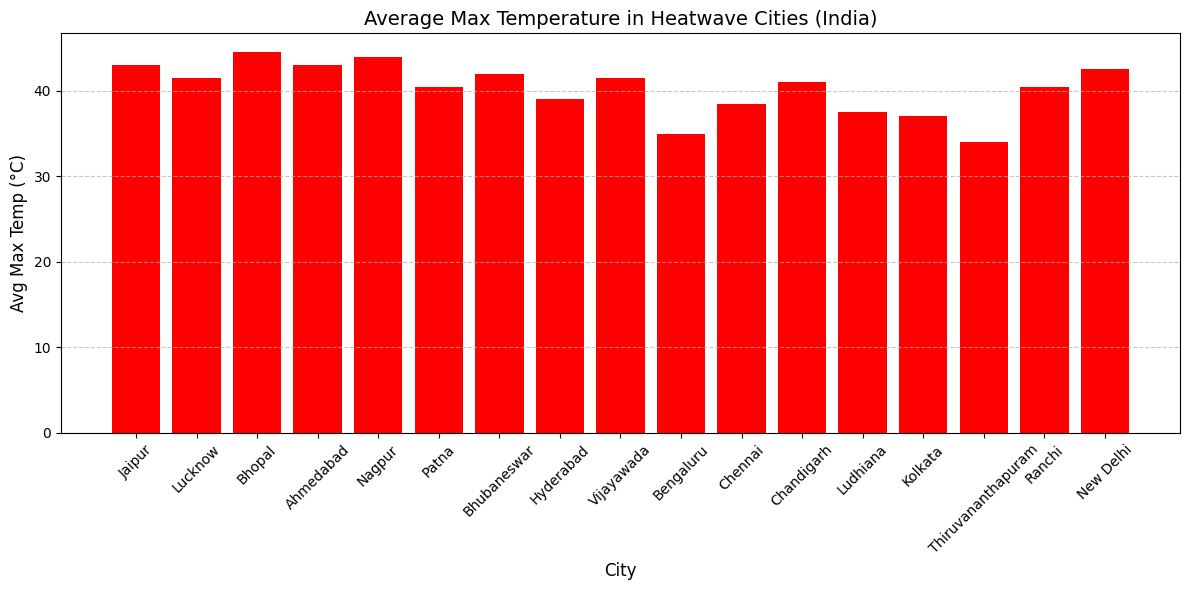

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load your CSV (replace with your actual file path)
df = pd.read_csv('/content/Heatwave_cities_india.csv')  # Make sure your file is uploaded

# Step 2: Convert Max Temp range to average
def avg_temp_range(temp_range):
    parts = temp_range.replace('‚Äì', '-').split('-')
    return (float(parts[0]) + float(parts[1])) / 2

df['Avg Max Temp (¬∞C)'] = df['Max Temp (¬∞C)'].apply(avg_temp_range)

# Step 3: Plot
plt.figure(figsize=(12, 6))
plt.bar(df['City'], df['Avg Max Temp (¬∞C)'], color='red')
plt.title('Average Max Temperature in Heatwave Cities (India)', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Avg Max Temp (¬∞C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


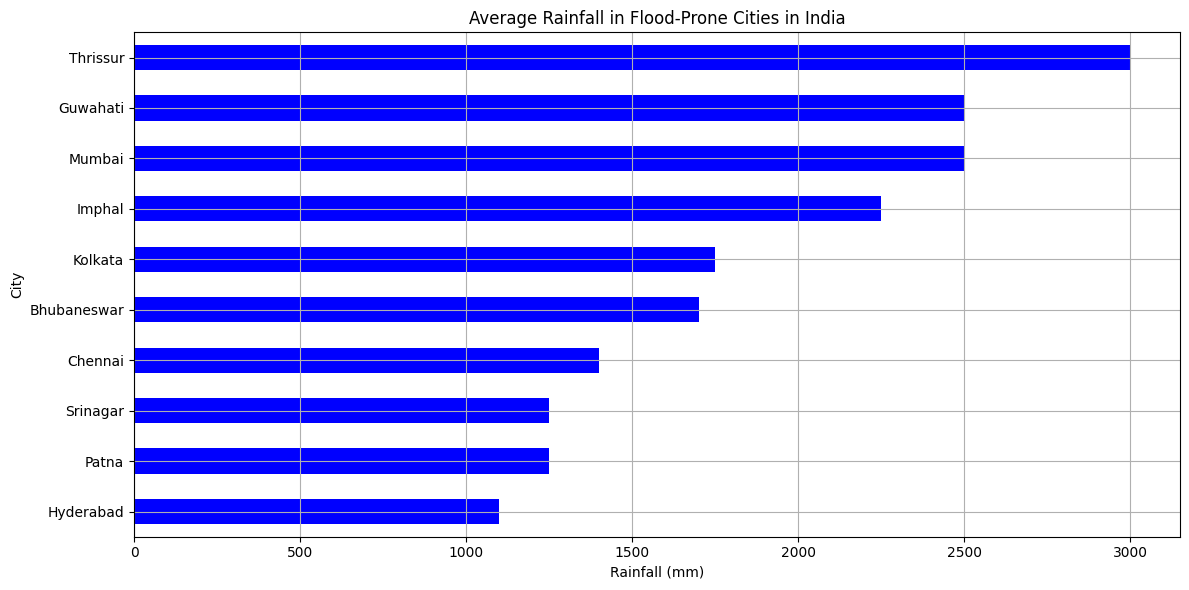

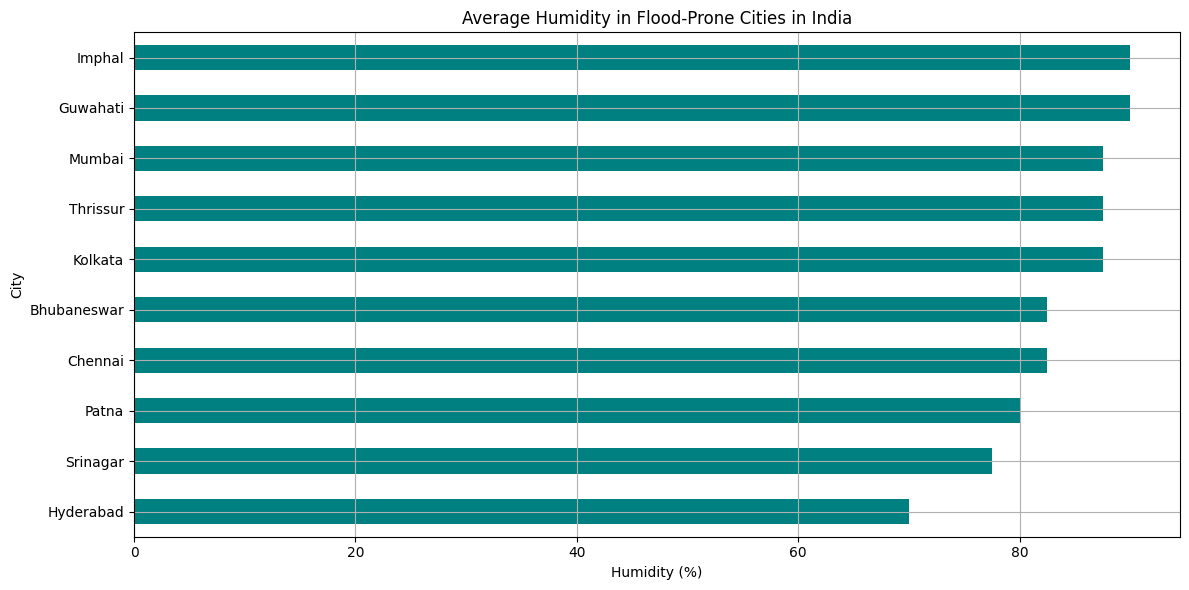

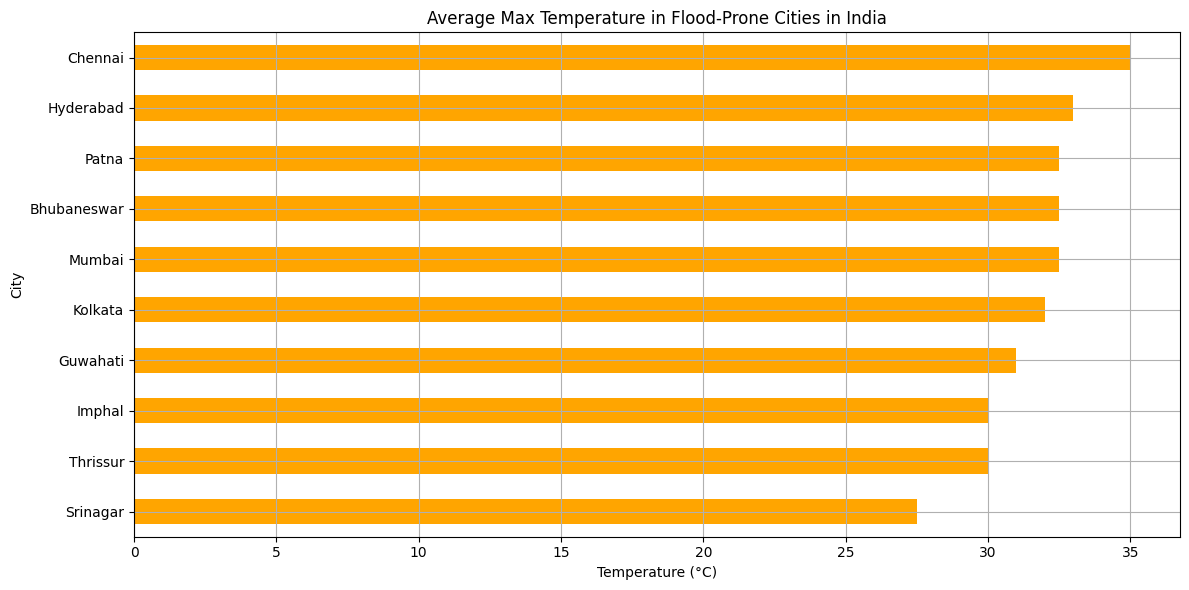

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
file_path = '/content/Flood_cities_india.csv'  # Change this path if needed
df = pd.read_csv(file_path)

# Helper function to extract average from a range (e.g., "2000‚Äì3000")
def average_range(value):
    try:
        parts = str(value).replace('‚Äì', '-').split('-')
        if len(parts) == 2:
            return (float(parts[0]) + float(parts[1])) / 2
        else:
            return float(parts[0])
    except:
        return None

# Apply average calculation
df['Avg Rainfall'] = df['Rainfall (mm)'].apply(average_range)
df['Avg Humidity'] = df['Humidity (%)'].apply(average_range)
df['Avg Max Temp'] = df['Max Temp (¬∞C)'].apply(average_range)

# Set city as index for plotting
df.set_index('City', inplace=True)

# Plot 1: Average Rainfall
plt.figure(figsize=(12, 6))
df['Avg Rainfall'].sort_values().plot(kind='barh', color='blue')
plt.title('Average Rainfall in Flood-Prone Cities in India')
plt.xlabel('Rainfall (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Average Humidity
plt.figure(figsize=(12, 6))
df['Avg Humidity'].sort_values().plot(kind='barh', color='teal')
plt.title('Average Humidity in Flood-Prone Cities in India')
plt.xlabel('Humidity (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Average Max Temperature
plt.figure(figsize=(12, 6))
df['Avg Max Temp'].sort_values().plot(kind='barh', color='orange')
plt.title('Average Max Temperature in Flood-Prone Cities in India')
plt.xlabel('Temperature (¬∞C)')
plt.grid(True)
plt.tight_layout()
plt.show()


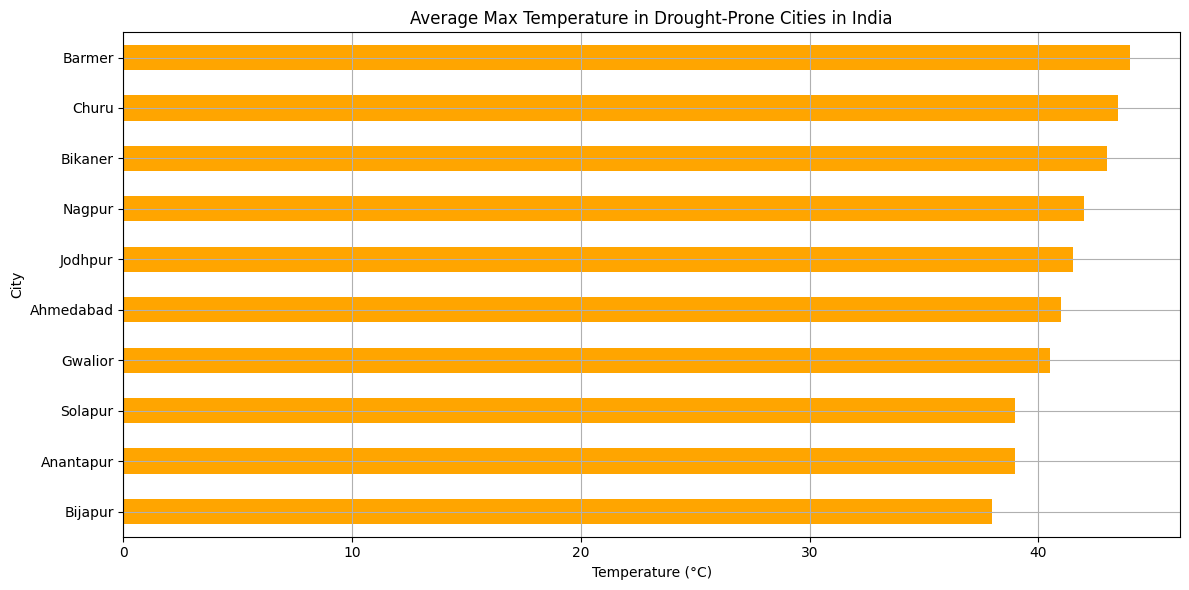

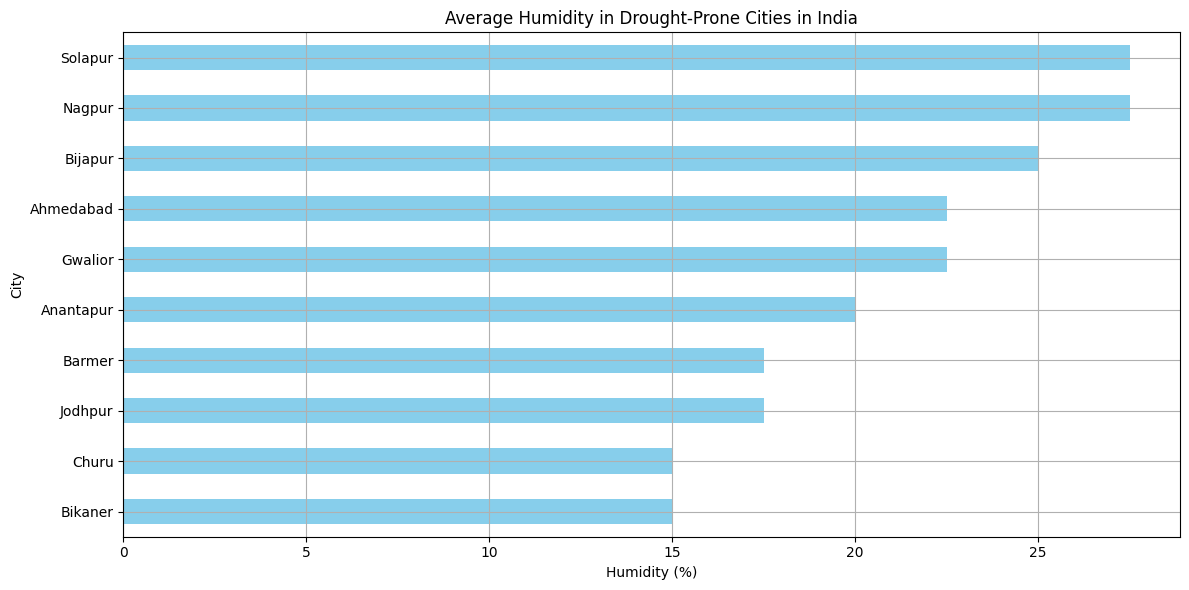

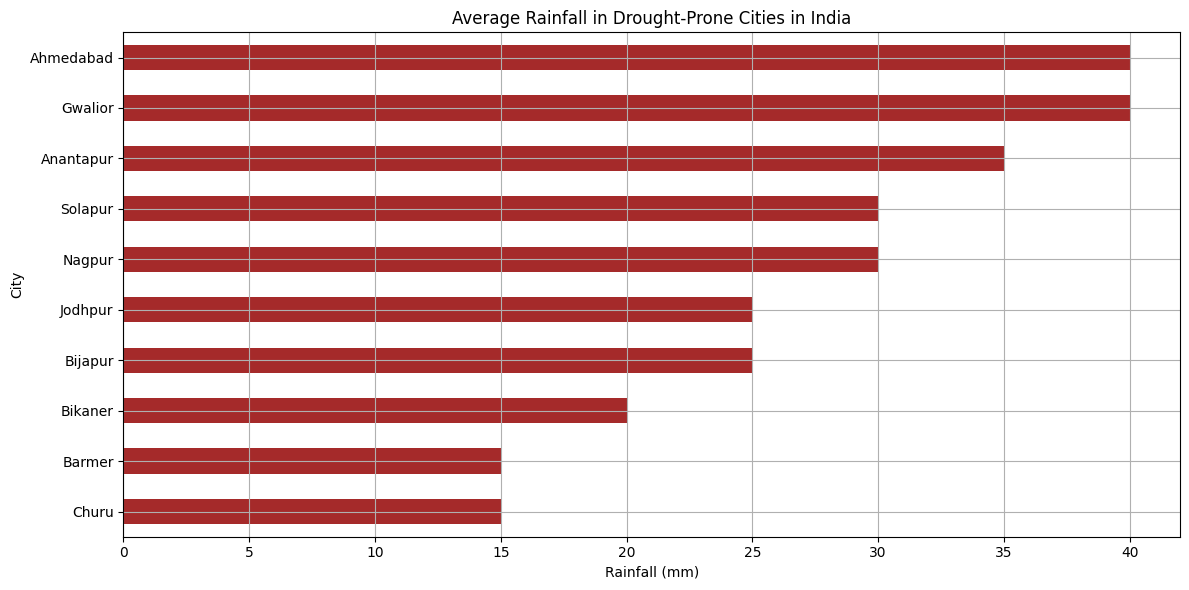

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
file_path = '/content/Drought_cities_india.csv'  # Change path if needed
df = pd.read_csv(file_path)

# Convert string ranges to numeric averages
def avg_range(value):
    try:
        value = str(value).replace('‚Äì', '-')
        parts = value.split('-')
        if len(parts) == 2:
            return (float(parts[0]) + float(parts[1])) / 2
        return float(parts[0])
    except:
        return None

# Apply to relevant columns
df['Avg Max Temp'] = df['Max Temp (¬∞C)'].apply(avg_range)
df['Avg Humidity'] = df['Humidity (%)'].apply(avg_range)
df['Avg Rainfall'] = df['Rainfall (mm)'].apply(avg_range)

# Set city as index
df.set_index('City', inplace=True)

# Plot: Max Temperature
plt.figure(figsize=(12, 6))
df['Avg Max Temp'].sort_values().plot(kind='barh', color='orange')
plt.title('Average Max Temperature in Drought-Prone Cities in India')
plt.xlabel('Temperature (¬∞C)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Humidity
plt.figure(figsize=(12, 6))
df['Avg Humidity'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Humidity in Drought-Prone Cities in India')
plt.xlabel('Humidity (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Rainfall
plt.figure(figsize=(12, 6))
df['Avg Rainfall'].sort_values().plot(kind='barh', color='brown')
plt.title('Average Rainfall in Drought-Prone Cities in India')
plt.xlabel('Rainfall (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Install Folium if not already installed
!pip install folium

import pandas as pd
import folium

# Load the datasets
# Try with 'ISO-8859-1' (a common fallback for non-UTF-8 files)
drought_df = pd.read_csv('/content/Drought_cities_india.csv', encoding='ISO-8859-1')
flood_df = pd.read_csv('/content/Flood_cities_india.csv', encoding='ISO-8859-1')
heatwave_df = pd.read_csv('/content/Heatwave_cities_india.csv', encoding='ISO-8859-1')

# Initialize map centered around India
map_center = [22.9734, 78.6569]  # Central India
disaster_map = folium.Map(location=map_center, zoom_start=5)

# Helper function to add markers
def add_markers(df, color, label):
    for _, row in df.iterrows():
        if 'Latitude' in row and 'Longitude' in row:
            folium.CircleMarker(
                location=[row['Latitude'], row['Longitude']],
                radius=6,
                popup=f"{label}: {row.get('City', 'Unknown')}",
                color=color,
                fill=True,
                fill_opacity=0.7
            ).add_to(disaster_map)

# Add each disaster type with a unique color
add_markers(heatwave_df, 'red', 'Heatwave')
add_markers(flood_df, 'blue', 'Flood')
add_markers(drought_df, 'orange', 'Drought')

# Display the map
disaster_map


In [ ]:
import folium
import pandas as pd
from IPython.display import display

# Load Flood data
flood_df = pd.read_csv('/content/Flood_cities_india.csv')

# Center of India
map_center = [22.9734, 78.6569]
flood_map = folium.Map(location=map_center, zoom_start=5)

# Add flood markers
for _, row in flood_df.iterrows():
    popup_text = f"""
    <b>City:</b> {row['City']}<br>
    <b>Max Temp:</b> {row['Max Temp (¬∞C)']}<br>
    <b>Humidity:</b> {row['Humidity (%)']}<br>
    <b>Rainfall:</b> {row['Rainfall (mm)']}<br>
    <b>Pressure:</b> {row['Pressure (hPa)']}<br>
    <b>Wind Speed:</b> {row['Wind Speed (km/h)']}
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color="blue", icon="cloud")
    ).add_to(flood_map)

# Display map
display(flood_map)


In [ ]:
import folium
import pandas as pd
from IPython.display import display

# Load Drought data
drought_df = pd.read_csv('/content/Drought_cities_india.csv')

# Center of India
map_center = [22.9734, 78.6569]
drought_map = folium.Map(location=map_center, zoom_start=5)

# Add drought markers
for _, row in drought_df.iterrows():
    popup_text = f"""
    <b>City:</b> {row['City']}<br>
    <b>Max Temp:</b> {row['Max Temp (¬∞C)']}<br>
    <b>Humidity:</b> {row['Humidity (%)']}<br>
    <b>Rainfall:</b> {row['Rainfall (mm)']}<br>
    <b>Pressure:</b> {row['Pressure (hPa)']}<br>
    <b>Wind Speed:</b> {row['Wind Speed (km/h)']}
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color="orange", icon="tint")
    ).add_to(drought_map)

# Display map
display(drought_map)


In [ ]:
import folium
import pandas as pd
from IPython.display import display

# Load Heatwave data
heatwave_df = pd.read_csv('/content/Heatwave_cities_india.csv')

# Center of India
map_center = [22.9734, 78.6569]
heatwave_map = folium.Map(location=map_center, zoom_start=5)

# Add heatwave markers
for _, row in heatwave_df.iterrows():
    popup_text = f"""
    <b>City:</b> {row['City']}<br>
    <b>Max Temp:</b> {row['Max Temp (¬∞C)']}<br>
    <b>Humidity:</b> {row['Humidity (%)']}<br>
    <b>Rainfall:</b> {row['Rainfall (mm)']}<br>
    <b>Pressure:</b> {row['Pressure (hPa)']}<br>
    <b>Wind Speed:</b> {row['Wind Speed (km/h)']}
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color="red", icon="fire")
    ).add_to(heatwave_map)

# Display map
display(heatwave_map)


In [ ]:
import folium
import pandas as pd
from IPython.display import display

# Load the CSV files
drought_df = pd.read_csv('/content/Drought_cities_india.csv')
flood_df = pd.read_csv('/content/Flood_cities_india.csv')
heatwave_df = pd.read_csv('/content/Heatwave_cities_india.csv')

# Center of India
map_center = [22.9734, 78.6569]
combined_map = folium.Map(location=map_center, zoom_start=5)

# Feature groups for each type
drought_layer = folium.FeatureGroup(name="Drought (Orange)", show=True)
flood_layer = folium.FeatureGroup(name="Flood (Blue)", show=True)
heatwave_layer = folium.FeatureGroup(name="Heatwave (Red)", show=True)

# Function to add markers
def add_markers(df, layer, color, icon):
    for _, row in df.iterrows():
        popup_text = f"""
        <b>City:</b> {row['City']}<br>
        <b>Max Temp:</b> {row['Max Temp (¬∞C)']}<br>
        <b>Humidity:</b> {row['Humidity (%)']}<br>
        <b>Rainfall:</b> {row['Rainfall (mm)']}<br>
        <b>Pressure:</b> {row['Pressure (hPa)']}<br>
        <b>Wind Speed:</b> {row['Wind Speed (km/h)']}
        """
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=folium.Popup(popup_text, max_width=300),
            icon=folium.Icon(color=color, icon=icon)
        ).add_to(layer)

# Add markers to each layer
add_markers(drought_df, drought_layer, "orange", "tint")
add_markers(flood_df, flood_layer, "blue", "cloud")
add_markers(heatwave_df, heatwave_layer, "red", "fire")

# Add layers to map
drought_layer.add_to(combined_map)
flood_layer.add_to(combined_map)
heatwave_layer.add_to(combined_map)

# Add layer control
folium.LayerControl(collapsed=False).add_to(combined_map)

# Custom legend without a box (just colors and text)
legend_html = """
<div style="position: fixed;
            bottom: 50px; left: 50px; font-size:14px; z-index:9999;">
    <b>Disaster Legend</b><br>
    <i style="background-color:red; border-radius:50%; width:20px; height:20px; display:inline-block;"></i>&nbsp; Heatwave<br>
    <i style="background-color:orange; border-radius:50%; width:20px; height:20px; display:inline-block;"></i>&nbsp; Drought<br>
    <i style="background-color:blue; border-radius:50%; width:20px; height:20px; display:inline-block;"></i>&nbsp; Flood
</div>
"""
combined_map.get_root().html.add_child(folium.Element(legend_html))

# Show in Colab
display(combined_map)
